**TIMELINE:**

2023-04-20 Robs & cols came into the proyect

2022-03-01 better IN PAC

2021-11-11 Campain on unregistered and non-partisans

2021-10-26 Senatorial districts 1 (easy), 29 (hard) and 31 (hard) Reg+Unreg

2021-09-21 shape file was delivered by DG

2021-09-23 Forth Wayne census 2020



**TASK:**
- print report automatically

# LOAD files

## set folder

This is placed at the begining because of the google drive prompt

In [ ]:
# ------------------------------ MOUNT GOOGLE DRIVE ------------------------------
from google.colab import drive                          # to use Gdrive files. Auth to don't get emails
drive.mount('/content/g/', force_remount=False)         # as root folder

# ------------------------------ SET FOLDER ------------------------------

folder = r'/content/g/MyDrive/COLFAX/'   # for paths

# set working DIR -- error if not mounted
print('\n','\033[1m','Parent directory:  ','\033[0m', sep='')
%cd /content/g/MyDrive/COLFAX/
#!ls

Drive already mounted at /content/g/; to attempt to forcibly remount, call drive.mount("/content/g/", force_remount=True).

Parent directory:  
/content/g/MyDrive/COLFAX


## libraries

Pycaret https://pycaret.org has many requierements and can raise installation errors. Takes 1 min to install.

General libraries that are used across the code.
Specific libraries are installed where used.

In [ ]:
%%time
%%capture

# PyCARET
!pip install pycaret        # https://pycaret.org
#!pip install --pre pycaret # pre reelease version
import pycaret
#from pycaret.classification import *               # install after all the other libs
# pycaret.__version__  # check installed version


# BASIC libraries
import pandas as pd
# pd.options.display.float_format = '{:,}'.format   # thousand separator
import numpy as np                                  # not using it yet
from datetime import date                           # current datetime to include in name of output files
import re                                           # REGEX to rename cell content
from ipywidgets import widgets                      # for drop down menu
from IPython.display import Image                   # to open images
from google.colab import files                      # to donwload files
import statistics                                   # average, STDdev
import math                                         # sqrt

#!pip install fpdf                                   # export pdf for reports
#from fpdf import FPDF                               
#import dill                                         # to save files

# PLOTS
import matplotlib.pyplot as plt
import matplotlib as mpl                            # for color bars
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, AutoLocator
!pip install matplotlib-scalebar
from matplotlib_scalebar.scalebar import ScaleBar   # to add scalebar to map
import seaborn as sns                               # not used yet
# bokeh pyplot

# Sci-kit learn import libraries
import sklearn                                                          # to check version -- needs to import sklearn alone
from sklearn.model_selection    import train_test_split, GridSearchCV
from sklearn.neighbors          import KNeighborsClassifier             # for SFS
from sklearn.linear_model       import LogisticRegression , RidgeClassifierCV
from sklearn.ensemble           import RandomForestClassifier
from sklearn.preprocessing      import StandardScaler, OneHotEncoder, KBinsDiscretizer     
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics            import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.compose            import ColumnTransformer
from sklearn.pipeline           import Pipeline
#from sklearn.feature_selection  import SequentialFeatureSelector        # feature selection wrapper -- not in old versions
from sklearn.decomposition      import PCA                              # principal component analisys

from imblearn.over_sampling     import SMOTE                            # for imbalenced samples
#from mlxtend.feature_selection  import SequentialFeatureSelector        # feature selection wrapper
import statsmodels.api          as sm                                   # to get the p-values for the slope coeficients


# # improvements for colab HTML display
from IPython.display import HTML, display
def set_css():                                                          # function to pre-warp results
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)                  # execute the pre-warpp

CPU times: user 221 ms, sys: 17 ms, total: 238 ms
Wall time: 23.4 s


Instalar pycaret experimeto después de las otras libs ara reveir errores

In [ ]:
# istall experiment in pycaret
from pycaret.classification import *
# pycaret.__version__  # check installed version

# print versions of key libraries

!pip    --version                            # current 23.0.1 (2022: 21.1.3)
!python --version                            # current 3.10.11 (2022: 3.7.12)
print('sklearn '    , sklearn.__version__)   # current 1.2.2 (2022: 0.23.2) / need to import sklearn alone # current 2.3.6
print('pycaret '    , pycaret.__version__)   # current 3.0.0
#print('matplotlib ', plt.__version__)       # current 0.23.2 / check version -- need to import sklearn alone
#!pip show matplotlib

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Python 3.10.11
sklearn  1.2.2
pycaret  3.0.2


## functions

Custom-made functions are stored here

In [ ]:
# COLUMN STATS


def func_col_stats1 ( df_col ) :                            # 'col'

    """ INPUT : SINGLE col in a either REG or UNreg
        OUTPUT:                      """

    print('\033[1m', df_col.name ,'\033[0m', sep="")                                    # print COL name

    # distinct values counts NaN
    print( df_col.value_counts(dropna=False) .map('{:,.0f}'.format))                    # print whole value count
    #print('\n',end='') 
    print('Distinct values:\t','\033[1m', 
          len( df_col.value_counts() ),'\033[0m',sep='')                               # print number of distinct values

    # print STATS of selected column
    total =  df_col .shape[0]
    print('Total_cells    :\t' , "{:,.0f}".format(total) ,sep='')

    empty =  df_col .isna().sum().sum()
    #print('Filled_cells  :\t' , "{:,.0f}".format(total - empty), '  (',
    #      "{:.1f}".format( 100 * (total - empty) / total ) , '%)', sep='')
    print('NaN_cells      :\t', "{:,.0f}".format(empty), '  (',
          "{:.1f}".format( 100 * empty / total ) , '%)', sep='')
  
    # most frecuent
    #most_frecuent = df_col.value_counts(dropna=False).index[0]
    #print('Most_frecuent :\t', '\033[1m', most_frecuent, '\033[0m', sep='')
    print('\n',end='')

def func_col_stats2 ( df1_col, df2_col ) :                  # reg['col_a']  unreg['col_a']

    """ INPUT:  SIGLE col compared between a cognate REG-UNreg pair, in ORDER
        OUTPUT:                      """

    # convert both to str
    df1_col.astype(str)
    df2_col.astype(str)

    # list unique elements
    list_1 = df1_col .value_counts(dropna=False) .index .values .tolist()
    list_2 = df2_col .value_counts(dropna=False) .index .values .tolist()

    # compare the 2 list and find the common and exclusive elements among
    list_1_exclusive    = set(list_1) - set(list_2) 
    list_2_exclusive    = set(list_2) - set(list_1)
    list_common         = set(list_1) & set(list_2) 

    # UNreg print element count 
    print('\033[1m', '--------------  REG column:  \'' + df1_col.name + '\'  --------------',  '\033[0m',sep="" ) # print COL name                           
    print( df1_col.value_counts(dropna=False) .map('{:,.0f}'.format))       # print whole value count
    print('Total elements:      ', len( df1_col ))                          # cantidad de elementos
    print('Distinct elements:   ', len( list_1 ))                           # cantidad de elementos
    print('EXCLUSIVE elements:  ', len(list_1_exclusive))
    print(list_1_exclusive)
    print('\n',end='') 
 
    # REG print element count 
    print('\033[1m', '------------  UNreg column:  \'' + df2_col.name + '\'  --------------',  '\033[0m',sep="" ) # print COL name                           
    print( df2_col.value_counts(dropna=False) .map('{:,.0f}'.format))       # print whole value count
    print('Total elements:      ', len( df2_col ))                          # cantidad de elementos
    print('Distinct elements:   ', len( list_2 ))                           # cantidad de elementos
    print('EXCLUSIVE elements:  ', len( list_2_exclusive ))
    print( list_2_exclusive )
    print('\n',end='') 

    # COMMON element count 
    print('\033[1m', 'COMMON elements:      ', '\033[0m', len(list_common), sep="")
    print(list_common, sep='')
    print('\n',end='')


def func_col_stats ( *args ) :                              # single or double argument

    """ INPUT: Compare a SINGLE col in a datset, or a pair of datasets. with IF
        OUTPUT:                      """

    argument_no = len(args)                          
    df1_col =args[0]

    if   argument_no == 1 :
        func_col_stats1 (df1_col)
    elif argument_no == 2 :
        df2_col = args[1]
        func_col_stats2 ( df1_col, df2_col )

def func_compare_listcol ( census_reg , census_unreg ):     # set the census files to compare

    """ INPUT: 2 census files
        OUTPUT: list of common and exclusive column names    """

    # compare the list of colum names between REG and UNreg
    # keep REG then UNreg order, so the print tags do match

    # caclulate common and exclusive elements
    list_common           = set(census_reg  .columns) & set(census_unreg.columns)
    list_reg_exclusive    = set(census_reg  .columns) - set(census_unreg.columns) 
    list_unreg_exclusive  = set(census_unreg.columns) - set(census_reg  .columns)

    # print list of columns
    print( '\033[1m','Cols in both REG and UNreg: \t','\033[0m', len(list_common),         '\n',
          list_common          ,'\n\n',sep='', end='')
    print( '\033[1m','REGistered only cols:       \t','\033[0m', len(list_reg_exclusive),  '\n',
          list_reg_exclusive   ,'\n\n',sep='', end='')
    print( '\033[1m','UNregistered only cols:     \t','\033[0m', len(list_unreg_exclusive),'\n',
          list_unreg_exclusive        ,sep='', end='')
    

def func_model_evaluation ( y_test , y_pred ) :

    """ INPUT: multiline description
        OUTPUT: print scores                     """

    print('Accuracy:   ','{:.3f}'.format( accuracy_score   ( y_test , y_pred )),'\t','(tp + tn) / (tp + tn + fp + fn)')
    print('Precision:  ','{:.3f}'.format( precision_score  ( y_test , y_pred )),'\t','tp / (tp + fp)')
    print('Recall:     ','{:.3f}'.format( recall_score     ( y_test , y_pred )),'\t','tp / (tp + fn)')
    print('f1:         ','{:.3f}'.format( f1_score         ( y_test , y_pred )),'\t','tp / (tp + 0.5x(fp + fn))')
    print('ROC_AUC:    ','{:.3f}'.format( roc_auc_score    ( y_test , y_pred )))

    #plot_model( model_best, plot = 'confusion_matrix')
# recall    =    Proportion of true positives that were identified correctly?
# precision =    Proportion of positive identifications was correct?

    
    #print( 'classification_report:\n',            classification_report ( y_test , y_pred ) )
    print('\n', end='')
    
    #print('confusion matrix:\n',                  confusion_matrix      ( y_test , y_pred ) ,'\n')
    tp, fn, fp, tn = confusion_matrix (y_test, y_pred, labels=[1,0]).reshape(-1)
    print('Confusion matrix: \n',
        'tn: ','\033[1m','{:,.0f}'.format(tn),'\033[0m','    ',
        'fp: ','{:,.0f}'.format(fp),'\n',
        'fn: ','{:,.0f}'.format(fn), '    ',
        'tp: ','\033[1m','{:,.0f}'.format(tp),'\033[0m','\n', sep='' )
# recall, lo que eran de verdad, se pasaron pocos
# precion: los que dije que eran, efectivamente eran
# accuracy es una ponderacion de los 2.

# CENSUS

## IN cols to load

Indiana en the OLD L2 format, from 2021

In [ ]:
# ----------------------------------  COLUMNS TO LOAD: indiana NEW L2 format ----------------------------------

#    0: REG                                 1: UNreg                        2: consolidated name            3: tag?
cols_import_in_all = ([
    ['Voters_FirstName',                    'FirstName',                    'FirstName'],                   # ID
    ['Voters_MiddleName',                   'MiddleName',                   'MiddleName'],
    ['Voters_LastName',                     'LastName',                     'LastName'],
    ['Voters_StateVoterID',                 '',                             'Voters_StateVoterID'],         # ID for exortig
    ['LALVOTERID'         ,                 '',                             'LALVOTERID'],                  
    ['',                                    'Individual_ID',                'Individual_ID'],               # ID for exortig
    ['Residence_Addresses_Latitude',        'Latitude',                     'Latitude'],                    # LOCATION
    ['Residence_Addresses_Longitude',       'Longitude',                    'Longitude'],
    ['Mailing_Addresses_Zip',               'ZipCode',                      'Zip'],
    ['Residence_Addresses_CensusBlock',     'Census_Block',                 'Census_Block'],
    ['Precinct',                            'Precinct',                     'Precinct'],
    ['County',                              'County',                       'County'],
    ['Mailing_Addresses_City',              'Address_City',                 'City'],
    ['Mailing_Addresses_StreetName',        'Address_StreetName',           'Address_StreetName'],
    ['Mailing_Addresses_HouseNumber',       'Address_HouseNumber',          'Address_HouseNumber'],
    ['Mailing_Addresses_ApartmentNum',      'Address_ApartmentNum',         'Address_ApartmentNum'],
    ['Voters_Age',                          'Age',                          'Age'],                         # PERSONAL
    ['Voters_Gender',                       'Gender',                       'Gender'],
    ['EthnicGroups_EthnicGroup1Desc',       'Ethnic_Group',                 'Ethnicity_broad'  ],           # ETHNICITY
    ['Ethnic_Description',                  'Ethnic_Code',                  'Ethnicity_specific'],         
    ['CommercialDataLL_Hispanic_Country_Origin','Hispanic_Country_Code',    'Hispanic_Country_Origin'],
    ['Languages_Description',               'Language_Code',                'Language_primary'],            # LANGUAGE
    ['CommercialDataLL_Household_Primary_Language','Assimilation_Codes',    'Language_assimilation'],
    ['Religions_Description',               'Religion_Code',                'Religion'],                    # RELIGION
    ['CommercialData_ReligiousContributorInHome','Religious_Contributor',   'Donor_Religion'],
    ['CommercialData_ReligiousMagazineInHome','Religious_Mags',             'Religion_Magazine'],
    ['CommercialDataLL_Interest_in_Religious_Inspirational_In_Household','Religious_Inspiration','Religious_Inspiration'],
    ['MaritalStatus_Description',           'Marital_Status',               'Marital_Status'],              # FAMILY
    ['CommercialData_PresenceOfChildrenCode','Presence_Of_Children',        'HH_Children_presence'],
    ['',                                    'Number_Of_Children',           'HH_Children_number'],
    ['CommercialData_HHComposition',        '',                             'HH_Family_composition'],
    ['',                                    'Number_Of_Persons_In_Unit',    'HH_Number_Of_Persons_In_Unit'],
    ['',                                    'Number_Of_Adults',             'HH_Adult_number'],
    ['',                                    'Senior_Adult_In_HH',           'HH_Senior_number'],
    ['',                                    'Generations_In_HH',            'HH_Generations'],
    ['CommercialData_Education',            'Education_of_Person',          'Education_level'],             # education
    ['CommercialData_AreaMedianEducationYears','',                          'Education_years'],
    ['CommercialDataLL_Interest_in_Education_Online_In_Household','Education_Online','Interest_Education_Online'],
    ['CommercialData_EstimatedHHIncome',    'Estimated_Income_Code',        'Income_bin'],                  # income
    ['CommercialData_EstimatedHHIncomeAmount','Census_Median_HH_Income',    'Income_amount'], 
    ['CommercialDataLL_HH_Net_Worth',       'Household_Net_Worth',          'HH_Net_Worth'],
    ['CommercialDataLL_Investor',           'Investments',                  'Investor'],                            # unreg: 'Investments_Personal','Invest_Active'
    ['CommercialDataLL_Home_Owner_Or_Renter','Homeowner_Probability_Model', 'Home_Owner'],                  # house
    ['CommercialData_EstHomeValue',         'Census_Median_Home_Value',     'Home_value'],                          # unreg 'Home_Est_Current_Value_Code' 'Home_Est_Current_Value' reg     'EstHomeValueBin'
    ['CommercialData_HomePurchasePrice',    'Home_Purchase_Price',          'Home_Purchase_Price'],                 # unreg , 'Home_Purchase_Price_Code'
    ['EstHomeValueBin',                     'Home_Est_Current_Value_Code',  'Home_Value_bin'],
    ['Residence_Addresses_Density',         'Density',                      'Address_Density_partial_bin'],
    ['Residence_Addresses_Property_LandSq_Footage','Property_Land_Square_Footage','Property_Land_partial_bin'],
    ['Residence_Addresses_Property_HomeSq_Footage','Property_Home_Square_Footage','Property_House_partial_bin'],
    ['CommercialData_OccupationIndustry',   'Occupation_Group',             'Occupation_Industry'],         # occupation
    ['CommercialData_Occupation',           'Occupation_of_Person',         'Occupation_specific'],              
    ['CommercialDataLL_Business_Owner',     'Business_Owner',               'Business_Owner'],
    ['CommercialDataLL_Home_Office',        'Computer_Home_Office',         'Home_Office'],
    ['CommercialData_ComputerOwnerInHome',  'Computer_Owner',               'Computer_Owner'],
    ['CommercialDataLL_PetOwner_Cat',       'Pets_Cats',                    'Pets_Cat_owner'],              # PETS
    ['CommercialDataLL_PetOwner_Dog',       'Pets_Dogs',                    'Pets_Dog_owner'],
    ['CommercialDataLL_Donates_to_Animal_Welfare','Donor_Animal_Welfare',   'Donor_Animal_Welfare'],
    ['CommercialDataLL_Interest_in_History_Military_In_Household', 'History_Military','Interest_Military_history' ],   # MILITAR
    ['CommercialDataLL_Veteran',            'Veteran_In_HH',                'Veteran'],
    ['CommercialDataLL_Donates_to_Veterans_Causes','Donor_Veterans',        'Donor_Veterans'],
    ['CommercialDataLL_Gun_Owner',          '',                             'Gun_Owner'],
    ['MilitaryStatus_Description',          '',                             'Military_status'],
    ['Parties_Description',                 '',                             'Parties_Description'],         # political
    ['Mailing_HHParties_Description',       '',                             'Parties_Description_HH'],      #  unreg:'Residence_HHParties_Description' EMPTY
    ['CommercialDataLL_Interest_in_Current_Affairs_Politics_In_Household','Current_Affairs_Politics','Interest_Current_Affairs_Politics'],
    ['CommercialDataLL_Donates_to_Conservative_Causes', 'Donor_Political_Conservative', 'Donor_Conservative'],   
    ['CommercialDataLL_Donates_to_Liberal_Causes','Donor_Political_Liberal','Donor_Liberal'],
    ['CommercialData_PoliticalContributerInHome','Political_Contributor',   'Donor_Political'], 
    ['CommercialDataLL_Donates_to_International_Aid_Causes','Donor_International_Aid','Donor_International_Aid'],   # Donor unclassified
    ['CommercialDataLL_Donates_to_Arts_and_Culture','Donor_Arts_Cultural',  'Donor_Arts_Cultural'],
    ['CommercialData_DonatesEnvironmentCauseInHome','Donor_Environmental',  'Donor_Environmental'],
    ['CommercialDataLL_Donates_to_Childrens_Causes','Donor_Childrens_Causes','Donor_Childrens_Causes'],
    ['CommercialDataLL_Donates_to_Local_Community','Donor_Community_Charity','Donor_Community'],
    ['CommercialDataLL_Donates_to_Healthcare','Health_Institution_Contributor','Donor_Health_Institution' ],
    ['FECDonors_NumberOfDonations',         '',                             'Donors_FEC_Number_amount'],
    ['Federal_Donor_Ideology',              '',                             'Federal_Donor_Ideology'],                  # is empty
    ['CommercialDataLL_Interest_in_Home_Furnishings_In_Household','Home_Furnishings_Decor','Interest_Home_Furnishing'], # interest
    ['CommercialDataLL_Interest_in_Home_Improvement_In_Household','Home_Improvement','Interest_Home_Improvement'],
    ['CommercialDataLL_Interest_in_House_Plants_In_Household','House_Plants','Interest_House_Plants'],
    ['CommercialDataLL_Interest_in_Gardening_In_Household','Gardening','Interest_Gardening'],
    ['CommercialDataLL_Interest_in_Exercise_Running_Jogging_In_Household','Exercise_Running_Jogging','Interest_Exercise_Running' ],
    ['CommercialDataLL_Interest_in_Exercise_Aerobic_In_Household','Exercise_Aerobic', 'Interest_Exercise_Aerobic' ],
    ['CommercialDataLL_Interest_in_SpectatorSports_on_TV_In_Household','Sports_TV_Sports','Interest_Sports_on_TV'],
    ['CommercialDataLL_Interest_in_Sports_Leisure_In_Household','Sports_Leisure','Interest_Sports_Leisure' ],
    ['CommercialDataLL_Interest_in_Tennis_In_Household','Active_Tennis',    'Interest_Tennis'],
    ['CommercialDataLL_Interest_in_Fishing_In_Household','Fisher',          'Interest_Fishing'],
    ['CommercialDataLL_Interest_in_SpectatorSports_Football_In_Household','Sports_Football','Interest_Football'],
    ['CommercialDataLL_Interest_in_SpectatorSports_Soccer_In_Household','Sports_Soccer','Interest_Soccer'],
    ['CommercialDataLL_Interest_in_Golf_In_Household','Golf_Enthusiast',    'Interest_Golf'],
    ['CommercialDataLL_Interest_in_SpectatorSports_Baseball_In_Household','Sports_Baseball','Interest_Baseball'],
    ['CommercialDataLL_Interest_in_Hunting_In_Household','Hunter',          'Interest_Hunting'],       # unreg: Hunting_Shooting
    ['CommercialDataLL_Interest_in_Shooting_In_Household','Hunting_Shooting','Interest_Shooting'],
    ['CommercialDataLL_Interest_in_Camping_Hiking_In_Household','Camping_Hiking','Interest_Camping_Hiking'  ],
    ['CommercialDataLL_Interest_in_Snow_Skiing_In_Household','Active_Snow_Skiing','Interest_Snow_Skiing' ],
    ['CommercialDataLL_Interest_in_SpectatorSports_Hockey_In_Household','Sports_Hockey','Interest_Hockey'],
    ['CommercialData_FinancialMagazineInHome','News_Financial',             'Financial_Magazine'],
    ['CommercialDataLL_Interest_in_Theater_Performing_Arts_In_Household','Theater_Performing_Arts','Interest_Theater'],
    ['CommercialDataLL_Interest_in_Food_Wines_In_Household','Food_Wines',   'Interest_Wines'], 
    ['CommercialDataLL_Interest_in_Cooking_General_In_Household','Cooking_General','Interest_Cooking'],
    ['CommercialDataLL_Interest_in_Foods_Natural_In_Household','Foods_Natural','Interest_Foods_Natural'],
    ['CommercialDataLL_Interest_in_Smoking_In_Household','Smoking',         'Interest_Smoking'],
    ['CommercialDataLL_Interest_in_Motorcycling_In_Household','Active_Motorcycle','Interest_Motorcycling'],  # unreg: 'Sports_Auto_Motorcycle_Racing'
    ['CommercialDataLL_Interest_in_Auto_Work_In_Household','Auto_Work',     'Interest_Auto_Work'],
    ['CommercialDataLL_Interest_in_Automotive_Parts_Accessories_In_Household','Autoparts_Accessories','Interest_Autoparts' ],
    ['CommercialDataLL_Interest_in_Nascar_In_Household','Active_Nascar',    'Interest_Nascar'],
    ['CommercialDataLL_Interest_in_SpectatorSports_Auto_Racing_In_Household','Sports_Auto_Motorcycle_Racing','Interest_Auto_Racing'],
    ['CommercialDataLL_Interest_in_Aviation_In_Household','Aviation_Int',   'Interest_Aviation'],
    ['CommercialDataLL_Interest_in_Crafts_In_Household','Craft_Int',        'Interest_Crafts'],
    ['CommercialDataLL_Interest_in_Sewing_Knitting_In_Household','Sewing_Knitting_Needlework','Interest_Sewing_Knitting'],
    ['CommercialDataLL_Interest_in_Musical_Instruments_In_Household','Musical_Instruments','Interest_Musical_Instruments'],
    ['CommercialDataLL_Interest_in_Woodworking_In_Household','Woodwork',    'Interest_Woodworking'],
    ['CommercialDataLL_Interest_in_the_Arts_In_Household','Arts_Int',       'Interest_Arts'],
    ['CommercialDataLL_Collector_Antiques_In_Household','Collectibles_Antiques','Collector_Antiques'],
    ['CommercialDataLL_Collector_Arts_In_Household','Collectibles_Arts',    'Collector_Arts'],
    ['CommercialData_BookBuyerInHome',      'Book_Buyer',                   'Book_Buyer'],
    ['CommercialDataLL_Interest_in_Electronic_Gaming_In_Household','Games_Video','Interest_Games_Video'],
    ['CommercialDataLL_Interest_in_Gaming_Casino_In_Household','Gaming_Casino','Interest_Games_Casino'],
    ['CommercialDataLL_Interest_in_Photography_In_Household','Photography_Int','Interest_Photography'],
    ['CommercialDataLL_Interest_in_Science_Space_In_Household','Science_Space','Interest_Science_Space'],
    ['CommercialDataLL_Interest_in_Travel_Cruise_In_Household','Travel_Cruises','Interest_Travel_Cruises'],
    ['CommercialDataLL_Interest_in_Travel_Domestic_In_Household','Travel_Domestic','Interest_Travel_Domestic'],
    ['CommercialDataLL_Interest_in_Travel_International_In_Household','Travel_Intl','Interest_Travel_Intl'],
    ['CommercialDataLL_Interest_in_Boating_Sailing_In_Household','Boating_Sailing','Interest_Boating_Sailing'],
    ['CommercialDataLL_Interest_in_Scuba_Diving_In_Household','Scuba_Diving','Interest_Scuba_Diving'],
    ['General_2012_11_06',                  '',                             'General_2012-11-06'],              # voting
    ['General_2014_11_04',                  '',                             'General_2014-11-04'],
    ['General_2016_11_08',                  '',                             'General_2016-11-08'],
    ['General_2018_11_06',                  '',                             'General_2018-11-06'],
    ['General_2020_11_03',                  '',                             'General_2020-11-03'],
    ['EarlyBallot_General_2020_11_03',      '',                             'EarlyBallot_General_2020_11_03'],
    ['EarlyBallot_Primary_2020_06_02',      '',                             'EarlyBallot_Primary_2020_06_02'],
    ['EarlyBallot_General_2018_11_06',      '',                             'EarlyBallot_General_2018_11_06'],
    ['EarlyBallot_Primary_2018_05_08',      '',                             'EarlyBallot_Primary_2018_05_08'],
    ['Presidential_Primary_2020_06_02',     '',                             'Presidential_Primary_2020_06_02'],
    ['Presidential_Primary_2016_05_03',     '',                             'Presidential_Primary_2016_05_03'],
    ['Presidential_Primary_2012_05_08',     '',                             'Presidential_Primary_2012_05_08'],
    ['Vote_Frequency',                      '',                             'Voter_Frequency'],
    ['Voters_Active',                       '',                             'Voter_Active'],
    ['VoterParties_Change_Changed_Party',   '',                             'Voter_Changed_Party'],
    ['VotingPerformanceEvenYearGeneral',    '',                             'VotingPerformanceEvenYearGeneral'],
    ['VotingPerformanceEvenYearPrimary',    '',                             'VotingPerformanceEvenYearPrimary' ],
    ['VotingPerformanceEvenYearGeneralAndPrimary','',                       'VotingPerformanceEvenYearGeneralAndPrimary'],
    ['VotingPerformanceMinorElection',      '',                             'VotingPerformanceMinorElection'],
    ['US_Congressional_District',           'Congressional_District',       'Congressional_District'],          # DISTRICT
    ['State_Senate_District',               'StateSenateDistrict',          'State_Senate_District'],
    ['State_House_District',                'StateHouseDistrict',           'State_House_District'],
    ['Township',                            'Township',                     'Township'],
    ['Town_District',                       'Town_District',                'Town_District'],
    ['City_Council_Commissioner_District',  'City_Council_Commissioner_District','City_Council_Commissioner_District'],
    ['City_School_District',                'City_School_District',         'City_School_District'],
     ['Voters_AgeRange',                     'AgeRange',                    'Age_bin10'],                # age bin 10
   #['Voters_BirthDate',                    'BirthDate',                    'BirthDate'],
    ['Mailing_Families_HHCount',            '',                             'HH_count'],     # REG ALSO Residence_Families_HHCount
    ['CommercialData_LikelyUnion',          '',                             'Union'],       # dg SAID THAT BEING PART OF THE UNION IS IMPORTANT, is REG only
    ['CommercialData_AreaMedianHousingValue','',                            'AreaMedianHousingValue'],
])


cols_import_in_all_extra = ([
    ['',             '',                 ''],
])         
    # Number_Of_Persons_In_Unit
    # VotingPerformanceEvenYearGeneral
    # VotingPerformanceEvenYearPrimary
    # VotingPerformanceEvenYearGeneralAndPrimary

#----------------------------------  extract lists from array ----------------------------------
# these 2 lists will be used for : 1) import the columns 2) renamining columns in the imported census
cols_import_in_reg , cols_import_in_unreg = [] , []         # initialize list to store col names
              
for row in cols_import_in_all :
    cols_import_in_reg  .append(row[0])                      # store REG   cols names
    cols_import_in_unreg .append(row[1])                     # store UNreg cols names

# remove empty elements
cols_import_in_reg   = list(filter(None, cols_import_in_reg  )) 
cols_import_in_unreg = list(filter(None, cols_import_in_unreg))

# Print output
print('\033[1m','REG   columns (', len(cols_import_in_reg),  '):\n','\033[0m', cols_import_in_reg   , sep='')
print('\n', sep='', end='')
print('\033[1m','UNreg columns (', len(cols_import_in_unreg),'):\n','\033[0m',cols_import_in_unreg , sep='')

REG   columns (148):
['Voters_FirstName', 'Voters_MiddleName', 'Voters_LastName', 'Voters_StateVoterID', 'LALVOTERID', 'Residence_Addresses_Latitude', 'Residence_Addresses_Longitude', 'Mailing_Addresses_Zip', 'Residence_Addresses_CensusBlock', 'Precinct', 'County', 'Mailing_Addresses_City', 'Mailing_Addresses_StreetName', 'Mailing_Addresses_HouseNumber', 'Mailing_Addresses_ApartmentNum', 'Voters_Age', 'Voters_Gender', 'EthnicGroups_EthnicGroup1Desc', 'Ethnic_Description', 'CommercialDataLL_Hispanic_Country_Origin', 'Languages_Description', 'CommercialDataLL_Household_Primary_Language', 'Religions_Description', 'CommercialData_ReligiousContributorInHome', 'CommercialData_ReligiousMagazineInHome', 'CommercialDataLL_Interest_in_Religious_Inspirational_In_Household', 'MaritalStatus_Description', 'CommercialData_PresenceOfChildrenCode', 'CommercialData_HHComposition', 'CommercialData_Education', 'CommercialData_AreaMedianEducationYears', 'CommercialDataLL_Interest_in_Education_Online_In_Hou

In [ ]:
'Age' in cols_import_in_reg

False

**PA cols to load**

mover estos códigos a la entrada previa.
hacerlo para todos los estados

In [ ]:
# ----------------------------------  COLUMNS TO LOAD: PHILADELPHIA L2 2022 format ----------------------------------

#    0: REG                                 1: UNreg                        2: consolidated name            3: tag?
cols_import_pa_all = ([
    ['Voters_StateVoterID',                 '',                             'Voters_StateVoterID'],         # ID_FOR_EXPORTING
    ['LALVOTERID'         ,                 '',                             'LALVOTERID'],
    ['',                                    'Individual_ID',                'Individual_ID'],
    ['Residence_Addresses_Latitude',        'Latitude',                     'Latitude'],                    # LOCATION
    ['Residence_Addresses_Longitude',       'Longitude',                    'Longitude'],
    ['Mailing_Addresses_Zip',               'ZipCode',                      'Zip'],
    ['Residence_Addresses_CensusBlock',     'Census_Block',                 'Census_Block'],
    ['Precinct',                            'Precinct',                     'Precinct'],
    ['County',                              'County',                       'County'],
    ['Mailing_Addresses_City',              'City',                         'City'],
    ['Voters_Age',                          'Age',                          'Age'],                         # PERSONAL
    ['Voters_Gender',                       'Gender',                       'Gender'],


])





## import census
all the past and current census datasets

Must START with 'census_state_', and END with either '_reg' or '_unreg'.

Because current folder changes, is better to use absolute name more their paths


In [ ]:
%%time
# read EXCEL-CSV and import as Pandas -- all names start with census_district_regORunreg

# -------------------------  INDIANA better IN PAC update (L2 NEW)  ----------------------------
                                     
#census_in_lebanon_reg = pd.read_csv  (r'2022-08_Boone_better_IN_update/Lebanon_REG.csv' , usecols =  cols_import_in_reg )  # , header=0 , 
#census_in_lebanon_unreg = pd.read_csv(r'2022-08_Boone_better_IN_update/Lebanon_UNreg.csv' , usecols =  cols_import_in_unreg )    # header=0 , 


#census_in_whitestown_reg   = pd.read_csv(r'2022-08_Boone_better_IN_update/Whitestown_REG.csv'   , usecols =  cols_import_in_reg    )
#census_in_whitestown_unreg = pd.read_csv(r'2022-08_Boone_better_IN_update/Whitestown_UNreg.csv' , usecols =  cols_import_in_unreg  )    # header=0 , usecols =  cols_import_in_unreg


#census_in_zionsville_reg   = pd.read_csv(r'2022-08_Boone_better_IN_update/Zionsville_REG.csv' , usecols =  cols_import_in_reg     )  # , header=0 , usecols =  cols_import_in_reg
#census_in_zionsville_unreg = pd.read_csv(r'2022-08_Boone_better_IN_update/Zionsville_UNreg.csv' , usecols =  cols_import_in_unreg  )    # header=0 , usecols =  cols_import_in_unreg

# Lebanon + whitestown + zionsville together
census_in_lwz_reg   = pd.read_csv(r'2022-08_Boone_better_IN_update/lwz_reg.csv'  , header=0 , usecols =  cols_import_in_reg )
census_in_lwz_unreg = pd.read_csv(r'2022-08_Boone_better_IN_update/lwz_unreg.csv', header=0 , usecols =  cols_import_in_unreg )
census_in_lwz_allcols_reg   = pd.read_csv(r'2022-08_Boone_better_IN_update/lwz_reg.csv'  ) #, header=0 , usecols =  cols_import_in_unreg )
census_in_lwz_allcols_unreg = pd.read_csv(r'2022-08_Boone_better_IN_update/lwz_unreg.csv') #, header=0 , usecols =  cols_import_in_unreg )

# ----------------------------------  NEW L2 samples  ----------------------------------

# INDIANA                                     
#census_in_sample_reg   = pd.read_excel( r'2022-06_new_L2_format/IN_sample_Registered.xlsx'    )  # , header=0 , usecols =  cols_import_in_reg
#census_in_sample_unreg = pd.read_excel( r'2022-06_new_L2_format/IN_sample_UNregistered.xlsx'  )    # header=0 , usecols =  cols_import_in_unreg

# MICHIGAN
#census_mi_sample_reg   = pd.read_excel( r'2022-06_new_L2_format/MI_sample_Registered.xlsx'  )    # header=0 , usecols =  cols_import_mi_reg
#census_mi_sample_unreg = pd.read_excel( r'2022-06_new_L2_format/MI_sample_UNregistered.xlsx'  )    # header=0 , usecols =  cols_import_mi_unreg

# OHIO
#census_oh_sample_reg   = pd.read_excel( r'2022-06_new_L2_format/OH_sample_Registered.xlsx'  )    # header=0 , usecols =  cols_import_oh_reg
#census_oh_sample_unreg = pd.read_excel( r'2022-06_new_L2_format/OH_sample_UNregistered.xlsx'  )    # header=0 , usecols =  cols_import_oh_unreg

# PENSILVANIA
#census_pa_sample_reg   = pd.read_excel( r'2022-06_new_L2_format/PA_sample_Registered.xlsx'  )    # header=0 , usecols =  cols_import_pa_reg
#census_pa_sample_unreg = pd.read_excel( r'2022-06_new_L2_format/PA_sample_UNregistered.xlsx'  )    # header=0 , usecols =  cols_import_pa_unreg


# ----------------------------------  INDIANA L2 OLD  ----------------------------------

## INDIANAPOLIS old
# census_indi_unreg    = pd.read_excel(r'2020-11_old_data/2020-11-15_SAMPLE_UnRegsitered.xlsx')    
# census_indi_reg      = pd.read_excel(r'2020-11_old_data/2020-11-15_SAMPLE_Registered_Voters.xlsx')         

## FORT WAYNE REGISTERED with 117,857 rows (360 MB)        
#census_wayne_reg = pd.read_csv(r'2021-10_senate_dist/Fort_Wayne_Census2020.csv' , header=0 , usecols =  cols_import_in_old_reg)

# SENATORIAL DISTRICT 01
#census_sd01_reg   = pd.read_csv( r'2021-10_senate_dist/SD_redist/IN_SD01_registered_voters.csv' , header=0 , usecols =  cols_import_in_old_reg)
#census_sd01_unreg = pd.read_csv( r'2021-10_senate_dist/SD_redist/IN_SD01_UNregistered.csv' , header=0, usecols = cols_import_in_old_unreg)

# SENATORIAL DISTRICT 26
#census_sd26_reg   = pd.read_csv( r'2021-10_senate_dist/SD_redist/IN_SD26_registered_voters.csv' , header=0 , usecols =  import_cols_in_old_reg)
#census_sd26_unreg = pd.read_csv( r'2021-10_senate_dist/SD_redist/IN_SD26_UNregistered.csv' , header=0, usecols = cols_import_in_old_unreg)

# SENATORIAL DISTRICT 29
#census_sd29_reg   = pd.read_csv( r'2021-10_senate_dist/SD_redist/IN_SD29_registered_voters.csv' , header=0 , usecols =  cols_import_in_old_reg)
#census_sd29_unreg = pd.read_csv(r'2021-10_senate_dist/SD_redist/IN_SD29_UNregistered.csv' , header=0, usecols = cols_import_in_old_unreg )                       

# SENATORIAL DISTRICT 31
#census_sd31_reg = pd.read_csv(r'2021-10_senate_dist/SD_redist/IN_SD31_registered_voters.csv' , header=0 , usecols =  cols_import_in_old_reg)
#census_sd31_unreg = pd.read_csv( r'2021-10_senate_dist/SD_redist/IN_SD31_UNregistered.csv' , header=0, usecols = cols_import_in_old_unreg )    

# SENATORIAL DISTRICT 38
#census_sd38_reg = pd.read_csv( r'2021-10_senate_dist/SD_redist/IN_SD38_registered_voters.csv' , header=0 , usecols =  cols_import_in_old_reg)
#census_sd38_unreg = pd.read_csv( r'2021-10_senate_dist/SD_redist/IN_SD38_UNregistered.csv' , header=0, usecols = cols_import_in_old_unreg )   


# SENATORIAL DISTRICT Boone PAC
#census_pac_reg = pd.read_csv( r'2022-02_better_IN_PAC/IN_PAC_better_registered_voters.csv' )#, header=0 , usecols =  cols_import_in_old_reg)
#census_pac_unreg = pd.read_csv( r'2022-02_better_IN_PAC/IN_PAC_better_UNregistered.csv' )# , header=0, usecols = cols_import_in_old_unreg )   


# ---------------------------------- create LISTs for the loaded CENSUS ----------------------------------
# list all the census files loaded
list_census         = [ x for x in dir() if x.startswith('census_')   ]    # w = %who # not working
list_census_reg     = [ x for x in list_census if x.endswith('_reg')  ]
list_census_unreg   = [ x for x in list_census if x.endswith('_unreg')] 
print('REGistered   (', len(list_census_reg)  ,') : \n', list_census_reg,'\n\n', sep='', end='')
print('UNregistered (', len(list_census_unreg),') : \n', list_census_unreg,      sep='', end='')

# make cognate pairs
list_census_pairs = list(zip( list_census_reg , list_census_unreg ))

# check if pairs match. If names are different will print error.
for pair in list_census_pairs :
    if pair[0].replace('census_', '').replace('_reg', '') != pair[1].replace('census_', '').replace('_unreg', '') :
        print('------------  WARINING -----------')
        print(pair[0], ' & ', pair[1], ' do NOT match')

print('\n\n', end='')
# ALTERNATIVLY, access SHEET from DAVID's pc
# folder = (r'C:\Users\DW\Dropbox\Job & grants\Colfax')    # needs backslash at end
# raw_file_03 = (r'/content/g/MyDrive/Colfax_DG_CO_DW/2021-10_Districts/\
# Fort_Wayne_Census2020.csv')

REGistered   (2) : 
['census_in_lwz_allcols_reg', 'census_in_lwz_reg']

UNregistered (2) : 
['census_in_lwz_allcols_unreg', 'census_in_lwz_unreg']

CPU times: user 8.72 s, sys: 1.36 s, total: 10.1 s
Wall time: 15.1 s


In [ ]:
# SHEET description, to check the row and col number

def func_csv_data ( df_csv ) : 

    """INPUT: pandas pd.df with CENSUS data imported from EXCEL or CSV
      OUTPUT: size of the census dataset, to check COLUMN and ROW number"""

    print('contains ','\033[1m', f"{df_csv.shape[0]:,d}" , 'rows','\033[0m','and','\033[1m', f"{df_csv.shape[1]:,d}", 'columns', '\033[0m'), 
    total_cells = df_csv.shape[0] * df_csv.shape[1]     # total number of cells int he csv
    empty_cells = df_csv.isnull().sum().sum()
    percentage = empty_cells * 100 / total_cells        # % of empty cells int he csv
    print("a total of",'\033[1m',  f"{total_cells:,d}", 'cells','\033[0m', end=" ")
    print(", of which",'\033[1m', f"{empty_cells:,d}" ,'\033[0m', end=" ")
    print('(', "{:.1f}".format(percentage), ' %)', ' are empty.',sep="")

# execute csv_data over list of census files
print('Size of the imported CENSUS files:','\n\n', end='')
for i in list_census:
    print('\'',i,'\'',sep='')
    exec('func_csv_data({})'.format(i))
    print('\n', end='')

Size of the imported CENSUS files: 

'census_in_lwz_reg'
contains   24,076 rows  and  148 columns 
a total of  3,563,248 cells  , of which  1,934,781  (54.3 %) are empty.

'census_in_lwz_reg_allcols'
contains   24,076 rows  and  1,067 columns 
a total of  25,689,092 cells  , of which  9,978,942  (38.8 %) are empty.

'census_in_lwz_unreg'
contains   14,296 rows  and  122 columns 
a total of  1,744,112 cells  , of which  1,121,047  (64.3 %) are empty.

'census_in_lwz_unreg_allcols'
contains   14,296 rows  and  663 columns 
a total of  9,478,248 cells  , of which  6,551,952  (69.1 %) are empty.



# CONSOLIDATE CENSUS

Rename column headers so they have the same name across all the loaded datasets.

The REGistered file has more colums, and with more informative names. So i'll give REG headers to the UNreg data. 

, inplace=True never use it with equal

## 01 column names

Functions for renaming are STATE-specific, execution is applied to each state 

In [ ]:
## ---------------------------  inputs for renaming: list census df---------------------------

list_census         = [ x for x in dir() if x.startswith('census_')   ]    # w = %who # not working
list_census_reg     = [ x for x in list_census if x.endswith('_reg')  ]
list_census_unreg   = [ x for x in list_census if x.endswith('_unreg')]
print('INPUTS census for renaming: \n', sep='', end='')
print('REGistered   (', len(list_census_reg)  ,') : \n', list_census_reg,'\n\n', sep='', end='')
print('UNregistered (', len(list_census_unreg),') : \n', list_census_unreg,      sep='', end='')
print ('\n\n', end='')


## ---------------------------  df-col renaming function ---------------------------
# cols_import_in_all : array with the old:new names

def consolidate_name_in_reg ( census ) :
    for row in cols_import_in_all :
            census.rename(columns={ row[0] : row[2]}, inplace=True)             # row[0] is reg
            census.rename(columns=lambda x: re.sub(' ' ,'_',x), inplace=True)   # replace SPACE to UNDERSCORE
            census.rename(columns=lambda x: re.sub('\n','_',x), inplace=True)   # replace ENTER to UNDERSCORE 
            census.rename(columns=lambda x: re.sub('__','_',x), inplace=True)   # replace DOUBLE to SINGLE underscore
            census.rename(columns=lambda x: re.sub('-' ,'_',x), inplace=True)   # replace HYPHEN to UNDERSCORE ('-' is in prohibited in variable names)

def consolidate_name_in_unreg ( census ) :
    for row in cols_import_in_all :
            census.rename(columns={ row[1] : row[2]}, inplace=True)             # row[1] is unreg
            census.rename(columns=lambda x: re.sub(' ' ,'_',x), inplace=True)   # replace SPACE to UNDERSCORE
            census.rename(columns=lambda x: re.sub('\n','_',x), inplace=True)   # replace ENTER to UNDERSCORE 
            census.rename(columns=lambda x: re.sub('__','_',x), inplace=True)   # replace DOUBLE to SINGLE underscore
            census.rename(columns=lambda x: re.sub('-' ,'_',x), inplace=True)   # replace HYPHEN to UNDERSCORE ('-' is in prohibited in variable names)

def consolidate_name_pa_reg ( census ) :
    for row in cols_import_pa_all :
            census.rename(columns={ row[0] : row[2]}, inplace=True)             # row[0] is reg
            census.rename(columns=lambda x: re.sub(' ' ,'_',x), inplace=True)   # replace SPACE to UNDERSCORE
            census.rename(columns=lambda x: re.sub('\n','_',x), inplace=True)   # replace ENTER to UNDERSCORE 
            census.rename(columns=lambda x: re.sub('__','_',x), inplace=True)   # replace DOUBLE to SINGLE underscore
            census.rename(columns=lambda x: re.sub('-' ,'_',x), inplace=True)   # replace HYPHEN to UNDERSCORE ('-' is in prohibited in variable names)

def consolidate_name_pa_unreg ( census ) :
    for row in cols_import_pa_all :
            census.rename(columns={ row[1] : row[2]}, inplace=True)             # row[1] is unreg
            census.rename(columns=lambda x: re.sub(' ' ,'_',x), inplace=True)   # replace SPACE to UNDERSCORE
            census.rename(columns=lambda x: re.sub('\n','_',x), inplace=True)   # replace ENTER to UNDERSCORE 
            census.rename(columns=lambda x: re.sub('__','_',x), inplace=True)   # replace DOUBLE to SINGLE underscore
            census.rename(columns=lambda x: re.sub('-' ,'_',x), inplace=True)   # replace HYPHEN to UNDERSCORE ('-' is in prohibited in variable names)




## ---------------------------  execution df-col renaming ---------------------------
print('OUTPUT column-renamed census files: ',sep='')

# rename REG census files
for census in list_census_reg :                                     # all census ending with '_reg'
    if '_in_' in census :                                  # census reg with '_in_'
        exec('consolidate_name_in_reg({})'.format( census ))        # execute consolidate_reg ( census_reg)
        print('\'', census ,'\'', '\t colums were renamed',sep='')
    elif '_pa_' in census  :                                # # census reg with '_pa_'
        exec('consolidate_name_pa_reg({})'.format( census ))        # execute consolidate_reg ( census_reg)
        print( '\'', census , '\'', '\t colums were renamed', sep='')
    else :                                                          # # census reg with '_pa_'
        print('\033[1m','WARNING: un-identified state : ','\033[0m', census, sep='')

# rename UNREG census files
for census in list_census_unreg :                                   # all census ending with '_unreg'
    if '_in_' in census :                                  # census reg with '_in_'
        exec('consolidate_name_in_unreg({})'.format( census ))      # execute consolidate_unreg ( census_unreg)
        print('\'', census , '\'','\t colums were renamed', sep='')
    elif '_pa_' in census :                                # # census reg with '_pa_'
        exec('consolidate_name_pa_unreg({})'.format( census ))      # execute consolidate_unreg ( census_unreg)
        print( '\'', census , '\'', '\t colums were renamed',sep='')
    else :                                                          # # census reg with '_pa_'
        print('\033[1m','WARNING: un-identified state : ','\033[0m', census, sep='')


INPUTS census for renaming: 
REGistered   (2) : 
['census_in_lwz_allcols_reg', 'census_in_lwz_reg']

UNregistered (2) : 
['census_in_lwz_allcols_unreg', 'census_in_lwz_unreg']

OUTPUT column-renamed census files: 
'census_in_lwz_allcols_reg'	 colums were renamed
'census_in_lwz_reg'	 colums were renamed
'census_in_lwz_allcols_unreg'	 colums were renamed
'census_in_lwz_unreg'	 colums were renamed


In [ ]:
## ---------------------------  execution df-col renaming ---------------------------
print('OUTPUT column-renamed census files: ',sep='')

# rename REG census files
for census in list_census_reg :                                     # all census ending with '_reg'
    if census.find('_in_') != -1 :                                  # census reg with '_in_'
        exec('consolidate_name_in_reg({})'.format( census ))        # execute consolidate_reg ( census_reg)
        print('\'', census ,'\'', '\t colums were renamed',sep='')
    elif census.find('_pa_') != -1 :                                # # census reg with '_pa_'
        exec('consolidate_name_pa_reg({})'.format( census ))        # execute consolidate_reg ( census_reg)
        print( '\'', census , '\'', '\t colums were renamed', sep='')
    else :                                                          # # census reg with '_pa_'
        print('\033[1m','WARNING: un-identified state : ','\033[0m', census, sep='')

# rename UNREG census files
for census in list_census_unreg :                                   # all census ending with '_unreg'
    if census.find('_in_') != -1 :                                  # census reg with '_in_'
        exec('consolidate_name_in_unreg({})'.format( census ))      # execute consolidate_unreg ( census_unreg)
        print('\'', census , '\'','\t colums were renamed', sep='')
    elif census.find('_pa_') != -1 :                                # # census reg with '_pa_'
        exec('consolidate_name_pa_unreg({})'.format( census ))      # execute consolidate_unreg ( census_unreg)
        print( '\'', census , '\'', '\t colums were renamed',sep='')
    else :                                                          # # census reg with '_pa_'
        print('\033[1m','WARNING: un-identified state : ','\033[0m', census, sep='')



In [ ]:
# rename REG census files
for i in list_census_reg :                                     # all census ending with '_reg'
    if '_in_' in i :                                  # census reg with '_in_'
        print( i ,sep='')
    elif '_pa_' in i :                                # # census reg with '_pa_'
        print( i , sep='')
    else :                                                          # # census reg with '_pa_'
        print('\033[1m','WARNING: un-identified state : ','\033[0m', census, sep='')
        

census_in_lwz_allcols_reg
census_in_lwz_reg


## 02 content renaming IN

Consolidate and execute for IN new L2, but split reg and UNreg. Now unattended, since the new file acts over the 2 inputs together.

In [ ]:
# ----------------------  Indiana NEW L2 format, for REG+UNreg  -------------------------
# new L2 format (2022>). No col renaming in here, only content

def func_consolidate_in ( df_reg , df_unreg ) :

    """consolidate columns REGistered columns for indiana in the NEW 2022 L2 format"""

 # ----------------------  PERSONAL  -------------------------

    #   Age_bin10
    #df_reg  ['Age_bin10'].fillna('u', inplace=True)
    #df_unreg['Age_bin10'].fillna('u', inplace=True)

    #  Age_bin5
    df_reg  ['Age_bin5'] = pd.cut( df_reg['Age'],  
        bins   = [df_reg['Age'].min(),
                  25,30,35,40,45,50,
                  55,60,65,70,75,80,
                  df_reg['Age'].max() ]  ,
        labels = ['<25','25-30','30-35','35-40',
                  '40-45','45-50','50-55','55-60','60-65','65-70',
                  '70-75','75-80','>80'],
        right  = True,                                          # bins [1, 2, 3] indicate labels (1,2], (2,3]
        ordered = True ) .values.add_categories('u')            # add category because nans are not binned
    df_reg  ['Age_bin5'].fillna('u', inplace=True)                    # fill in the nans
    df_unreg['Age_bin5'] = pd.cut( df_unreg['Age'],  
        bins   = [df_unreg['Age'].min(),
                  25,30,35,40,45,50,
                  55,60,65,70,75,80,
                  df_unreg['Age'].max() ]  ,
        labels = ['<25','25-30','30-35','35-40',
                  '40-45','45-50','50-55','55-60','60-65','65-70',
                  '70-75','75-80','>80'],
        right  = True,                                          # bins [1, 2, 3] indicate labels (1,2], (2,3]
        ordered = True ) .values.add_categories('u')            # add category because nans are not binned
    df_unreg['Age_bin5'].fillna('u', inplace=True)                  # fill in the nans

    #   Gender
    df_reg  ['Gender'].fillna('u', inplace=True)
    df_unreg['Gender'] = df_unreg['Gender'].replace({
        'Female'                                :'F',
        'Male'                                  :'M',
        np.nan                                  :'u'})
    


    # ----------------------  LOCATION  -------------------------

    #   Zip
    df_reg  ['Zip'] = df_reg  ['Zip'].astype('string').replace(r'\..*','', regex=True)          # removes point and after. '46268.0'
    #df_reg  ['Zip'].fillna('u', inplace=True)
    df_unreg['Zip'] = df_unreg['Zip'].astype('string').replace(r'\..*','', regex=True)        # removes point and after. '46268.0'
    df_unreg['Zip'].fillna('u', inplace=True)
    #df['Zip'].update('\'' + df['Zip'] + '\'') # adds the flanking quotes

    #   Precinct
    df_reg  ['Precinct']= df_reg ['Precinct'].astype('string')            # convert numbers to strings
    df_reg  ['Precinct'].fillna('u', inplace=True)
    df_unreg['Precinct']= df_unreg ['Precinct'].astype('string')        # convert numbers to strings
    df_unreg['Precinct'].fillna('u', inplace=True)

    #   County
    df_reg  ['County'].fillna('u', inplace=True)
    df_unreg['County'] = df_unreg['County'].replace({
        'Boone County'                          :'BOONE',
        np.nan                                  :'u'})
    
    #   City
    #df_reg  ['City'].fillna('u', inplace=True)
    df_unreg['City'] = df_unreg['City'].replace({    
        'LEBANON CITY'                          :'Lebanon',
        np.nan                                  :'u'})

    #   Census_Block
    df_reg  ['Census_Block'] = df_reg  ['Census_Block'].astype('string')
    df_unreg['Census_Block'] = df_unreg['Census_Block'].astype('string')

    #   City_School_District
    df_reg    ['City_School_District'].fillna('u', inplace=True)
    df_unreg  ['City_School_District'].fillna('u', inplace=True)


    #   HH_Adult_number
    #   df_reg NOT AVAILABLE
    df_reg  ['Congressional_District'] =  df_reg['Congressional_District'].astype('string')
    df_reg  ['Congressional_District'] =  df_reg['Congressional_District'].replace({
        '1.0'                                :'1',
        '2.0'                                :'2',
        '3.0'                                :'3',
        '4.0'                                :'4',
        '5.0'                                :'5',
        '6.0'                                :'6',
        '7.0'                                :'7',
        np.nan                               :'u'})
    df_unreg['Congressional_District'] =  df_unreg['Congressional_District'].replace({
        'Congressional District 5'           :'5',
        'Congressional District 4'           :'4',
        np.nan                               :'u'})



 # ----------------------  EDUCATION  -------------------------

    #   Education_level
    df_reg['Education_level'] = df_reg['Education_level'].replace({
        'Less than HS Diploma - Likely'                 :'1--Did_Not_Complete_High_School_Likely',
        'Less than HS Diploma - Extremely Likely'       :'1--Did_Not_Complete_High_School_Likely',
        'HS Diploma - Likely'                           :'2--Completed_High_School_Likely',
        'HS Diploma - Extremely Likely'                 :'2--Completed_High_School_Likely',
        'Vocational Technical Degree - Extremely Likely':'3--Attended_Vocational/Technical_School_Likely',
        'Some College - Likely'                         :'4--Attended_But_Did_Not_Complete_College_Likely',
        'Some College - Extremely Likely'               :'4--Attended_But_Did_Not_Complete_College_Likely',
        'Bach Degree - Likely'                          :'5--Completed_College_Likely',
        'Bach Degree - Extremely Likely'                :'5--Completed_College_Likely',
        'Grad Degree - Likely'                          :'6--Completed_Graduate_School_Likely',
        'Grad Degree - Extremely Likely'                :'6--Completed_Graduate_School_Likely',
        np.nan                                          :'u'})
    df_unreg['Education_level'] = df_unreg['Education_level'].replace({
        'Did Not Complete High School Likely'            :'1--Did_Not_Complete_High_School_Likely',
        'Completed High School Likely'                   :'2--Completed_High_School_Likely',
        'Attended Vocational/Technical School Likely'    :'3--Attended_Vocational/Technical_School_Likely',
        'Attended But Did Not Complete College Likely'   :'4--Attended_But_Did_Not_Complete_College_Likely',
        'Completed College Likely'                       :'5--Completed_College_Likely',
        'Completed Graduate School Likely'               :'6--Completed_Graduate_School_Likely',
        np.nan                                           :'u'})

    #   Education_years
    df_reg['Education_years'] =  df_reg['Education_years'].astype('string')
    df_reg['Education_years'] =  df_reg['Education_years'].replace({
        '12.0'                                  :'12',
        '13.0'                                  :'13',
        '14.0'                                  :'14',
        '15.0'                                  :'15', 
        '16.0'                                  :'16',                               
        np.nan                                  :'u'})
    # df_unreg NOT AVAILABLE

    #   Interest_Education_Online
    df_reg  ['Interest_Education_Online'] = df_reg['Interest_Education_Online'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Education_Online'] = df_unreg['Interest_Education_Online'].isnull().replace({True:'N',False:'Y'})

    #   Book_Buyer
    df_reg  ['Book_Buyer'] = df_reg  ['Book_Buyer'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Book_Buyer'] = df_unreg['Book_Buyer'].isnull().replace({True:'N',False:'Y'})


 # ----------------------  RELIGION  -------------------------
    #   Religion
    df_reg['Religion'] = df_reg['Religion'].replace({
        'Christian'                             :'Protestant',
        'Eastern Orthodox'                      :'Orthodox',
        'Greek Orthodox'                        :'Orthodox',
        'Buddhist'                              :'Hindu',
        'nan'                                   :'u',      
        np.nan                                  :'u'})
    df_unreg['Religion'] = df_unreg['Religion'].replace({
        'Shinto'                                :'Hindu',
        'Buddhist'                              :'Hindu',
        'Eastern Orthodox'                      :'Orthodox',
        'Greek Orthodox'                        :'Orthodox',
        'nan'                                   :'u',  
        np.nan                                  :'u'})
    
    #   Donor_Religion
    df_reg['Donor_Religion'] = df_reg['Donor_Religion'].isnull().replace({True:'N',False:'Y'})
    #   '1 religious contribution in home'      :'Y',  np.nan :'N'})
    df_unreg['Donor_Religion'] = df_unreg['Donor_Religion'].isnull().replace({True:'N',False:'Y'})
   
    #   Religion_Magazine
    df_reg['Religion_Magazine'] = df_reg['Religion_Magazine'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Religion_Magazine'] = df_unreg['Religion_Magazine'].isnull().replace({True:'N',False:'Y'})

    #   Religious_Inspiration
    df_reg['Religious_Inspiration'] = df_reg['Religious_Inspiration'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Religious_Inspiration'] = df_unreg['Religious_Inspiration'].isnull().replace({True:'N',False:'Y'})


 # ----------------------  ETHNICITY  -------------------------

    #   Ethnic_broad
    df_reg  ['Ethnicity_broad'] = df_reg  ['Ethnicity_broad'].replace({
        'Likely African-American'               :'African_American',
        'Hispanic and Portuguese'               :'Hispanic',
        'East and South Asian'                  :'Asian',
        'nan'                                   :'u',
        np.nan                                  :'u'})
    df_unreg['Ethnicity_broad'] = df_unreg['Ethnicity_broad'].replace({
        'Western European'                      :'European',
        'Eastern European'                      :'European',
        'Mediterranean'                         :'European', 
        'Scandinavian'                          :'European',
        'All African American Ethnic Groups'    :'African_American',
        'Southeast Asian'                       :'Asian',
        'Central & Southwest Asian'             :'Asian',
        'Far Eastern'                           :'Other',
        'Jewish'                                :'Other',
        'Polynesian'                            :'Other',
        'Native American'                       :'Other',
        'Middle Eastern'                        :'Other',
        'nan'                                   :'u',
        np.nan                                  :'u'})

    #   Ethnic_specific
    df_reg  ['Ethnicity_specific'] = df_reg  ['Ethnicity_specific'].replace({    
        'African or Af-Am Self Reported'        :'African_American',
        'Likely Af-Am (Modeled)'                :'African_American',
        'Indian/Hindu'                          :'Indian',
        'Unknown Asian'                         :'Other Asian',
        'Scots'                                 :'Scotch',
        'English/Welsh'                         :'English',
        'Russian (omitting former Soviet States)':'Russian',
        'Bosnian Muslim'                        :'Bosnian',
        'Dutch (Netherlands)'                   :'Dutch',
        'nan'                                   :'u',
        np.nan                                  :'u'})
    df_unreg['Ethnicity_specific'] = df_unreg['Ethnicity_specific'].replace({    
        'African American 1'                    :'African_American',
        'African American 2 (Black African)'    :'African_American',
        'Afghani'                               :'Afghan',
        'nan'                                   :'u',
        np.nan                                  :'u'})

    #   Hispanic_Country_Origin
    df_reg  ['Hispanic_Country_Origin'] = df_reg  ['Hispanic_Country_Origin'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Hispanic_Country_Origin'] = df_unreg['Hispanic_Country_Origin'].isnull().replace({True:'N',False:'Y'})


    #   Language_primary
    df_reg  ['Language_primary'] = df_reg['Language_primary'].replace({
        'English'                               :np.nan,
        'nan'                                   :np.nan}).isnull().replace({
        True:'English',False:'other'})
    df_unreg['Language_primary'] = df_unreg['Language_primary'].replace({
        'English'                               :np.nan,
        'nan'                                   :np.nan}).isnull().replace({
        True:'English',False:'other'})


    #   Language_assimilation
    df_reg['Language_assimilation'] = df_reg['Language_assimilation'].isnull().replace({
        True:'English_Native',False:'other'})
    df_unreg['Language_assimilation'] = df_unreg['Language_assimilation'].isnull().replace({
        True:'English_Native',False:'other'}) 
    #.replace({  
    #    'Assimilated-English Speaking'      :'Assimilated-English_Speaking',
    #    'Bilingual-English Primary'         :'Bilingual-English_Primary',
    #    'Bilingual-Native Language Primary' :'Bilingual-Native_Language_Primary',  
    #    'Unassimilated-Native Language Only':'Unassimilated-Native_Language_Only',
    #    np.nan                              :'English_Native'})


    # ----------------------  FAMILY  -------------------------

    #   Marital_Status
    df_reg['Marital_Status'] = df_reg['Marital_Status'].replace({
        'Single or Unknown'                     :'Single',      
        'Non-Traditional'                       :'Married',     # DG recomended
        np.nan                                  :'Single'})
    df_unreg['Marital_Status'] = df_unreg['Marital_Status'].replace({
        'Inferred Single'                       :'Single', # 'Single_or_Unknown'
        #'Single'                               :'Single_or_Unknown',
        'Inferred Married'                      :'Married',
        np.nan                                  :'Single'})
    
    #   HH_Children_presence
    df_reg['HH_Children_presence'] = df_reg['HH_Children_presence'].replace({
        'Known to Have a Child'                 :'Y',
        'Not Likely to Have a Child'            :'N',
        'Modeled Not as Likely to Have a Child' :'N',
        'Modeled Likely to Have a Child'        :'Y', 
        np.nan                                  :'u'})
    df_unreg['HH_Children_presence'] = df_unreg['HH_Children_presence'].replace({
        'Yes'                                   :'Y',
        'No'                                    :'N',
        np.nan                                  :'u'})
    
    #   HH_count
    df_reg['HH_count'] =  df_reg['HH_count'].astype('string') 
    #   df_unreg NOT AVAILABLE

    #   HH_Adult_number
    #   df_reg NOT AVAILABLE
    df_unreg['HH_Adult_number'] =  df_unreg['HH_Adult_number'].astype('string')
    df_unreg['HH_Adult_number'] =  df_unreg['HH_Adult_number'].replace({
        '1.0'                                :'1',
        '2.0'                                :'2',
        '3.0'                                :'3',
        '4.0'                                :'4',
        '5.0'                                :'5',
        '6.0'                                :'6',
        np.nan                               :'u'})

    #   HH_Senior_number
    #   df_reg NOT AVAILABLE
    df_unreg['HH_Senior_number'] =  df_unreg['HH_Senior_number'].replace({
        'Yes'                                :'Y',
        np.nan                               :'N'})

    #   HH_Children_number
    #   df_reg NOT AVAILABLE
    df_unreg['HH_Children_number'] =  df_unreg['HH_Children_number'].replace({
        'No children'                        :'0',
        '1 Child'                            :'1',
        '2 Children'                         :'2',
        '3 Children'                         :'>3',
        '4 Children'                         :'>3',
        '5 Children'                         :'>3',
        '3_up'                               :'>3',        
        np.nan                               :'u'})
    
    #   HH_Number_Of_Persons_In_Unit
    #   df_reg NOT AVAILABLE
    df_unreg['HH_Number_Of_Persons_In_Unit'] =  df_unreg['HH_Number_Of_Persons_In_Unit'].astype('string')
    df_unreg['HH_Number_Of_Persons_In_Unit'] =  df_unreg['HH_Number_Of_Persons_In_Unit'].replace({
        '1.0'                                :'1',
        '2.0'                                :'2',
        '3.0'                                :'3',
        '4.0'                                :'4',
        '5.0'                                :'5',
        '6.0'                                :'>6',
        '7.0'                                :'>6',
        '8.0'                                :'>6',
        '9.0'                                :'>6',
        np.nan                               :'u'})

    #   Generations
    #   df_reg NOT AVAILABLE
    df_unreg['HH_Generations'] =  df_unreg['HH_Generations'].replace({
        '1 Generation - 1 Adult'             :'1',
        '2 Generations - Adult/Child'        :'2',
        '3 Generations - Adult/Child/Parent' :'3',
        np.nan                               :'u'})
    

    # ----------------------  INCOME  -------------------------
    
    #   Income_bin
    df_reg['Income_bin'] = df_reg['Income_bin'].replace({
        '$1,000-$14,999'		            :   '$1-$14K',                    
        '$15,000-$24,999'	                :  '$15-$24K',
        '$25,000-$34,999'	                :  '$25-$34K',
        '$35,000-$49,999'	                :  '$35-$49K',
        '$50,000-$74,999'	                :  '$50-$74K',
        '$75,000-$99,999'	                :  '$75-$99K',
        '$100,000-$124,999'	                :'$100-$149K',
        '$125,000-$149,999'	                :'$100-$149K',
        '$150,000-$174,999'	                :'$150-$174K',
        '$175,000-$199,999'	                :'$175-$199K',
        '$200,000-$249,999'	                :'$200-$249K',
        '$250,000 and up'	                :'over_$250K',
        np.nan                              :'u'})
    df_unreg['Income_bin'] = df_unreg['Income_bin'].replace({
        'Under $10,000'		                :   '$1-$14K',  # error under 1k
        '$10,000 - $14,999'	                :   '$1-$14K',
        '$15,000 - $19,999'	                :  '$15-$24K',
        '$20,000 - $24,999'	                :  '$15-$24K',
        '$25,000 - $29,999'	                :  '$25-$34K',
        '$30,000 - $34,999'	                :  '$25-$34K',
        '$35,000 - $39,999'	                :  '$35-$49K',
        '$40,000 - $44,999'	                :  '$35-$49K',
        '$45,000 - $49,999'	                :  '$35-$49K',
        '$50,000 - $54,999'	                :  '$50-$74K',
        '$55,000 - $59,999'	                :  '$50-$74K',
        '$60,000 - $64,999'	                :  '$50-$74K',
        '$65,000 - $74,999'	                :  '$50-$74K',
        '$75,000 - $99,999'	                :  '$75-$99K',
        '$100,000 - $149,999'	            :'$100-$149K', # newt cat for reg
        '$150,000 - $174,999'	            :'$150-$174K',
        '$175,000 - $199,999'	            :'$175-$199K',
        '$200,000 - $249,999'	            :'$200-$249K',
        '$250,000 Plus'	                    :'over_$250K',
        np.nan                              :'u'})

    #   HH_Net_Worth
    df_reg['HH_Net_Worth'] = df_reg['HH_Net_Worth'].replace({
        '$1-4999'		                    : 'under_$4K',
        '$5000-9999'	                    :     '$5-9K',
        '$10000-24999'	                    :   '$10-24K',
        '$25000-49999'	                    :   '$25-49K',
        '$50000-99999'	                    :   '$50-99K',
        '$100000-249999'	                : '$100-249K',
        '$250000-499999'                    : '$250-499K',
        '$499999+'                          :'over_$500K',
        np.nan                              :'u'})
    df_unreg['HH_Net_Worth'] = df_unreg['HH_Net_Worth'].replace({
        'Less than $1'		                : 'under_$4K',  # un-precision -- or nan
        '$1 - $4,999'		                : 'under_$4K',
        '$5,000 - $9,999'	                :     '$5-9K',
        '$10,000 - $24,999'	                :   '$10-24K',
        '$25,000 - $49,999'	                :   '$25-49K',
        '$50,000 - $99,999'	                :   '$50-99K',
        '$100,000 - $249,999'	            : '$100-249K',
        '$250,000 - $499,999'	            : '$250-499K',
        'Greater than $499,999'             :'over_$500K',
        np.nan                              :'u'})

    #   Investor
    df_reg['Investor'] = df_reg['Investor'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Investor'] = df_unreg['Investor'].isnull().replace({True:'N',False:'Y'})


    # ---------------------- HOUSE  -------------------------

    #   Home_Owner
    df_reg['Home_Owner'] = df_reg['Home_Owner'].replace({
        'Likely Homeowner'                  :'Owner',
        'Likely Renter'                     :'Renter',
        np.nan                              :'u'})
    df_unreg['Home_Owner'] = df_unreg['Home_Owner'].replace({
        'Home Owner'                        :'Owner',
        'Probable Home Owner'               :'Owner',
        np.nan                              :'u'})

    #   Home_Value_bin
    df_reg['Home_Value_bin'] = df_reg['Home_Value_bin'].replace({
        '$0K To $19K'                       :      '$0-49K',  # to fit unreg binning
        '$20K To $49K'                      :      '$0-49K',
        '$50K To $99K'                      :     '$50-99K',
        '$100K To $149K'                    :   '$100-149K',
        '$150K To $174K'                    :   '$150-174K',
        '$175K To $199K'                    :   '$175-199K',
        '$200K To $249K'                    :   '$200-249K',
        '$250K To $299K'                    :   '$250-299K',
        '$300K To $399K'                    :   '$300-399K',
        '$400K To $499K'                    :   '$400-499K',
        '$500K To $749K'                    :   '$500-749K',  
        '$750K To $999K'                    :   '$750-999K',  
        '$1 Million And Over'               :'over_$1,000K',          
        np.nan                              :'u'})
    df_unreg['Home_Value_bin'] = df_unreg['Home_Value_bin'].replace({
        '$1,000 - $24,999'                  :      '$0-49K',
        '$25,000 - $49,999'                 :      '$0-49K',
        '$50,000 - $74,999'                 :     '$50-99K',
        '$75,000 - $99,999'                 :     '$50-99K',
        '$100,000 - $124,999'               :   '$100-149K',
        '$125,000 - $149,999'               :   '$100-149K',
        '$150,000 - $174,999'               :   '$150-174K',
        '$175,000 - $199,999'               :   '$175-199K',
        '$200,000 - $224,999'               :   '$200-249K',
        '$225,000 - $249,999'               :   '$200-249K',
        '$250,000 - $274,999'               :   '$250-299K',
        '$275,000 - $299,999'               :   '$250-299K',
        '$300,000 - $349,999'               :   '$300-399K',
        '$350,000 - $399,999'               :   '$300-399K',
        '$400,000 - $449,999'               :   '$400-499K',
        '$450,000 - $499,999'               :   '$400-499K',
        '$500,000 - $749,999'               :   '$500-749K',  
        '$750,000 - $999,999'               :   '$750-999K',  
        '$1,000,000 Plus'                   :'over_$1,000K',          
        np.nan                              :'u'})


   #    Property_Land_ft2
    df_reg.rename(columns={'Property_Land_partial_bin'  :'Property_Land_ft2'}, inplace=True)
    df_reg['Property_Land_ft2'] = df_reg['Property_Land_ft2'].replace({
        '0-2,000'                           :'<2,000',
        '2,001-3,000'                       :'2,001-4,000',
        '3,001-4,000'                       :'2,001-4,000',
        '4,001-5,000'                       :'4,001-6,000',
        '5,001-6,000'                       :'4,001-6,000',
        '6,001-7,000'                       :'6,001-8,000',
        '7,001-8,000'                       :'6,001-8,000',
        '8,001-9,000'                       :'8,001-10,000',
        '9,001-10,000'                      :'8,001-10,000',
        '10,001-12,000'                     :'10,001-15,000',
        '12,001-15,000'                     :'10,001-15,000', 
        '20,001-30,000'                     :'20,001-50,000', 
        '30,001-50,000'                     :'20,001-50,000',
        '200,001-300,000'                   :'>200,001',
        '> 300,000'                         :'>200,001',
        np.nan                              :'u'})

    df_unreg['Property_Land_ft2'] = pd.cut( df_unreg['Property_Land_partial_bin'],  
        bins   = [min(df_unreg['Property_Land_partial_bin'].min(), 1999),
                  2000,4000,6000,8000,10000,
                  15000,20000,50000,200000, 
                  max(df_unreg['Property_Land_partial_bin'].max(),200000.1)
                  ]  ,
        labels = ['<2,000','2,001-4,000','4,001-6,000',
                  '6,001-8,000','8,001-10,000','10,001-15,000',
                  '15,001-20,000','20,001-50,000',
                  '50,001-200,000','>200,001'],
        right  = True,                                          # bins [1, 2, 3] indicate labels (1,2], (2,3]
        ordered = True ) .values.add_categories('u')            # add category because nans are not binned
    df_unreg['Property_Land_ft2'].fillna('u', inplace=True)     # fill in the nans
  # df_unreg['Property_Land_partial_bin'] is dropped in next step, to be able to re-run current

    #   Property_House_ft2
    df_reg.rename(columns={'Property_House_partial_bin'  :'Property_House_ft2'}, inplace=True)
    df_reg['Property_House_ft2'] = df_reg['Property_House_ft2'].replace({
        '0-500'                 :'<1,000',
        '501-600'               :'<1,000',
        '601-700'			    :'<1,000',
        '701-800'			    :'<1,000',
        '851-1,000'			    :'<1,000',
        '1,001-1,200'			:'1,001-1,400',
        '1,201-1,300'			:'1,001-1,400',
        '1,301-1,400'			:'1,001-1,400',
        '1,401-1,500'			:'1,401-1,800',
        '1,501-1,600'			:'1,401-1,800',
        '1,601-1,700'			:'1,401-1,800',
        '1,701-1,800'			:'1,401-1,800',
        '1,801-1,900'			:'1,801-2,200',
        '1,901-2,000'			:'1,801-2,200',
        '2,001-2,100'			:'1,801-2,200',
        '2,101-2,200'			:'1,801-2,200',
        '2,201-2,300'			:'2,201-2,600',
        '2,301-2,400'			:'2,201-2,600',
        '2,401-2,600'			:'2,201-2,600',
        '5,001-10,000'          :'>5,001',
        '> 10,000'			    :'>5,001',    
        np.nan                  :'u'})
    df_unreg['Property_House_ft2'] = pd.cut( df_unreg['Property_House_partial_bin'],  
        bins   = [min(df_unreg['Property_House_partial_bin'].min(),999),
                  1000,1400,1800,2200,
                  2600,3000,4000,5000, 
                  max(df_unreg['Property_House_partial_bin'].max(),5001) ]  ,
          labels = ['<1,000','1,001-1,400',
                  '1,401-1,800','1,801-2,200','2,201-2,600',
                  '2,601-3,000','3,001-4,000','4,001-5,000',
                  '>5,001'],
        right  = True,                                          # bins [1, 2, 3] indicate labels (1,2], (2,3]
        ordered = True ) .values.add_categories('u')            # add category because nans are not binned
    df_unreg['Property_House_ft2'].fillna('u', inplace=True)     # fill in the nans
    # df_unreg['Property_House_ft2'] is dropped in next step, to be able to re-run current

   #    Address_Density_bin
    df_reg.rename(columns={'Address_Density_partial_bin'  :'Address_Density_bin'}, inplace=True)
    df_reg['Address_Density_bin'] = df_reg['Address_Density_bin'].replace({
        '< 10'                      :'<200',
        'Nov-50'			        :'<200',
        '51-200'			        :'<200',
        '201-500'                   :'201-1,000',
        '501-1,000'                 :'201-1,000',
        '1,001-2,000'               :'1,001-3,000',
        '2,001-3,000'               :'1,001-3,000',
        '3,001-4,000'               :'3,001-5,000',
        '4,001-5,000'               :'3,001-5,000',
        '5,001-6,000'               :'5,001-7,000',
        '6,001-7,000'               :'5,001-7,000',
        '9,001-11,000'              :'9,000-15,000',
        '11,001-15,000'             :'9,000-15,000',
        '15,001-20,000'             :'>15,001',
        '20,001-30,000'             :'>15,001',
        '30,001-40,000'             :'>15,001',
        '40,001-60,000'             :'>15,001',
        '60,001-100,000'            :'>15,001',
        '>200,000'                  :'>15,001',
        np.nan                      :'u'})
    df_unreg['Address_Density_bin'] = pd.cut( df_unreg['Address_Density_partial_bin'],  
        bins   = [df_unreg['Address_Density_partial_bin'].min(),
                  200,1000,3000,5000,7000,9000,15000,
                  df_unreg['Address_Density_partial_bin'].max() ]  ,
        labels = ['<200', '201-1,000','1,001-3,000','3,001-5,000',
                  '5,001-7,000','7,001-9,000','9,000-15,000','>15,001',],
        right  = True,                                          # bins [1, 2, 3] indicate labels (1,2], (2,3]
        ordered = True ) .values.add_categories('u')            # add category because nans are not binned
    df_unreg['Address_Density_bin'].fillna('u', inplace=True)     # fill in the nans
    # df_unreg['Address_Density_partial_bin'] is dropped in next step, to be able to re-run current   


  # ---------------------- OCCUPATION  -------------------------

    #   Occupation_Industry
    df_reg['Occupation_Industry'] = df_reg['Occupation_Industry'].replace({
        np.nan                                      :'u',
        'Management'                                :'White_collar',
        'Financial Professional'                    :'Financial',
        'Financial Services'                        :'Financial',
        'Clerical/Office'                           :'White_collar',
        'Skilled Trades'                            :'Blue_collar',
        'Manufacturing'                             :'Blue_collar',
        'Computer Professional'                     :'White_collar',
        'Sales/Marketing'                           :'White_collar',
        'Civil Servant'                             :'White_collar',
        'Maintenance Services'                      :'Blue_collar',
        'Food Services'                             :'Blue_collar',
        'Scientific'                                :'Education',
        'Creative Arts'                             :'White_collar',
        'Engineering'                               :'White_collar'})
    df_unreg['Occupation_Industry'] = df_unreg['Occupation_Industry'].replace({
        np.nan                                      :'u',
        'Medical Professional'                      :'Medical',
        'A'                                         :'Other',
        'Clerical / White Collar'                   :'White_collar',
        'Retired'                                   :'u',
        'Craftsman / Blue Collar'                   :'Blue_collar',
        'Homemaker'                                 :'Blue_collar',
        'Administration / Manageria'                :'White_collar',
        'Sales / Service'                           :'Blue_collar',
        'Farmer'                                    :'Blue_collar',
        'Self Employed � Other'                    :'Other',
        'Financial Professional'                    :'Financial',
        'Self Employed'                             :'Other',
        'Legal Professional'                        :'Legal',
        'Student'                                   :'Other',
        'Self Employed - Professional/Technical'    :'White_collar',
        'elf Employed - Administration/Managerial'  :'White_collar',
        'Self Employed - Craftsman / Blue Collar'   :'Blue_collar',
        'Educator'                                  :'Education',
        'Religious'                                 :'Other'})
    #df_unreg['Occupation_Industry'] = df_unreg['Occupation_Industry'].replace({
    #    'Medical Professional'                      :'Medical',
    #    'Legal Professional'                        :'Legal',
    #    'Educator'                                  :'Education',
    #    'Financial Professional'                    :'Financial Services',
    #    'Sales/Service'                             :'Sales/Marketing',
    #    'Elf Employed-Administration/Managerial'    :'Management',
    #    'Self Employed-Administration/Managerial'   :'Management',
    #    'Self Employed-Clerical/White Collar'       :'Clerical/Office',
    #    np.nan                                      :'u'})
    
    #   Occupation_specific
    #df_reg['Occupation_specific']=df_reg['Occupation_specific'].replace({np.nan :'u'}) # too many

    #   Business_Owner
    df_reg['Business_Owner'] = df_reg['Business_Owner'].replace({
        'Yes'                                   :'Y',
        np.nan                                  :'N'})
    df_unreg['Business_Owner'] = df_unreg['Business_Owner'].isnull().replace({True:'N',False:'Y'})

    #   Home_Office
    df_reg['Home_Office'] = df_reg['Home_Office'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Home_Office'] = df_unreg['Home_Office'].isnull().replace({True:'N',False:'Y'})

 # ---------------------- POLITICS -------------------------

    #   Parties_Description 
    #df_reg['Parties_Description'] = df_reg['Parties_Description'].replace({
    #   'Yes'                                   :'Y',
    #    np.nan                                  :'N'})
    # df_unreg NOT AVAILABLE

    #   Donor_Political
    df_reg['Donor_Political'] = df_reg['Donor_Political'].replace({
        '1 political contribution in home'      :'Y',
        '2 political contributions in home'     :'Y',
        '3 political contributions in home'     :'Y',
        '4 political contributions in home'     :'Y',
        '5 political contributions in home'     :'Y',
        '7 political contributions in home'     :'Y',
        '6 political contributions in home'     :'Y',
        '8 political contributions in home'     :'Y',
        '9 political contributions in home'     :'Y',
        np.nan                                  :'N'})
    df_unreg['Donor_Political'] = df_unreg['Donor_Political'].replace({
        'Yes, But Party Unknown'                :'Y',
        'Republican Contributor'                :'Y',
        'Democtratic Contributor'               :'Y',
        np.nan                                  :'N'})
    
 #   Interest_Current_Affairs_Politics
    df_reg['Interest_Current_Affairs_Politics'] = df_reg['Interest_Current_Affairs_Politics'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Current_Affairs_Politics'] = df_unreg['Interest_Current_Affairs_Politics'].isnull().replace({True:'N',False:'Y'})
    
    #   Donor_Conservative
    df_reg['Donor_Conservative'] = df_reg['Donor_Conservative'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Donor_Conservative'] = df_unreg['Donor_Conservative'].isnull().replace({True:'N',False:'Y'})
    
    #   Donor_Liberal
    df_reg['Donor_Liberal'] = df_reg['Donor_Liberal'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Donor_Liberal'] = df_unreg['Donor_Liberal'].isnull().replace({True:'N',False:'Y'})


 # ---------------------- PETS -------------------------

    #   Pets_Cat_owner
    df_reg['Pets_Cat_owner'] = df_reg['Pets_Cat_owner'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Pets_Cat_owner'] = df_unreg['Pets_Cat_owner'].isnull().replace({True:'N',False:'Y'})

    #   Pets_Dog_owner
    df_reg['Pets_Dog_owner'] = df_reg['Pets_Dog_owner'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Pets_Dog_owner'] = df_unreg['Pets_Dog_owner'].isnull().replace({True:'N',False:'Y'})

    #   Donor_Animal
    df_reg['Donor_Animal_Welfare'] = df_reg['Donor_Animal_Welfare'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Donor_Animal_Welfare'] = df_unreg['Donor_Animal_Welfare'].isnull().replace({True:'N',False:'Y'})


 # ---------------------- MILITARY -------------------------

    #   Military_status
    df_reg['Military_status'] = df_reg['Military_status'].replace({
        'Military'                              :'Y',
        np.nan                                  :'N'})   
    # df_reg NOT AVAILABLE

    #   Interest_Military_history
    df_reg['Interest_Military_history'] = df_reg['Interest_Military_history'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Military_history'] = df_unreg['Interest_Military_history'].isnull().replace({True:'N',False:'Y'})

    #   Veteran
    df_reg['Veteran'] = df_reg['Veteran'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Veteran'] = df_unreg['Veteran'].isnull().replace({True:'N',False:'Y'})

    #   Donor_Veterans
    df_reg['Donor_Veterans'] = df_reg['Donor_Veterans'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Donor_Veterans'] = df_unreg['Donor_Veterans'].isnull().replace({True:'N',False:'Y'})

    #   Gun_Owner
    df_reg['Gun_Owner'] = df_reg['Gun_Owner'].isnull().replace({True:'N',False:'Y'})
    # df_unreg NOT AVAILABLE     

    # ---------------------- DONOR -------------------------

    #   Donor_Arts_Cultural
    df_reg  ['Donor_Arts_Cultural'] = df_reg  ['Donor_Arts_Cultural'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Donor_Arts_Cultural'] = df_unreg['Donor_Arts_Cultural'].isnull().replace({True:'N',False:'Y'})
    
    #   Donor_Childrens_Causes
    df_reg  ['Donor_Childrens_Causes'] = df_reg  ['Donor_Childrens_Causes'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Donor_Childrens_Causes'] = df_unreg['Donor_Childrens_Causes'].isnull().replace({True:'N',False:'Y'})

    #   Donor_Community
    df_reg  ['Donor_Community'] = df_reg  ['Donor_Community'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Donor_Community'] = df_unreg['Donor_Community'].isnull().replace({True:'N',False:'Y'})

    #   Donor_Environmental
    df_reg  ['Donor_Environmental'] = df_reg  ['Donor_Environmental'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Donor_Environmental'] = df_unreg['Donor_Environmental'].isnull().replace({True:'N',False:'Y'})

    #   Donor_Health_Institution
    df_reg  ['Donor_Health_Institution'] = df_reg  ['Donor_Health_Institution'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Donor_Health_Institution'] = df_unreg['Donor_Health_Institution'].isnull().replace({True:'N',False:'Y'})

    #   Donor_International_Aid
    df_reg  ['Donor_International_Aid'] = df_reg  ['Donor_International_Aid'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Donor_International_Aid'] = df_unreg['Donor_International_Aid'].isnull().replace({True:'N',False:'Y'})  

    #   Donors_FEC_number
    df_reg['Donors_FEC_number'] = pd.cut( df_reg['Donors_FEC_Number_amount'],  
        bins   = [0,1,3,10,50,df_reg['Donors_FEC_Number_amount'].max() ],
        labels = ['1', '2-3','4-10','11-50','>50'],
        right  = True,                                          # bins [1, 2, 3] indicate labels (1,2], (2,3]
        ordered = True ) .values.add_categories('u')            # add category because nans are not binned
    df_reg['Donors_FEC_number'].fillna('u', inplace=True)     # fill in the nans
  # df_unreg NOT AVAILABLE 

 # ---------------------- INTERESTS  -------------------------

    #   Computer_Owner
    df_reg  ['Computer_Owner'] = df_reg  ['Computer_Owner'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Computer_Owner'] = df_unreg['Computer_Owner'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Games_Casino
    df_reg  ['Interest_Games_Casino'] = df_reg  ['Interest_Games_Casino'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Games_Casino'] = df_unreg['Interest_Games_Casino'].isnull().replace({True:'N',False:'Y'})  

    #   Interest_Games_Video
    df_reg  ['Interest_Games_Video'] = df_reg  ['Interest_Games_Video'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Games_Video'] = df_unreg['Interest_Games_Video'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Photography
    df_reg  ['Interest_Photography'] = df_reg  ['Interest_Photography'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Photography'] = df_unreg['Interest_Photography'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Home_Furnishing
    df_reg  ['Interest_Home_Furnishing'] = df_reg  ['Interest_Home_Furnishing'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Home_Furnishing'] = df_unreg['Interest_Home_Furnishing'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Home_Improvement
    df_reg  ['Interest_Home_Improvement'] = df_reg  ['Interest_Home_Improvement'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Home_Improvement'] = df_unreg['Interest_Home_Improvement'].isnull().replace({True:'N',False:'Y'})

    #   Interest_House_Plants
    df_reg  ['Interest_House_Plants'] = df_reg  ['Interest_House_Plants'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_House_Plants'] = df_unreg['Interest_House_Plants'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Gardening
    df_reg  ['Interest_Gardening'] = df_reg  ['Interest_Gardening'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Gardening'] = df_unreg['Interest_Gardening'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Travel_Cruises
    df_reg  ['Interest_Travel_Cruises'] = df_reg  ['Interest_Travel_Cruises'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Travel_Cruises'] = df_unreg['Interest_Travel_Cruises'].isnull().replace({True:'N',False:'Y'}) 

    #   Interest_Travel_Domestic
    df_reg  ['Interest_Travel_Domestic'] = df_reg  ['Interest_Travel_Domestic'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Travel_Domestic'] = df_unreg['Interest_Travel_Domestic'].isnull().replace({True:'N',False:'Y'}) 

    #   Interest_Travel_Intl
    df_reg  ['Interest_Travel_Intl'] = df_reg  ['Interest_Travel_Intl'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Travel_Intl'] = df_unreg['Interest_Travel_Intl'].isnull().replace({True:'N',False:'Y'})

    #   Collector_Antiques
    df_reg  ['Collector_Antiques'] = df_reg  ['Collector_Antiques'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Collector_Antiques'] = df_unreg['Collector_Antiques'].isnull().replace({True:'N',False:'Y'})

    #   Collector_Arts
    df_reg  ['Collector_Arts'] = df_reg  ['Collector_Arts'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Collector_Arts'] = df_unreg['Collector_Arts'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Arts
    df_reg  ['Interest_Arts'] = df_reg  ['Interest_Arts'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Arts'] = df_unreg['Interest_Arts'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Theater
    df_reg  ['Interest_Theater'] = df_reg  ['Interest_Theater'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Theater'] = df_unreg['Interest_Theater'].isnull().replace({True:'N',False:'Y'})

   #   Interest_Musical_Instruments
    df_reg  ['Interest_Musical_Instruments'] = df_reg  ['Interest_Musical_Instruments'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Musical_Instruments'] = df_unreg['Interest_Musical_Instruments'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Crafts
    df_reg  ['Interest_Crafts'] = df_reg  ['Interest_Crafts'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Crafts'] = df_unreg['Interest_Crafts'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Sewing_Knitting
    df_reg  ['Interest_Sewing_Knitting'] = df_reg  ['Interest_Sewing_Knitting'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Sewing_Knitting'] = df_unreg['Interest_Sewing_Knitting'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Woodworking
    df_reg  ['Interest_Woodworking'] = df_reg  ['Interest_Woodworking'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Woodworking'] = df_unreg['Interest_Woodworking'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Autoparts
    df_reg  ['Interest_Autoparts'] = df_reg  ['Interest_Autoparts'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Autoparts'] = df_unreg['Interest_Autoparts'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Auto_Work
    df_reg  ['Interest_Auto_Work'] = df_reg  ['Interest_Auto_Work'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Auto_Work'] = df_unreg['Interest_Auto_Work'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Motorcycling
    df_reg  ['Interest_Motorcycling'] = df_reg  ['Interest_Motorcycling'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Motorcycling'] = df_unreg['Interest_Motorcycling'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Nascar
    df_reg  ['Interest_Nascar'] = df_reg  ['Interest_Nascar'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Nascar'] = df_unreg['Interest_Nascar'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Auto_Racing
    df_reg  ['Interest_Auto_Racing'] = df_reg  ['Interest_Auto_Racing'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Auto_Racing'] = df_unreg['Interest_Auto_Racing'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Aviation
    df_reg  ['Interest_Aviation'] = df_reg  ['Interest_Aviation'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Aviation'] = df_unreg['Interest_Aviation'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Science_Space
    df_reg  ['Interest_Science_Space'] = df_reg  ['Interest_Science_Space'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Science_Space'] = df_unreg['Interest_Science_Space'].isnull().replace({True:'N',False:'Y'})
    
    #   Interest_Cooking
    df_reg  ['Interest_Cooking'] = df_reg  ['Interest_Cooking'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Cooking'] = df_unreg['Interest_Cooking'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Foods_Natural
    df_reg  ['Interest_Foods_Natural'] = df_reg  ['Interest_Foods_Natural'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Foods_Natural'] = df_unreg['Interest_Foods_Natural'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Wines
    df_reg  ['Interest_Wines'] = df_reg  ['Interest_Wines'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Wines'] = df_unreg['Interest_Wines'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Smoking
    df_reg  ['Interest_Smoking'] = df_reg  ['Interest_Smoking'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Smoking'] = df_unreg['Interest_Smoking'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Exercise_Running
    df_reg  ['Interest_Exercise_Running'] = df_reg  ['Interest_Exercise_Running'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Exercise_Running'] = df_unreg['Interest_Exercise_Running'].isnull().replace({True:'N',False:'Y'})  

    #   Interest_Exercise_Aerobic
    df_reg  ['Interest_Exercise_Aerobic'] = df_reg  ['Interest_Exercise_Aerobic'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Exercise_Aerobic'] = df_unreg['Interest_Exercise_Aerobic'].isnull().replace({True:'N',False:'Y'})

    #   Financial_Magazine
    df_reg  ['Financial_Magazine'] = df_reg  ['Financial_Magazine'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Financial_Magazine'] = df_unreg['Financial_Magazine'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Sports_on_TV
    df_reg  ['Interest_Sports_on_TV'] = df_reg  ['Interest_Sports_on_TV'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Sports_on_TV'] = df_unreg['Interest_Sports_on_TV'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Boating_Sailing
    df_reg  ['Interest_Boating_Sailing'] = df_reg  ['Interest_Boating_Sailing'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Boating_Sailing'] = df_unreg['Interest_Boating_Sailing'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Scuba_Diving
    df_reg  ['Interest_Scuba_Diving'] = df_reg  ['Interest_Scuba_Diving'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Scuba_Diving'] = df_unreg['Interest_Scuba_Diving'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Golf
    df_reg  ['Interest_Golf'] = df_reg  ['Interest_Golf'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Golf'] = df_unreg['Interest_Golf'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Baseball
    df_reg  ['Interest_Baseball'] = df_reg  ['Interest_Baseball'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Baseball'] = df_unreg['Interest_Baseball'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Football
    df_reg  ['Interest_Football'] = df_reg  ['Interest_Football'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Football'] = df_unreg['Interest_Football'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Soccer
    df_reg  ['Interest_Soccer'] = df_reg  ['Interest_Soccer'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Soccer'] = df_unreg['Interest_Soccer'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Hockey
    df_reg  ['Interest_Hockey'] = df_reg  ['Interest_Hockey'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Hockey'] = df_unreg['Interest_Hockey'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Snow_Skiing
    df_reg  ['Interest_Snow_Skiing'] = df_reg  ['Interest_Snow_Skiing'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Snow_Skiing'] = df_unreg['Interest_Snow_Skiing'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Sports_Leisure
    df_reg  ['Interest_Sports_Leisure'] = df_reg  ['Interest_Sports_Leisure'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Sports_Leisure'] = df_unreg['Interest_Sports_Leisure'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Tennis
    df_reg  ['Interest_Tennis'] = df_reg  ['Interest_Tennis'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Tennis'] = df_unreg['Interest_Tennis'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Camping_Hiking
    df_reg  ['Interest_Camping_Hiking'] = df_reg  ['Interest_Camping_Hiking'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Camping_Hiking'] = df_unreg['Interest_Camping_Hiking'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Fishing
    df_reg  ['Interest_Fishing'] = df_reg  ['Interest_Fishing'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Fishing'] = df_unreg['Interest_Fishing'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Hunting
    df_reg  ['Interest_Hunting'] = df_reg  ['Interest_Hunting'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Hunting'] = df_unreg['Interest_Hunting'].isnull().replace({True:'N',False:'Y'})

    #   Interest_Shooting
    df_reg  ['Interest_Shooting'] = df_reg  ['Interest_Shooting'].isnull().replace({True:'N',False:'Y'})
    df_unreg['Interest_Shooting'] = df_unreg['Interest_Shooting'].isnull().replace({True:'N',False:'Y'})


  # ------------------------ REG ONLY ------------------------
  # ------------------------ REG ONLY ------------------------

    #   Union
    df_reg['Union'] =  df_reg['Union'].replace({
        'Yes'                                   :'Y',
        np.nan                                  :'N'})
    
    #   Federal_Donor_Ideology
    df_reg['Federal_Donor_Ideology'] = df_reg['Federal_Donor_Ideology'].replace({
        #'Conservative'                          :'Republican',
        np.nan                                  :'u'})
    
 # ------------------------ VOTING - REG only ------------------------

    #   Voter_Active
    df_reg['Voter_Active'] =  df_reg['Voter_Active'].replace({
        'Active'                                   :'Y',
        'Inactive'                                 :'N'})
    
    #   Voter_Frequency
    df_reg['Voter_Frequency'] =  df_reg['Voter_Frequency'].astype('string')     # so it is categorical now

    #   Voter_Changed_Party
    df_reg['Voter_Changed_Party'] =  df_reg['Voter_Changed_Party'].replace({
        np.nan                                  :'N'})

    #   General elections
    df_reg['General_2012_11_06'] = df_reg['General_2012_11_06'].replace({
        1                                   :'Y',
        0                                   :'N'})
    df_reg['General_2014_11_04'] = df_reg['General_2014_11_04'].replace({
        1                                   :'Y',
        0                                   :'N'})
    df_reg['General_2016_11_08'] = df_reg['General_2016_11_08'].replace({
        1                                   :'Y',
        0                                   :'N'})
    df_reg['General_2018_11_06'] = df_reg['General_2018_11_06'].replace({
        1                                   :'Y',
        0                                   :'N'})
    df_reg['General_2020_11_03'] = df_reg['General_2020_11_03'].replace({
        1                                   :'Y',
        0                                   :'N'})
    
    #   EarlyBallot

    #df_reg  ['EarlyBallot_Primary_2020_06_02'].fillna('N', inplace=True)
    df_reg['EarlyBallot_Primary_2020_06_02'] = df_reg['EarlyBallot_Primary_2020_06_02'].replace({
        'Voted Less Than Two Weeks Before Election'         :'Y',
        'Voted More than Two Weeks Before Election'         :'Y',
        np.nan                                              :'N'})
    
    
    # df_reg  ['EarlyBallot_General_2020_11_03'].fillna('N', inplace=True) 
    df_reg['EarlyBallot_General_2018_11_06'] = df_reg['EarlyBallot_General_2018_11_06'].replace({
        'Voted Less Than Two Weeks Before Election'         :'Y',
        'Voted More than Two Weeks Before Election'         :'Y',
        np.nan                                              :'N'})

    #df_reg  ['EarlyBallot_General_2018_11_06'].fillna('N', inplace=True)
    df_reg['EarlyBallot_General_2018_11_06']=df_reg['EarlyBallot_General_2018_11_06'].replace({
        'Voted Less Than Two Weeks Before Election'         :'Y',
        'Voted More than Two Weeks Before Election'         :'Y',
        np.nan                                              :'N'})

    #df_reg  ['EarlyBallot_Primary_2018_05_08'].fillna('N', inplace=True)
    df_reg['EarlyBallot_Primary_2018_05_08'] = df_reg['EarlyBallot_Primary_2018_05_08'].replace({
        'Voted Less Than Two Weeks Before Election'         :'Y',
        'Voted More than Two Weeks Before Election'         :'Y',
        np.nan                                              :'N'})


    #   Presidential_Primary
    df_reg['Presidential_Primary_2012_05_08'] = df_reg['Presidential_Primary_2012_05_08'].replace({
        1                                   :'Y',
        0                                   :'N'})
    
    df_reg['Presidential_Primary_2016_05_03'] = df_reg['Presidential_Primary_2012_05_08'].replace({
        1                                   :'Y',
        0                                   :'N'})
    
    df_reg['Presidential_Primary_2020_06_02'] = df_reg['Presidential_Primary_2012_05_08'].replace({
        1                                   :'Y',
        0                                   :'N'})
    


 # ------------------------ NUMERICAL ------------------------
    #   CommercialData_AreaMedianHousingValue (DISTINC = 175)
    
    #df_reg[df_reg.columns.difference(['Voters_Age','Latitude','Longitude','Home_Purchase_Price','EstimatedIncomeAmount'])]
    #df_reg.fillna('Unknown', inplace =True)


## ---------------------- EXECUTION of CONTENT CONSOLIDATION for INDIANA---------------------- 

# INPUT: list_census_pairs : ( REG , UNRreg ),
# defined in import census
# census pairs loaded currently include PA and MI besides IN, so I am running manual

# auto execution

for pair in list_census_pairs :
    if ('_in_' in list_census[1]) and ('_in_' in list_census[0]) == True : 
        exec('func_consolidate_in( {reg} , {unreg} )'.format( reg=pair[0] , unreg=pair[1] ))     # execute consolidate_reg ( census_reg)
        print('\'', pair ,'\'', '\t pair REG/UNreg content was consolidated',sep='')

# manualexecution over filenames
 #func_consolidate_in( census_in_lwz_all_reg , census_in_lwz_all_unreg)

'('census_in_lwz_allcols_reg', 'census_in_lwz_allcols_unreg')'	 pair REG/UNreg content was consolidated
'('census_in_lwz_reg', 'census_in_lwz_unreg')'	 pair REG/UNreg content was consolidated


## 03 remove low frecuency

currently the same threshold is applied to both, the reg and unreg.

hacerlo al reves, dejar los 5 o 10 mas frecuentes

el método ara remover los oco frecuetes ya o sirve e este python

In [ ]:
def consolidate_in_lowfrec ( df ) :

    #   Zip
    df['Zip'] = df[df.groupby('Zip')['Zip'].transform('count').ge( 20 )]['Zip']                 #I think is removing zips <50
    df['Zip'] = df['Zip'].replace({np.nan:'u'})
    
    #   Precinct
    df['Precinct'] = df[ df.groupby('Precinct')['Precinct'].transform('count').ge( 20 )]['Precinct']  # filter?
    df['Precinct'] = df['Precinct'].replace({np.nan:'u'})

    #   County
    df['County'] = df[ df.groupby('County')['County'].transform('count').ge( 19 )]['County']  # filter?
    df['County'] = df['County'].replace({np.nan:'u'})

    #   City
    #df['City'] = df[ df.groupby('City')['City'].transform('count').ge( 9 )]['City']  # filter?
    #df['City'] = df['City'].replace({np.nan:'u'})

    #   Census_Block
    #df['Census_Block'] = df['Census_Block'].astype('string')
    #df['Census_Block'] = df['Census_Block'].replace({np.nan:'u'})

    #   Ethnicity_specific
    #df['Ethnicity_specific'] = df[ df.groupby('Ethnicity_specific')['Ethnicity_specific'].transform('count').ge( 20 )]['Ethnicity_specific']  # filter?
    #df['Ethnicity_specific'] = df['Ethnicity_specific'].replace({np.nan:'u'})

    #   Religion
    df['Religion'] = df[ df.groupby('Religion')['Religion'].transform('count').ge( 20 )]['Religion']  # filter?
    df['Religion'] = df['Religion'].replace({np.nan:'u'})
   
    #   Languages
    df['Language_primary'] = df[df.groupby('Language_primary')['Language_primary'].transform('count').ge( 10 )]['Language_primary'] # filter low frecuency
    df['Language_primary'] = df['Language_primary'].replace({np.nan:'u'})

 ## ---------------------------  REMOVED BINNED COLUMNS ---------------------------
    df.drop(columns=['Address_Density_partial_bin',
                     'Property_Land_partial_bin',
                     'Property_House_partial_bin',
                     'Donors_FEC_Number_amount'], errors='ignore', inplace=True )  # delete original column 

## ---------------------------  execution removing low frecuency ---------------------------
# pairs cucrrently include PA and M besides IN, so I am running manual

# auto execution
list_census         = [ x for x in dir() if x.startswith('census_')   ]    # w = %who # not working
for census in list_census :
    exec('consolidate_in_lowfrec({})'.format( census ))     # execute consolidate_reg ( census_reg)


# manualexecution over filenames
 #consolidate_in_lowfrec( census_in_lwz_all_reg , census_in_lwz_all_unreg)


ValueError: ignored

## 04 check

In [ ]:
# -------------------- COMPARE all REG:UNreg pairs --------------------
# LOOP tp compare all common columns between REG and UNREG

# SET INPUT CENSUS
temp_reg   = census_in_lwz_reg.astype(str)       # census_in_lwz_reg
temp_unreg = census_in_lwz_unreg.astype(str)     # census_in_lwz_unreg

# list common cols to loop
list_common_cols           = sorted( list( set(temp_reg .columns)  & set(temp_unreg .columns) ) )
print( list_common_cols)
print('Common col names:', len(list_common_cols), '\n')

# REMOVE NUMERICAL or with many bins -- since not binned prints ALL elements (too many)
list_common_cols.remove('Age')
list_common_cols.remove('Latitude')
list_common_cols.remove('Longitude')
list_common_cols.remove('Census_Block')
list_common_cols.remove('Income_amount')
list_common_cols.remove('Home_value')
list_common_cols.remove('Home_Purchase_Price')
list_common_cols.remove('FirstName')
list_common_cols.remove('MiddleName')
list_common_cols.remove('LastName')
# list_common_cols.remove('Precinct')
list_common_cols.remove('Address_StreetName')
list_common_cols.remove('Address_HouseNumber')
list_common_cols.remove('Address_ApartmentNum')
list_common_cols.remove('City_Council_Commissioner_District')   # should consolidate
list_common_cols.remove('County')                               # should consolidate
list_common_cols.remove('City')                                 # should consolidate

  

for i in list_common_cols :
    # for each column: calculate common elements
    list_reg   = temp_reg[i]   .value_counts(dropna=False) .index .values .tolist()
    list_unreg = temp_unreg[i] .value_counts(dropna=False) .index .values .tolist()
    list_reg_exclusive   = set(list_reg)   - set(list_unreg) 
    list_unreg_exclusive = set(list_unreg) - set(list_reg)
    list_common_elements = set(list_reg)   & set(list_unreg)

    # print REG
    print('\033[1m', '--------------  ' + temp_reg[ i ].name + '  --------------',  '\033[0m',sep="" )  # print COL name
    print('\033[1m', 'REGistered:',  '\033[0m',sep="" )                                                 # print COL name    
    print( temp_reg[i].value_counts(dropna=False) .map('{:,.0f}'.format).to_string())                   # print whole value count
    print('\033[3m','Total rows:          ','\033[0m','{:,.0f}'.format(len( temp_reg[i])), sep='' )     # cantidad de elementos  '\033[1;3m' and '\033[0m'.
    print('\033[3m','Distinct elements:   ','\033[0m', len( list_reg ), sep='')                         # cantidad de elementos
    print('\033[3m','Exclusive elements:  ','\033[0m', len(list_reg_exclusive ), sep='')
    if len(list_reg_exclusive ) > 0 : print( list_reg_exclusive )                                       # prevent print 'set()' when 0
    print('\n',end='') 

    # print UNreg
    print('\033[1m', 'UNregistered:',  '\033[0m',sep="" )                                               # print COL name   
    print( temp_unreg[i].value_counts(dropna=False) .map('{:,.0f}'.format).to_string())                 # print whole value count
    print('\033[3m','Total rows:          ','\033[0m', '{:,.0f}'.format(len( temp_unreg[i])), sep='')   # cantidad de elementos
    print('\033[3m','Distinct elements:   ','\033[0m', len( list_unreg ), sep='')                       # cantidad de elementos
    print('\033[3m','Exclusive elements:  ','\033[0m', len(list_unreg_exclusive ), sep='')
    if len(list_unreg_exclusive ) > 0 : print( list_unreg_exclusive )                                   # prevent print 'set()' when 0
    print('\n',end='')    

    # PRINT COMMON
    print('\033[1m', 'COMMON elements:      ', '\033[0m', len(list_common_elements), sep="")
    if len(list_common_elements) > 0 : print(list_common_elements, sep='')      # prevent print 'set()' when 0
    print('\n\n',end='') 


# ------------------------ REG ONLY ------------------------
print('\n',end='')
print('\033[1m','---- REG ONLY ---- REG ONLY ---- REG ONLY ---- REG ONLY ---- REG ONLY ----','\033[0m')
print('\033[1m','---- REG ONLY ---- REG ONLY ---- REG ONLY ---- REG ONLY ---- REG ONLY ----','\033[0m')  
print('\n',end='') 

list_cols_reg_exclusive            = sorted( list( set(temp_reg .columns)  - set(temp_unreg .columns) ) )

# REMOVE cols not used for prediciton
list_cols_reg_exclusive.remove('LALVOTERID')
list_cols_reg_exclusive.remove('Voters_StateVoterID')
list_cols_reg_exclusive.remove('AreaMedianHousingValue')
#list_cols_reg_exclusive.remove('Donors_FEC_Number_amount')  #  but have binned available 'Donors_FEC_number'



for i in list_cols_reg_exclusive   :

    # for each column: calculate common elements
    list_content_reg   = temp_reg[i]   .value_counts(dropna=False) .index .values .tolist()

    # print REG
    print('\033[1m', '--------------  ' + temp_reg[ i ].name + '  --------------',  '\033[0m',sep="" ) # print COL name
    print( temp_reg[i].value_counts(dropna=False) .map('{:,.0f}'.format).to_string())       # print whole value count
    print('\033[3m','Total rows:          ','\033[0m','{:,.0f}'.format(len( temp_reg[i])), sep='' )                      # cantidad de elementos  '\033[1;3m' and '\033[0m'.
    print('\033[3m','Distinct elements:   ','\033[0m', len( temp_reg[i].value_counts(dropna=False) ), sep='')                         # cantidad de elementos
    print('\n',end='') 


# ------------------------ UNreg ONLY ------------------------
print('\n',end='')
print('\033[1m','---- UNreg ONLY---- UNreg ONLY ---- UNreg ONLY ---- UNreg ONLY ---- UNreg ONLY ----','\033[0m')
print('\033[1m','---- UNreg ONLY---- UNreg ONLY ---- UNreg ONLY ---- UNreg ONLY ---- UNreg ONLY ----','\033[0m')  
print('\n',end='') 

list_cols_unreg_exclusive            = sorted( list( set(temp_unreg .columns)  - set(temp_reg .columns) ) )

# REMOVE cols not used for prediciton
list_cols_unreg_exclusive.remove('Individual_ID')

for i in list_cols_unreg_exclusive :

    # for each column: calculate common elements
    list_unreg   = temp_unreg[i]   .value_counts(dropna=False) .index .values .tolist()

    # print REG
    print('\033[1m', '--------------  ' + temp_unreg[ i ].name + '  --------------',  '\033[0m',sep="" ) # print COL name
    print( temp_unreg[i].value_counts(dropna=False) .map('{:,.0f}'.format).to_string())       # print whole value count
    print('\033[3m','Total rows:          ','\033[0m','{:,.0f}'.format(len( temp_unreg[i])), sep='' )                      # cantidad de elementos  '\033[1;3m' and '\033[0m'.
    print('\033[3m','Distinct elements:   ','\033[0m', len( temp_unreg[i].value_counts(dropna=False) ), sep='')                         # cantidad de elementos
    print('\n',end='') 

del( list_common_cols, list_cols_reg_exclusive,list_cols_unreg_exclusive )

['Address_ApartmentNum', 'Address_Density_bin', 'Address_HouseNumber', 'Address_StreetName', 'Age', 'Age_bin10', 'Age_bin5', 'Book_Buyer', 'Business_Owner', 'Census_Block', 'City', 'City_Council_Commissioner_District', 'City_School_District', 'Collector_Antiques', 'Collector_Arts', 'Computer_Owner', 'Congressional_District', 'County', 'Donor_Animal_Welfare', 'Donor_Arts_Cultural', 'Donor_Childrens_Causes', 'Donor_Community', 'Donor_Conservative', 'Donor_Environmental', 'Donor_Health_Institution', 'Donor_International_Aid', 'Donor_Liberal', 'Donor_Political', 'Donor_Religion', 'Donor_Veterans', 'Education_level', 'Ethnicity_broad', 'Ethnicity_specific', 'Financial_Magazine', 'FirstName', 'Gender', 'HH_Children_presence', 'HH_Net_Worth', 'Hispanic_Country_Origin', 'Home_Office', 'Home_Owner', 'Home_Purchase_Price', 'Home_Value_bin', 'Home_value', 'Income_amount', 'Income_bin', 'Interest_Arts', 'Interest_Auto_Racing', 'Interest_Auto_Work', 'Interest_Autoparts', 'Interest_Aviation', 'Inter

In [ ]:
list_cols_reg_exclusive

NameError: ignored

In [ ]:
 # TO JUST COMPARE 1 COLUM
 func_col_stats2 (census_in_lwz_reg['Home_Value_bin'], census_in_lwz_unreg['Home_Value_bin']   )

--------------  REG column:  'Home_Value_bin'  --------------
$300-399K       5,633
$500-749K       5,275
$400-499K       3,261
$200-249K       1,730
$250-299K       1,638
$750-999K       1,608
$100-149K       1,439
$150-174K       1,066
$175-199K         927
over_$1,000K      810
$50-99K           387
u                 275
$0-49K             27
Name: Home_Value_bin, dtype: object
Total elements:       24076
Distinct elements:    13
EXCLUSIVE elements:   0
set()

------------  UNreg column:  'Home_Value_bin'  --------------
u               6,732
$300-399K       1,152
$500-749K       1,118
$100-149K       1,053
$400-499K         973
$200-249K         758
$250-299K         758
$150-174K         470
$175-199K         464
$50-99K           306
$750-999K         271
over_$1,000K      175
$0-49K             66
Name: Home_Value_bin, dtype: object
Total elements:       14296
Distinct elements:    13
EXCLUSIVE elements:   0
set()

COMMON elements:      13
{'u', '$100-149K', 'over_$1,000K', '$0-

In [ ]:
with pd.option_context("display.max_columns", None):
    display( census_in_lwz_unreg[ census_in_lwz_unreg['Zip'].isnull() ])

,Individual_ID,Parties_Description_House,Census_Block,Latitude,Longitude,Age,AgeRange,Senior_number,County,Precinct,City,Zip,Gender,Age_Code,Marital_Status,Occupation_Industry,Occupation,Ethnic_specific,Ethnic_broad,Hispanic_Country_Origin,Language_assimilation,Language_primary,Religion,Education_level,Business_Owner,Political_Ideology,Home_Owner,Home_value,Income_amount,Home_Purchase_Price,Income_bin,Worth_net,Children_presence,Children_number,Adult_number,Generations,Interest_Military_history,Investor,Pets_Cat_owner,Pets_Dog_owner,Veteran,Donor_Animal,Donor_Conservative,Donor_Liberal,Donor_Veterans,Donor_Political,Donor_Religion


## 05 special columns
should convert to function and excecute inside consolidate

In [ ]:
del(df_unreg) # to re-start

In [ ]:
df_reg   = census_in_lwz_reg[[ 'Property_Land_partial_bin' ]].copy()
df_unreg = census_in_lwz_unreg[[ 'Property_Land_partial_bin' ]].copy()

KeyError: ignored

In [ ]:
   #    Property_Land_ft2
df_reg.rename(columns={'Property_Land_partial_bin'  :'Property_Land_ft2'}, inplace=True)
df_reg['Property_Land_ft2'] = df_reg['Property_Land_ft2'].replace({
        '0-2,000'                           :'<2,000',
        '2,001-3,000'                       :'2,001-4,000',
        '3,001-4,000'                       :'2,001-4,000',
        '4,001-5,000'                       :'4,001-6,000',
        '5,001-6,000'                       :'4,001-6,000',
        '6,001-7,000'                       :'6,001-8,000',
        '7,001-8,000'                       :'6,001-8,000',
        '8,001-9,000'                       :'8,001-10,000',
        '9,001-10,000'                      :'8,001-10,000',
        '10,001-12,000'                     :'10,001-15,000',
        '12,001-15,000'                     :'10,001-15,000', 
        '20,001-30,000'                     :'20,001-50,000', 
        '30,001-50,000'                     :'20,001-50,000',
        '200,001-300,000'                   :'>200,001',
        '> 300,000'                         :'>200,001',
        np.nan                              :'u'})

df_unreg['Property_Land_ft2'] = pd.cut( df_unreg['Property_Land_partial_bin'],  
        bins   = [df_unreg['Property_Land_partial_bin'].min(),
                  2000,4000,6000,8000,10000,
                  15000,20000,50000,200000, 
                  max(df_unreg['Property_Land_partial_bin'].max(),200001)
                  ]  ,
        labels = ['<2,000','2,001-4,000','4,001-6,000',
                  '6,001-8,000','8,001-10,000','10,001-15,000',
                  '15,001-20,000','20,001-50,000',
                  '50,001-200,000','>200,001'],
        right  = True,                                          # bins [1, 2, 3] indicate labels (1,2], (2,3]
        ordered = True ) .values.add_categories('u')            # add category because nans are not binned
df_unreg['Property_Land_ft2'].fillna('u', inplace=True)     # fill in the nans
  # df_unreg['Property_Land_partial_bin'] is dropped in next step, to be able to re-run current

NameError: ignored

In [ ]:
# ----- listo

#   Donors_FEC_bin
df_reg['Donors_FEC_number'] = pd.cut( df_reg['Donors_FEC_Number_amount'],  
        bins   = [0,1,3,10,50,df_reg['Donors_FEC_Number_amount'].max() ],
        labels = ['1', '2-3','4-10','11-50','>50'],
        right  = True,                                          # bins [1, 2, 3] indicate labels (1,2], (2,3]
        ordered = True ) .values.add_categories('u')            # add category because nans are not binned
df_reg['Donors_FEC_bin'].fillna('u', inplace=True)     # fill in the nans



In [ ]:
func_col_stats (df_reg['Donors_FEC_bin'])

Donors_FEC_bin
u        22,726
4-10        348
1           327
2-3         300
11-50       281
>50          94
Name: Donors_FEC_bin, dtype: object
Distinct values:	6
Total_cells    :	24,076
NaN_cells      :	0  (0.0%)



NaN containing columns

In [ ]:
df_query = census_in_lwz_reg      # SET census_df to be analized

# display NAN in each col of the query df
nan_percent = pd.DataFrame({ 'has_nan': df_query.isna().any() ,
                             'nan_percent': df_query.isnull().sum() * 100 / len(df_query),
                           }) 
# nan_percent.index.name = 'col_name'                                                   # set index name
nan_percent.sort_values('nan_percent', ascending=False, inplace=True, )                 # descending sort
nan_percent['nan_percent'] = nan_percent['nan_percent'].apply(lambda x: round(x, 2))    # round percentage
display( nan_percent.loc[nan_percent['has_nan'] == True]  )                             # display all that have NAN

,has_nan,nan_percent
HH_Family_composition,True,76.65
Occupation_specific,True,73.88
Home_Purchase_Price,True,48.32
AreaMedianHousingValue,True,2.26
Income_amount,True,1.76
Home_value,True,1.14
Longitude,True,0.56
Latitude,True,0.56
Age,True,0.09


In [ ]:
%%script false

# same calculation, but with series instead of df

# series print if col has NAN
print( df_query.isna().any() .sort_values(ascending=False) ,          # True for cols that do contain NaN
      '\n\n', end='' )

# series print % of NAN
percent_missing = df_query.isnull().sum() * 100 / len(df_query) # pd series
print( round( percent_missing .sort_values(ascending=False) ,1) )
#print(round(percent_missing.sort_values('percent_missing', inplace=True),1))

Consolidate special columns



In [ ]:
%%script false

# PRECINT in REG are number and I need them as str
# converting to string or adding flanking quotes
census_wayne_reg ['Precinct']= census_wayne_reg ['Precinct'] .astype(str)   # convert data type -- move to content later
census_wayne_reg ['Precinct']= census_wayne_reg ['Precinct'] .apply(str)    # alternative way
census_wayne_reg.update('\'' + census_wayne_reg ['Precinct'].astype(str) + '\'')
print('\'')

# PRECINT in REG are number and I need them as str
# converting to string or adding flanking quotes
# census_wayne_reg ['Precinct']= census_wayne_reg ['Precinct'] .apply(str)   # convert data type -- move to content later
census_wayne_reg ['Precinct']= census_wayne_reg ['Precinct'].update('\'' + census_wayne_reg ['Precinct'].astype(str) + '\'')


# check dtype changed to str
print( census_wayne_reg ['Precinct'].dtype ,'\n'  )             # not sure if working
print( census_wayne_reg ['Precinct'].value_counts() ,'\n' )
print( census_wayne_reg ['Precinct'].value_counts().index  ,'\n')
print( census_wayne_reg ['Precinct'][0:10] ) 
'\'DECATUR 1\'' in census_wayne_reg ['Precinct']

## compare col content

Available census datasets

calculate the nan

In [ ]:
df_query    = census_in_sample_reg         # SET census_df to be analized
col         = 'Voters_FirstName'        # set colum, before apply

# CALCULATIONS
# display NAN in each col of the query df
df_summary = pd.DataFrame({ 'has_nan'       : df_query.isna().any() ,
                            'nan_percent'   : df_query.isnull().sum() * 100 / len(df_query),
                           })

# FORMATING
# nan_percent.index.name = 'col_name'                                                   # set index name
# df_summary.sort_values('nan_percent', ascending=True, inplace=True, )                 # descending sort
df_summary['nan_percent'] = df_summary['nan_percent'].apply(lambda x: round(x, 2))    # round percentage


#display( nan_percent.loc[nan_percent['has_nan'] == True]  )                             # display all that have NAN

display(df_summary)

working on

In [ ]:
#new_df = pd.DataFrame(index=range(num_cols), columns = df_cols)
new_df = pd.DataFrame(index= df_summary.index , 
                      columns = ['most_frec'])
new_df

In [ ]:
df_summary.apply(lambda x: x.value_counts()[0:3])

In [ ]:
# most frecuent in col
temp = census_in_sample_reg['Voters_FirstName' ].value_counts()[0:5]                   # value count
most_frec = [ '\'' + idx +':'+ str(val) + '\'' for idx, val in temp.iteritems()]    # format as pairs
' '.join(most_frec)                                                                 # format as string

"'David:15' 'James:10' 'Michael:10' 'Robert:8' 'Jennifer:7'"

In [ ]:
# diferente ways of making pairs, suboptimal
list(zip( temp.index , temp)). # [('David', 15), ('James', 10), ('Michael', 10), ('Robert', 8), ('Jennifer', 7)]
list(temp.items()).  # [('David', 15), ('James', 10), ('Michael', 10), ('Robert', 8), ('Jennifer', 7)]
census_in_new_reg['Voters_FirstName' ].value_counts()[0:5].to_dict() # {'David': 15, 'James': 10, 'Jennifer': 7, 'Michael': 10, 'Robert': 8}
census_in_new_reg['Voters_FirstName' ].value_counts()[0:9].index # Index(['David', 'James', 'Michael', 'Robert', 'Jennifer', 'Angela', 'Lisa',
       'Ashley', 'William'],
      dtype='object')
census_in_new_reg['Voters_FirstName' ].value_counts()[0:9].tolist() # [15, 10, 10, 8, 7, 7, 6, 5, 5]

[ idx +':'+ str(val) for idx, val in temp.iteritems()] # ['David:15', 'James:10', 'Michael:10', 'Robert:8', 'Jennifer:7']


SyntaxError: ignored

In [ ]:
[ idx +':'+ str(val) for idx, val in temp.iteritems()]

['David:15', 'James:10', 'Michael:10', 'Robert:8', 'Jennifer:7']

In [ ]:

c = pd.concat([a, b], axis=1)
c

In [ ]:
%%script false 

# SET THE 2 COLUMNS to compare the content
temp_UNreg_col = 'Broad_Ethnic_Groupings'
temp_REG_col   = 'Broad_Ethnic_Groupings'

# create column with VALUE_COUNTS, add proper header name

#UNreg
temp1 = pd.DataFrame ( df_unreg[  temp_UNreg_col  ].value_counts(dropna=False) )
temp1.reset_index(level=0, inplace=True)                 #  INDEX TO COL #temp1['index'] = temp1.index
temp1.rename(columns={'index': 'UNreg'}, inplace=True)

#REG
temp2 = pd.DataFrame ( df_reg[  temp_REG_col  ].value_counts(dropna=False) )
temp2.reset_index(level=0, inplace=True)
temp2.rename(columns={'index': 'REG'}, inplace=True)

# PRINT BOTH SIDE-BY-SIDE
temp_both = pd.concat ([ temp1 ['UNreg'] , temp2 ['REG'] ], axis =1)  
temp_both  .rename(columns={'REG': temp_REG_col + '_REG', 'UNreg': temp_UNreg_col + '_UNreg'}, inplace=True)
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display( temp_both )

In [ ]:
%%script false
# MAKE FUNCTION FOR THIS OR PIPELINE

# ONE-HOT encoding
df_gender = pandas.get_dummies ( df_reg[  temp_col  ]).drop(columns=[most_frecuent] )

# RENAME {"old": "new", }   # change columns to strings because nan vwas not str
df_gender.rename(columns=str,inplace=True)     # when a col name is a number or nan
df_gender.rename(columns=lambda x: re.sub(' ','_',x),  inplace=True)   # change empty spaces to underscore
for col in df_gender : 
     df_gender.rename(columns={ col :  temp_col + '__' + col },inplace=True)              
# print( df_gender.columns , '\n' )

# DISPLAY
with pandas.option_context('display.max_rows', 3, 'display.max_columns', None): 
    display(df_gender)

# add to MATRIX
for col in df_gender.columns :
    df_matrix_categorical[ col ] = df_gender[ col ].copy() 
# print('\n', df_matrix_categorical.columns, '\n', df_matrix_categorical.columns.shape )
del(df_gender)


# ANALYSIS

In [ ]:
# --------------------------- set INPUT for ANALYSIS ----------------------------

# ------------------------------ set INPUT MATRIX -------------------------------
district          = 'in_lwz'
name_matrix_reg   = 'census_' + district + '_reg'     # 'census_sd29_reg'   # manual
name_matrix_unreg = 'census_' + district + '_unreg'   # 'census_sd29_unreg' # manual
name_vector       = 'Parties_Description'


col_numeric     =   'Age'                        # 'Latitude', 'Longitude', 'Home_Purchase_Price', 'EstimatedIncomeAmount'
col_categorical =   'Ethnicity_broad'            # 'Languages','Religions_Description',  

name_vector       = 'Parties_Description'

## histograms

Matrix:    
census_in_lwz_reg
census_in_lwz_unreg

COLUMN compared:  Age
-----   REGISTERED   -----
People:        24,054
Mean:          54.20
SD:            17.08

-----   UN-REGISTERED   -----
People:        12,411
Mean:          55.75
SD:            20.89


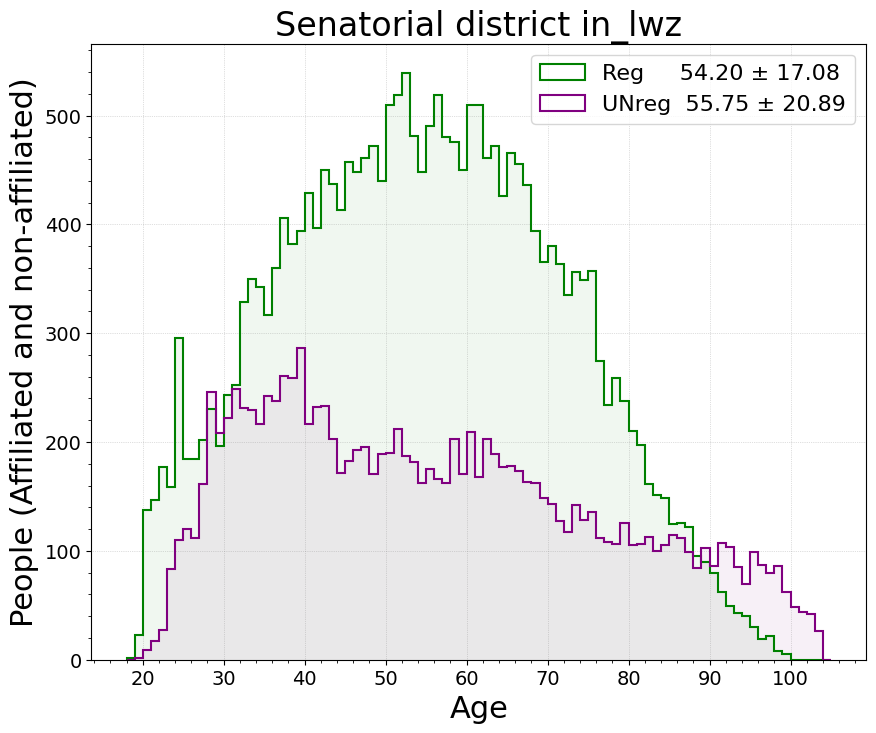

In [ ]:
#from numpy.core.numeric import False_

# ---------- print the inputs ----------
print('\033[1m','Matrix:    ','\033[0m','\n',
      name_matrix_reg , '\n',
      name_matrix_unreg,'\n', sep='',end='')
print('\n', end='')
print('\033[1m','COLUMN compared:  ','\033[0m', col_numeric,'\n', sep='',end='')

# ------------ copy REG/UNreg columns to series ------------
exec( 'col_reg   = {census}[ \'{column}\' ].copy()'.format(census= name_matrix_reg,   column= col_numeric ) )
exec( 'col_unreg = {census}[ \'{column}\' ].copy()'.format(census= name_matrix_unreg, column= col_numeric ) )
# to series ([] instead of [[]]) so calculations next do work

# ---------- PRE-PROCESSING ----------
# drop NAN in each colum. Otherwise, statistics cannot be computed
col_reg.dropna(inplace=True) 
col_unreg.dropna(inplace=True)

# ---------- plot parameters ----------
# BIN for age is 1 year bin-width, for others is sqrt of n, rounded
bin_age = list (range(18, 106, 1) )
#bin_no  = round( math.sqrt(len ( col_reg ) ) )

density = False         # True means normalized, False is absolute counts

# plot registered
print('-----   REGISTERED   -----')
print('People:       ', '{:,.0f}'.format(len ( col_reg ) ))
print('Mean:         ', '{:,.2f}'.format(statistics.mean (col_reg) ))
print('SD:           ', '{:,.2f}'.format(statistics.pstdev (col_reg) ))
str_reg = '{:,.2f}'.format(statistics.mean (col_reg)) + ' \u00B1 ' + '{:,.2f}'.format(statistics.stdev (col_reg) )  # unicode for plusminus
print('\n', end='')

# plot UNregistered
print('-----   UN-REGISTERED   -----')
print('People:       ', '{:,.0f}'.format(len ( col_unreg ) ))
print('Mean:         ', '{:,.2f}'.format(statistics.mean (col_unreg) ))
print('SD:           ', '{:,.2f}'.format(statistics.pstdev (col_unreg) ))
str_unreg = '{:,.2f}'.format(statistics.mean (col_unreg)) + ' \u00B1 ' + '{:,.2f}'.format(statistics.stdev (col_unreg) )  # unicode for plusminus

# HISTOGRAM
fig , axe = plt.subplots(1,1, figsize=(10, 8) )  # canvas size

plt.hist( col_reg ,   histtype='step',       density = density, bins= bin_age, color='green' , lw=1.5 )  
plt.hist( col_reg ,   histtype='barstacked', density = density, bins= bin_age, color='green', alpha = 0.06 )
plt.hist( col_unreg , histtype='step',       density = density, bins= bin_age, color='purple', lw=1.5 )  # 
plt.hist( col_unreg , histtype='barstacked', density = density, bins= bin_age, color='purple', alpha = 0.06 )

# ---------- plot labels ----------
plt.legend(['Reg     ' + str_reg ,
            'UNreg  ' + str_unreg ],
            fontsize=16, loc ='upper right') 


# x label
plt.xlabel( col_numeric  , fontsize=22)
axe.xaxis.set_major_locator(MultipleLocator(10))    # thicks cada 10 años
axe.xaxis.set_minor_locator(AutoMinorLocator())     # 10/2=5 minor thicks in between 

fig.patch.set_facecolor('white')    # to see the canvas size 'lightgrey'
plt.title( 'Senatorial district ' + district  , fontsize=24)
axe.tick_params(labelsize=14)

# y label
if density == True :
    plt.ylabel('Probability (normalized)', fontsize=22)
else :
    plt.ylabel('Potential voters (REGistered and UNregistered)', fontsize=22)
axe.yaxis.set_major_locator(AutoLocator())
axe.yaxis.set_minor_locator(AutoMinorLocator())  

# grid
plt.grid(which='major', axis='both')
axe.grid(linestyle=':', linewidth='0.5', color='gray', alpha = 0.5)    # 'transparent'

# ---------- plot export ----------
plt.savefig(folder + date.today().strftime("%Y-%m-%d") + district + col_numeric +'_reg_vs_ureg.png',        # root_folder FECHA DISTRITO COLUMNA plot_name
            dpi = 400, transparent=True)
# plt.savefig(r'/content/g/MyDrive/COLFAX/2021-10_senate_dist/Report_2021-12-30/voters_age_SD01.png',
   
plt.show() # should follow plt.savefig(), otherwise the file image will be blank.
plt.close()

-----   Parties_Description__Democratic   -----
Age : 	 50.8 ± 17.4

-----   Parties_Description__Republican   -----
Age : 	 56.0 ± 16.6

-----   Parties_Description__Non-Partisan -----
Age : 	 nan ± nan



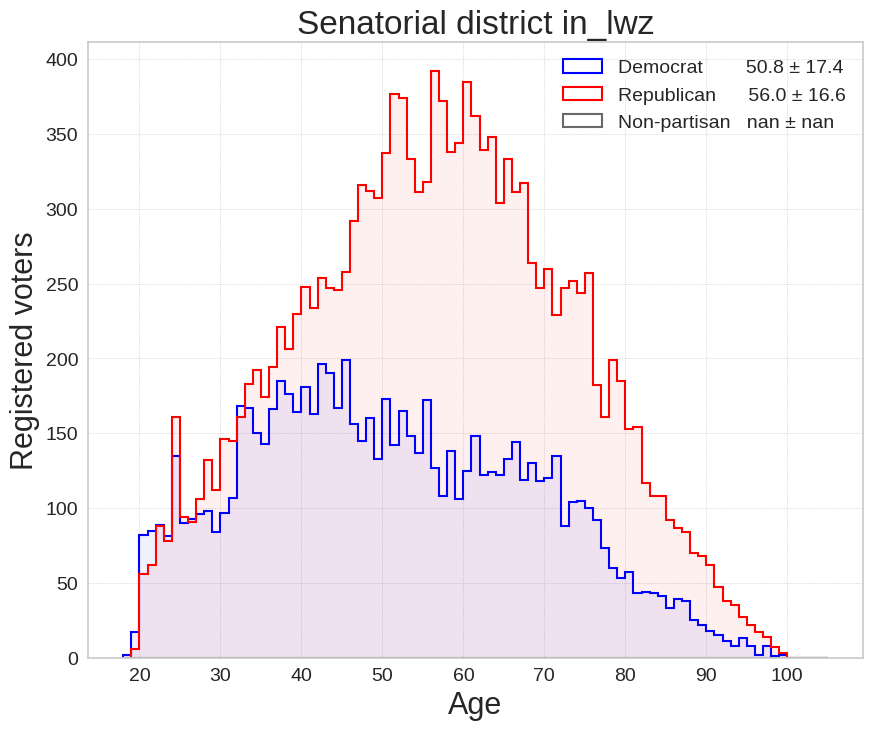

In [ ]:
# analize a NUMERIC column on the REG according to the PARTY AFFILIATION
# eg: MEAN +/- SD for the AGE of democrats, republican and non-afiliated.


# ------------ copy REG column (Parties_Description + col of interest) to df ------------
exec( 'df_reg   = {census}[[ \'Parties_Description\' , \'{column}\' ]].copy()'
    .format(census= name_matrix_reg,   column= col_numeric) )
# to df ([[]] instead of []) so calculations next do work


# ------------ calculate statistics grouped by party ------------ 
print('\033[1m', '-----   Parties_Description__Democratic   -----' ,  '\033[0m',sep="")
temp_mean = df_reg.loc[   (df_reg['Parties_Description' ] == 'Democratic'), col_numeric ].mean()
temp_std  = df_reg.loc[   (df_reg['Parties_Description' ] == 'Democratic'), col_numeric ].std()
demo_str  = '{:,.1f}'.format( temp_mean ) + ' \u00B1 '  +  '{:,.1f}'.format( temp_std )
print(col_numeric, ': \t' , demo_str )
print ('\n', end='')

print('\033[1m', '-----   Parties_Description__Republican   -----' ,  '\033[0m',sep="")
temp_mean = df_reg.loc[   (df_reg['Parties_Description' ] == 'Republican'), col_numeric ].mean()
temp_std  = df_reg.loc[   (df_reg['Parties_Description' ] == 'Republican'), col_numeric ].std()
rep_str  = '{:,.1f}'.format( temp_mean ) + ' \u00B1 '  +  '{:,.1f}'.format( temp_std )
print(col_numeric, ': \t' , rep_str )
print ('\n', end='')

print('\033[1m', '-----   Parties_Description__Non-Partisan -----' ,  '\033[0m',sep="")
temp_mean = df_reg.loc[   ( df_reg [ 'Parties_Description' ] == 'Non-Partisan' ) , col_numeric ].mean()
temp_std  = df_reg.loc[   ( df_reg [ 'Parties_Description' ] == 'Non-Partisan' ) , col_numeric ].std()
non_str  = '{:,.1f}'.format( temp_mean ) + ' \u00B1 '  +  '{:,.1f}'.format( temp_std )
print(col_numeric, ': \t' , non_str )
print ('\n', end='')

# plot parameters
bin_age = list (range(18, 106, 1) )
density = False         # True means normalized, False is absolute counts

# Histogram
fig , axe = plt.subplots(1,1, figsize=(10, 8) )

plt.hist( df_reg.loc[   (df_reg['Parties_Description' ] == 'Democratic'), col_numeric ]  , 
          histtype='step', density = density, bins= bin_age, color='blue', lw=1.5 )
plt.hist( df_reg.loc[   (df_reg['Parties_Description' ] == 'Democratic'), col_numeric ]  , 
          histtype='barstacked', density = density, bins= bin_age, color='blue', alpha = 0.06 )

plt.hist( df_reg.loc[   (df_reg['Parties_Description' ] == 'Republican'), col_numeric ]  ,
          histtype='step', density = density, bins= bin_age, color='red' , lw=1.5 )  # density=False would make counts
plt.hist( df_reg.loc[   (df_reg['Parties_Description' ] == 'Republican'), col_numeric ]  ,
          histtype='barstacked', density = density, bins= bin_age, color='red' , alpha = 0.06 )  # density=False would make counts

plt.hist( df_reg.loc[   ( df_reg [ 'Parties_Description' ] == 'Non-Partisan' )  , col_numeric ]  ,
          histtype='step', density = density, bins= bin_age, color='dimgrey' , lw=1.5 )
plt.hist( df_reg.loc[   ( df_reg [ 'Parties_Description' ] == 'Non-Partisan' )  , col_numeric ]  ,
          histtype='barstacked', density = density, bins= bin_age, color='dimgrey' , alpha = 0.06 )

# grid
plt.grid(which='major', axis='both')
axe.grid(linestyle=':', linewidth='0.5', color='gray', alpha = 0.5)    # 'transparent'

axe.tick_params(labelsize=14)

plt.title( 'Senatorial district ' + district  , fontsize=24)
plt.legend(['Democrat        ' + demo_str, 
            'Republican      ' + rep_str,
            'Non-partisan   ' + non_str ], fontsize=14, loc ='upper right')

# x label
plt.xlabel( col_numeric , fontsize=22)
axe.xaxis.set_major_locator(MultipleLocator(10))    # thicks cada 10 años
axe.xaxis.set_minor_locator(MultipleLocator(2))     # 10/2=5 minor thicks in between  

# y label
if density == True :
    plt.ylabel('Probability (normalized)', fontsize=22)
else :
    plt.ylabel('Potential voters (REGistered only)', fontsize=22)
axe.yaxis.set_major_locator(AutoLocator())
axe.yaxis.set_minor_locator(AutoMinorLocator())



# ---------- plot export ----------
plt.savefig( folder + date.today().strftime("%Y-%m-%d") + district + col_numeric +'_reg.png',  # root_folder FECHA DISTRITO COLUMNA plot_name
            dpi = 400, transparent=True)
plt.show() # should follow plt.savefig(), otherwise the file image will be blank.
plt.close()

In [ ]:
# analize a CATEGORICAL column on the REG according to the PARTY AFFILIATION

# ---------- print the inputs ----------
print('\033[1m','Matrix:    ','\033[0m','\n',
      X_input_reg , '\n',
      X_input_unreg,'\n', sep='',end='')
print('\n', end='')
print('\033[1m','COLUMN compared:  ','\033[0m','\n',
      col_categorical, sep='')
print('\n', end='')

# ------------ copy REG/UNreg columns to series ------------
exec( 'col_reg_categorical = {census}[[ \'Parties_Description\' , \'{column}\' ]].copy()'
    .format(census= X_input_reg,   column= col_categorical ) )
# to df ([[]] instead of series [])

# ---------- PRE-PROCESSING ----------
# drop NAN in each colum. Otherwise, statistics cannot be computed
col_reg_categorical.dropna(inplace=True) 


# take the col of interest + affiliation and one-hot encode
df_reg_dummy = pd.get_dummies ( col_reg_categorical, drop_first=False ).copy()           # , drop_first=True
df_reg_dummy.rename(columns={'Parties_Description_Democratic'  :'Democratic',
                             'Parties_Description_Republican'  :'Republican',
                             'Parties_Description_Non-Partisan':'Non-Partisan',
                             }, inplace=True)  
df_reg_dummy.drop(columns=['Parties_Description_Other','Parties_Description_Unknown'],
        errors='ignore', inplace=True )                                     # drop column by name, if exists
df_reg_dummy.dropna(inplace=True)

# initialize df to insert the counts through the loop
df_parties_counts = pd.DataFrame()              # empty it incase it is being re-utilized
df_parties_counts = pd.DataFrame(columns =['Column','yes_counts',
                                           'Demo_counts','Demo_%',
                                           'Rep_counts' ,'Rep_%' ,
                                           'Non_counts', 'Non_%'])

# Calculate and print total counts
total_all  = len (df_reg_dummy )
total_demo = df_reg_dummy .loc[ ( df_reg_dummy  [  'Democratic'  ] == 1 )  , # 'Parties_Description_Democratic'
                               'Democratic' ].count()
total_rep  = df_reg_dummy.loc[ ( df_reg_dummy [  'Republican'  ] == 1 )  ,
                               'Republican'  ].count()  # 'Parties_Description_Republican'
total_non  = total_all - total_demo - total_rep
print('\033[1m', '-----   COUNTS   -----' ,  '\033[0m',sep="")
print( 'total :         ' , '{:,.0f}'.format( total_all ))
print( 'counts_demo :   ' , '{:,.0f}'.format( total_demo ))
print( 'counts_rep :    ' , '{:,.0f}'.format( total_rep  ))
print( 'counts_non :    ' , '{:,.0f}'.format( total_non  ))
print( '\n', end='')
print('\033[1m', '-----------   % relative to the total party   -----------' ,  '\033[0m',sep="")
print('Note:  Vertically the % do not sum 100, because categories intersect')


# make list of columns to loop through
cols = list(df_reg_dummy.columns)
cols.remove('Democratic')
cols.remove('Non-Partisan')
cols.remove('Republican')

# LOOP
for element in enumerate( cols ) : 
    # fill in colum name
    df_parties_counts.at[  element[0]  ,'Column'] = element[1]

    # fill total yes (1) on that column
    yes_counts = df_reg_dummy.loc[     ( df_reg_dummy [    element[1]    ] == 1 )   ,  element[1]  ].count()
    df_parties_counts.at[  element[0]  ,'yes_counts'] =  yes_counts 

    # fill democratic
    counts = df_reg_dummy.loc[     ( df_reg_dummy [ 'Democratic' ] == 1 )    & 
                                    ( df_reg_dummy [    element[1]    ] == 1 )   ,  element[1]  ]  .count()
    df_parties_counts.at[  element[0]  , 'Demo_counts' ] = counts 
    df_parties_counts.at[  element[0]  , 'Demo_%'      ] = 100 * counts / total_demo 

    # fill republican
    counts = df_reg_dummy.loc[   ( df_reg_dummy [ 'Republican' ] == 1 )    & 
                                  ( df_reg_dummy [    element[1]    ] == 1 )   ,  element[1]  ]  .count()
    df_parties_counts.at[  element[0]  , 'Rep_counts' ]  =  counts
    df_parties_counts.at[  element[0]  , 'Rep_%'      ]  =  100 * counts / total_rep

    # fill non partisan
    counts = df_reg_dummy.loc[   ( df_reg_dummy [ 'Republican' ] == 0 )   & 
                                  ( df_reg_dummy [ 'Democratic' ] == 0 )   &
                                  ( df_reg_dummy [   element[1]   ] == 1 )   , element[1]   ]     .count()
    df_parties_counts.at[  element[0]  , 'Non_counts' ]  =  counts
    df_parties_counts.at[  element[0]  , 'Non_%'      ]  =  100 * counts / total_non

# sort
df_parties_counts.sort_values('Demo_%', ascending=False, inplace=True, )

# Display -- round decimals first
df_print                = pd.DataFrame()  # empty it incase it is being re-utilized
df_print['Class']       = df_parties_counts['Column']
df_print['yes_counts']  = df_parties_counts['yes_counts']   .map(lambda x:format(x,','))
df_print['Demo_counts'] = df_parties_counts['Demo_counts']  .map(lambda x:format(x,','))
df_print['Demo_%']      = df_parties_counts['Demo_%']       .apply(lambda x: round(x, 1))
df_print['Rep_counts']  = df_parties_counts['Rep_counts']   .map(lambda x:format(x,','))
df_print['Rep_%']       = df_parties_counts['Rep_%']        .apply(lambda x: round(x, 1))
df_print['Non_counts']  = df_parties_counts['Non_counts']   .map(lambda x:format(x,','))
df_print['Non_%']       = df_parties_counts['Non_%']        .apply(lambda x: round(x, 1))

display( df_print )
# with pandas.option_context('display.max_rows', 15 ): display( df_print )
del(df_print)

NameError: ignored

ConversionError: ignored

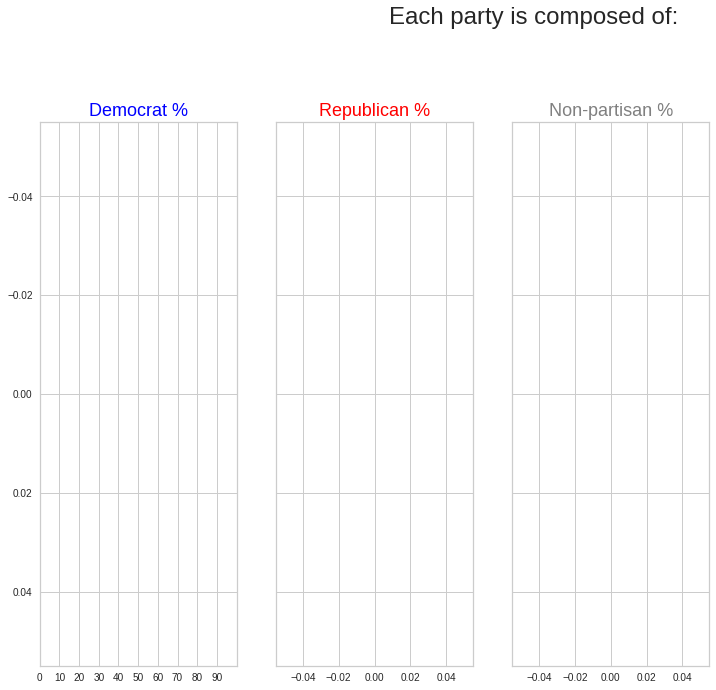

In [ ]:
# MIRROR plot

fig, axes = plt.subplots(ncols= 3 , sharey=True , figsize=(12, 10))
fig.suptitle('Each party is composed of: ', fontsize=24, x=0.7, y=1.04)
axes[0].barh( df_parties_counts['Column'] , df_parties_counts['Demo_%'] , align='center', color='blue', zorder=10)  # DEMOCRATS
axes[0].set_title('Democrat %', fontsize=18, color='blue')
axes[1].barh( df_parties_counts['Column'] , df_parties_counts['Rep_%'], align='center', color='red', zorder=10)   # REPUBLICANS
axes[1].set_title('Republican %', fontsize=18, color='red')
axes[2].barh( df_parties_counts['Column'] , df_parties_counts['Non_%'], align='center', color='grey', zorder=10)   # REPUBLICANS
axes[2].set_title('Non-partisan %', fontsize=18, color='grey')


#axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].set_xlim( 0 , 100 ) # axis can be inverted here as well
axes[0].set_xticks([0,10,20,30,40,50,60,70,80,90])
axes[0].set( yticks= cols , yticklabels= cols )
axes[1].yaxis.tick_right()
axes[1].set_xlim( 0 , 100 )
axes[1].set_xticks([0,10,20,30,40,50,60,70,80,90])
axes[2].yaxis.tick_right()
axes[2].set_xlim( 0 , 100 )
axes[2].set_xticks([0,10,20,30,40,50,60,70,80,90])

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

## voting frecuency

DG recommends to look at the past 3 midterm (general even year) and the past 2 general (general odd number). A strong Voter voted in at least 3 of those.

'General_2012_11_06', presidential or general

'General_2014_11_04', midterm

'General_2016_11_08', presidential or general

'General_2018_11_06'  midterm

'General_2020-11-03'  presidential or general

This next election is not presidential.
Voter performance ― the strong voters are >60%.

In [ ]:

# Select ELECTIONS of INTEREST for objective vector

# ------------------------------ set INPUT MATRIX -------------------------------
district          = 'in_lwz'
name_matrix_reg   = 'census_' + district + '_reg'     # 'census_sd29_reg'   # manual
name_matrix_unreg = 'census_' + district + '_unreg'   # 'census_sd29_unreg' # manual
name_vector       = 'Parties_Description'


df_reg = census_in_lwz_reg

elections_of_interest = [ 'General_2012_11_06', 'General_2014_11_04', 'General_2016_11_08', 'General_2018_11_06']

print (elections_of_interest)
print('lenght:  ', len (elections_of_interest))
print ('\n')

print ('df_reg [ elections_of_interest:   ', type (name_matrix_reg [ elections_of_interest ]) )

['General_2012_11_06', 'General_2014_11_04', 'General_2016_11_08', 'General_2018_11_06']
lenght:   4




TypeError: ignored

In [ ]:
name_matrix_reg[ elections_of_interest ]

TypeError: ignored

In [ ]:
%%script false

# CONSOLIDATE with loop

df_voting_consolidated = []   # initialize column for loop

for i in range(0, len (elections_of_interest) ) : 
    df_voting_consolidated =df_reg[  elections_of_interest  ].replace('Y',1).replace(float('nan'), 0)  # OBJECTIVE VECTOR
  
print('df_voting_consolidated  : ', type( df_voting_consolidated ))    # to check that exists

# calculate average voting
df_voting_average = df_voting_consolidated.copy()
df_voting_average = df_voting_average.sum(axis = 1) / len (elections_of_interest)
df_voting_average = df_voting_average.to_frame()  # conver from SERIES to FRAME
df_voting_average = df_voting_average.rename(columns={0:'voting_average'})
                  
print('df_voting_average:  ', type( df_voting_average ) )
print( df_voting_average.columns )
print ('\n')

# just to display
all_cols = df_voting_consolidated
all_cols ['Voting_average'] = df_voting_average
print('all_cols:  ', type( all_cols ) )

with pandas.option_context('display.max_rows', 10, 'display.max_columns', 5): 
    display(all_cols )
# del(all_cols)

display stats So ve can compare the statistics of each election

In [ ]:
print('percetage of people that voted on each election')
print ('\n')
all_cols.agg(['mean', 'std', 'unique'])

Changing vote

vote on last election. look at last election. Was the same YES : 0point, NO: 1 point repeat going back in time

Voting 5 times democrat and then 5 times republican, mean changing 1 time. This would give a different number than voting democrat the rep then repeat 10 times (10 changes).

These voters are key, because they are prone to change, they are influenciable, and be want to understant and eventually control that influenciability. a problem with this definition, is than we may not be a ble to plot hiw many people changed their vote in a particular year.

In [ ]:
# voter_variation = 1 / (voter_consistencey) 
# perhaps volatility would be better

## FEATURE ENGENIEERING

correlation

pca

In [ ]:
bike_pca = PCA(n_components=2)                  # make object 
X_transformed = bike_pca.fit_transform(X)       # each colum is normalized


In [ ]:
# plot
plt.scatter(X_transformed[:,0], X_transformed[:,1], color='k')
plt.title('2D Projection of PCA Transformed Bicycle Model')
plt.xlabel('First principal component')
plt.ylabel('Second principal component');

# PREDICTION

show all the consolidated data.

Reminder: To TRAIN you fit + transform. To TEST and PREDICT you transform only, you do not fit. 

## 01 inputs

In [ ]:
# ------------------------------ set INPUT MATRIX -------------------------------
district          = 'in_lwz'
name_matrix_reg   = 'census_' + district + '_reg'     # 'census_sd29_reg'   # manual
name_matrix_unreg = 'census_' + district + '_unreg'   # 'census_sd29_unreg' # manual
name_vector       = 'Parties_Description'

#------------------------------- FEATURE SELECTION --------------------------------
# NEW L2 

features_categorical = [
    'Gender','Age_bin5','Address_Density_bin', #'Age_bin10',                                              # personal
    #'Zip','City','Census_Block',#'Precinct','County',                              # location  precint>40, city12
    'Ethnicity_broad', #'Ethnicity_specific',                                       # ethnicity
    'Hispanic_Country_Origin',                                               
    'Language_primary','Language_assimilation',                                     # lang
    'Religion','Donor_Religion','Religion_Magazine',                                # religion
    'Marital_Status','HH_Children_presence',                                        # family
    'Education_level','Book_Buyer',                                                  # education
    'Income_bin','Investor','HH_Net_Worth',                                         # income
    'Home_Owner','Home_Value_bin','Home_Purchase_Price',                                                 # house
    'Property_House_ft2', 'Property_Land_ft2',
    'Business_Owner','Occupation_Industry','Home_Office', #'Occupation',,                         # work
    'Donor_Veterans','Veteran',                                                     # military
    'Interest_Military_history',
    'Pets_Cat_owner','Pets_Dog_owner','Donor_Animal_Welfare',                       # animals
    'Donor_Political','Donor_Conservative','Donor_Liberal',                         # political 
    'Donor_Arts_Cultural', 'Donor_Childrens_Causes', 'Donor_Community',             # donnor
    'Donor_Environmental', 'Donor_Health_Institution',
    'Donor_International_Aid',
    'Collector_Antiques', 'Collector_Arts', 'Computer_Owner',
    'Interest_Education_Online', 'Interest_Exercise_Running',
    'Financial_Magazine',                                                         # 'Federal_Donor_Ideology'
    'Interest_Games_Casino','Interest_Games_Video','Interest_Home_Furnishing', 'Interest_Home_Improvement',
    'Interest_Travel_Cruises', 'Interest_Travel_Domestic', 'Interest_Travel_Intl',
    ]
, , 'Home_value',
features_numerical = [
    #'Age',                                                                         # personal
    'Latitude', 'Longitude',                                                        # location
    #'Home_Purchase_Price','Home_value',                                            # home  -- too many nan
    #'Income_amount'                                               
    ]   

# to predict non-partisans, not for unreg
features_categorical_only_reg = [
    'Parties_Description',                                              # politics
    #'Household_Composition',
    #'Gun_Owner','MilitaryStatus_Description',                           # military
    #'Vote_Frequency',
    #'General_2012_11_06','General_2016_11_08','General_2018_11_06',     # voting
    #'General_2020_11_03',
    ]


#------------------------------- PRINT INPUTS --------------------------------

# NAME and SIZE of the inputs
print('\033[1m','----------------------','INPUT for machine learning','---------------------','\033[0m')

print('Matrix REG:       ', name_matrix_reg, '  \t\t',end='')
#exec('print({}.shape)'.format( name_matrix_reg  ))
exec('rows_reg = {}.shape[0]'.format( name_matrix_reg ))
exec('cols_reg = {}.shape[1]'.format( name_matrix_reg ))
print ('rows: {:,.0f}    cols: {:,.0f}'.format( rows_reg, cols_reg ))

print('Matrix UNreg:     ', name_matrix_unreg,'\t\t',end='')
#exec('print({}.shape)'.format( name_matrix_unreg  ))
exec('rows_unreg = {}.shape[0]'.format( name_matrix_unreg ))
exec('cols_unreg = {}.shape[1]'.format( name_matrix_unreg ))
print ('rows: {:,.0f}    cols: {:,.0f}'.format( rows_unreg, cols_unreg ))

print('Ojective vector:  ', name_vector)
print ('\n', end='')

# FEATURES not loaded into the input matrix
print('\033[1m','--------------- Features loaded in the input matrix---------------','\033[0m')
#print('\033[1m','------------','Features NOT loaded in the input matrix','------------','\033[0m')
exec('matrix_all_cols = {}.columns'.format(name_matrix_reg))            # list all columns in MATRIX
matrix_loaded_cols = features_categorical + features_numerical + features_categorical_only_reg
matrix_not_loaded_cols = sorted( list( set( matrix_all_cols ) - set( matrix_loaded_cols ) ))

print('Categorical:                  ', len(features_categorical))
print('Numerical:                    ', len(features_numerical))
print('Only in reg:                  ', len(features_categorical_only_reg))
print('Consolidated but NOT loaded : ', len(matrix_not_loaded_cols))
print(matrix_not_loaded_cols)

del (matrix_all_cols , matrix_not_loaded_cols) # matrix_loaded_cols -> for report
del (rows_reg, cols_reg, rows_unreg, cols_unreg )

 ---------------------- INPUT for machine learning --------------------- 
Matrix REG:        census_in_lwz_reg   		rows: 24,076    cols: 150
Matrix UNreg:      census_in_lwz_unreg 		rows: 14,296    cols: 126
Ojective vector:   Parties_Description

 --------------- Features loaded in the input matrix--------------- 
Categorical:                   53
Numerical:                     2
Only in reg:                   1
Consolidated but NOT loaded :  94
['Address_ApartmentNum', 'Address_HouseNumber', 'Address_StreetName', 'Age', 'Age_bin10', 'AreaMedianHousingValue', 'Census_Block', 'City', 'City_Council_Commissioner_District', 'City_School_District', 'Congressional_District', 'County', 'Donors_FEC_Number_amount', 'Donors_FEC_number', 'EarlyBallot_General_2018_11_06', 'EarlyBallot_General_2020_11_03', 'EarlyBallot_Primary_2018_05_08', 'EarlyBallot_Primary_2020_06_02', 'Education_years', 'Ethnicity_specific', 'Federal_Donor_Ideology', 'FirstName', 'General_2012_11_06', 'General_2014_11_04', 'G

## 02 pre-process

In [ ]:
# --- ALLLL

# ----X0---- concatenate vertically REG and UNreg matrices, for categorical columns only
exec('''X0 = pd.concat([{}[ features_categorical + features_categorical_only_reg ],
                        {}[ features_categorical ]  
                      ]).copy()'''.format( name_matrix_reg , name_matrix_unreg ))

# ----X1---- drop vector
X1 = X0.copy(deep=True) 
X1.drop(columns=[ name_vector ], errors='ignore', inplace=True )                    # drop the vector from maxtrix

# X1.info()  # inspect the features
print('\033[1m','--------------- Check the process ---------------','\033[0m')
print('01. categorical features from REG+UNreg are concatenated')
print('X1:     ', X1.shape,'\n')
print ('rows: {:,.0f}    cols: {:,.0f}'.format( X1.shape[0], X1.shape[1] ))


# ----X2---- ONE-HOT ENCODING for REG+UNreg, categorical only ------------
ohe_drop_first=True
X2 = pd.get_dummies ( X1 , drop_first= ohe_drop_first ).copy()              # drop_first=True false for L2reg
X2.rename(columns= lambda x:   re.sub(' ' ,'_',x), inplace=True)            # remove blank space from col name (as it has element)

exec('y = pd.get_dummies({}[ name_vector ]).copy()'.format( name_matrix_reg ))      # OHE for the objective vector

# ------------ Check OHE expansion ------------
print('02. OHE to categorical features, with Drop first:', ohe_drop_first )
print('X2:      ', X2.shape,'\n')

# print all X2 OHE columns (with loop to print them all)
#for i in X2.columns : print(i)


# ---- X3 ---- SPLIT the REG+UNreg into matrix
exec('X3_unreg = X2.iloc[ len({}): ] .copy()'.format( name_matrix_reg ))  # the 2nd half of x2
exec('X3       = X2.iloc[ :len({}) ] .copy()'.format( name_matrix_reg ))  # the 1st half of x2
print('03. REG-UNreg are split')
print('X3:       ',X3.shape)
print('X3_unreg:',X3_unreg.shape,'\n')


# ---- X4 ---- add features numerical (after OHE) ------------

exec('X4       = X3      .join({}[ features_numerical ]).copy()'.format( name_matrix_reg   ))
exec('X4_unreg = X3_unreg.join({}[ features_numerical ]).copy()'.format( name_matrix_unreg ))
X4_unreg.dropna(inplace=True)                                               # to predict UNreg nan must be removed.
print('04. numerical features are added to each matrix')
print('X4      ',X4.shape)
print('04. nan are dropped from unreg to predict')
print('X4_unreg',X4_unreg.shape, ' ---> matrix to predict UNreg','\n')


# ---- X5 ---- concatenate with vector, and drop nan
X5 = pd.concat([ X4 , y  ], axis=1)         # to the side
print('05. vector is added to the side and NaN are dropped')
X5.dropna(inplace=True)
print('X5:      ', X5.shape,'\n')


# ---- X6 ---- for predicitions, with Non-partisan only (Dem+Rep are removed)
X6 = X5  [ ( X5[  'Democratic' ] == 0 ) & ( X5 [ 'Republican' ] == 0 ) ] .copy()    # Sacamos los Partisan
print('06. only rows for NON-partisan')
print('X6:      ', X6.shape,'---> matrix to predict REG non-partisan','\n')

# ---- X7 ---- for train and test. Only Dem+Rep (Non-partisan were removed)
X7 = X5  [ ( X5[  'Democratic' ] == 1 ) | ( X5 [ 'Republican' ] == 1 ) ] .copy()    #Sacamos los NON-Partisan, porque estos son los datos con que entrenaremos y testearemos el modelo
print('07. only rows for PARTISAN (Dem+Rep)')
print('X7:      ', X7.shape,'\n')

# ---- y8 ---- Vector para predicción
y8 = X7[['Democratic', 'Republican']].copy()
print('08. objective vector')
print('y8:      ', y8.shape, ' ---> vector to train and test','\n')

#y8 = X7[['Democratic', 'Non-Partisan', 'Other', 'Republican', 'u']].copy()
X7.drop(columns=['Democratic','Republican'],errors='ignore', inplace=True ) # remueve el vector de la matrix
X8 = X7.copy()
# X7.drop(columns=['Democratic','Non-Partisan','Republican','Other','Unknown' ],errors='ignore', inplace=True )
print('08. input matrix (vector removed)')
print('X8:      ', X8.shape, ' ---> matrix to train and test')

del(X1, X2, X3_unreg,  X5, X6, X7)   	# don't delete outputs:  X4_unreg, x6, y8, x8
# X4 IS USED TO MATCH EXPORTS, es copiado desde X3, asi que no puedo borrar x3

 --------------- Check the process --------------- 
01. categorical features from REG+UNreg are concatenated
X1:      (38372, 53) 

rows: 38,372    cols: 53
02. OHE to categorical features, with Drop first: True
X2:       (38372, 146) 

03. REG-UNreg are split
X3:        (24076, 146)
X3_unreg: (14296, 146) 

04. numerical features are added to each matrix
X4       (24076, 148)
04. nan are dropped from unreg to predict
X4_unreg (2845, 148)  ---> matrix to predict UNreg 

05. vector is added to the side and NaN are dropped
X5:       (12404, 150) 

06. only rows for NON-partisan
X6:       (0, 150) ---> matrix to predict REG non-partisan 

07. only rows for PARTISAN (Dem+Rep)
X7:       (12404, 150) 

08. objective vector
y8:       (12404, 2)  ---> vector to train and test 

08. input matrix (vector removed)
X8:       (12404, 148)  ---> matrix to train and test


## fit scikit

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(
    X8 ,                               # matrix
    y8['Democratic'],                  # vector
    test_size    = 0.33,               # test with 33%, train 77%
    random_state = 2020045)

# viejo
scaler        = StandardScaler()
scaler.fit(X_train)  
X_test_std    = scaler.transform( X_test )                      # TESTING is FIT only                           # TRAINING is FIT ...
X_train_std   = scaler.transform( X_train )                     # and TRANSFORM

# ------ MODEL SELECTIONS ------ Create linear regression object
model   = LogisticRegression()                                  # Unknown label type: 'continuous'
#model   = RidgeClassifierCV()                                   # Ridge classifier with built-in cross-validation.
#model   = LogisticRegression(penalty='l2', solver='lbfgs')     # classification with regularization

# Train the model using the training sets
model.fit( X_train_std , y_train )                              # Unknown label type: 'continuous'

# Make predictions using the testing set
y_pred_testing = model.predict( X_test_std )
#y_pred_prob   = model.predict_proba( X_test_std )[ : , 1 ]     # probabilidad de que sea uno
#yhat          = model.predict_proba( X_test_std )[ : , 1 ]

# print scores
func_model_evaluation ( y_test , y_pred_testing )

Accuracy:    0.668 	 (tp + tn) / (tp + tn + fp + fn)
Precision:   0.550 	 tp / (tp + fp)
Recall:      0.260 	 tp / (tp + fn)
f1:          0.353 	 tp / (tp + 0.5x(fp + fn))
ROC_AUC:     0.573

Confusion matrix: 
tn: 2,366    fp: 303
fn: 1,055    tp: 370



In [ ]:
y_test

1065     0
8986     0
20128    0
3077     1
16851    0
        ..
5472     0
4548     1
4625     0
22662    0
218      0
Name: Democratic, Length: 4094, dtype: uint8

In [ ]:
y_test.shape

(4094,)

y test es binario asi que no puedo hacer 10 bins

In [ ]:
# make histogrma to check visually

# pd.qcut( y_test ['Predicted_probability'],10)     # histogram spread over 10 bins (auto edges)
pd.qcut( y_pred_non_partisan  ['Predicted_probability'],10)     # histogram spread over 10 bins (auto edges)

IndexError: ignored

In [ ]:
# ---------- PREDICTIONS ----------
# for the unreg, you only scale and predic using the already trained model.
# there is no split, testing or removing rows based on political party
y_pred_non_partisan         = model.predict(scaler.transform( X8 ))  # y_non_partisan_pred 
y_pred_non_partisan_prob    = model.predict_proba(scaler.transform( X8 ))[ : , 1 ]  # y_non_partisan_pred_proba

# for the UNreg
y_pred_unreg                = model.predict(scaler.transform( X4_unreg ))            # y_unregistered_pred
y_pred_unreg_prob           = model.predict_proba(scaler.transform( X4_unreg ))[ : , 1 ]  # y_unregistered_pred_proba 

In [ ]:
y_pred_non_partisan_prob.columns

AttributeError: ignored

In [ ]:
histograms['y_pred_non_partisan_prob'] = pd.DataFrame(y_pred_non_partisan_prob)  

NameError: ignored

In [ ]:
histograms.columns

NameError: ignored

In [ ]:
histograms['Predicted_prob_decile'] = pd.cut( histograms['y_pred_non_partisan_prob'],  
    bins   = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    labels = ['0-0.1','0.1-0.2','0.2-0.3','0.3-0.4','0.4-0.5',
              '0.5-0.6','0.6-0.7','0.7-0.8','0.8-0.9','0.9-1.0'],
    right  = True,                                          # bins [1, 2, 3] indicate labels (1,2], (2,3]
    ordered = True )           # add category because nans are not binned


NameError: ignored

In [ ]:
histograms['Predicted_prob_decile'].value_counts()

NameError: ignored

NameError: ignored

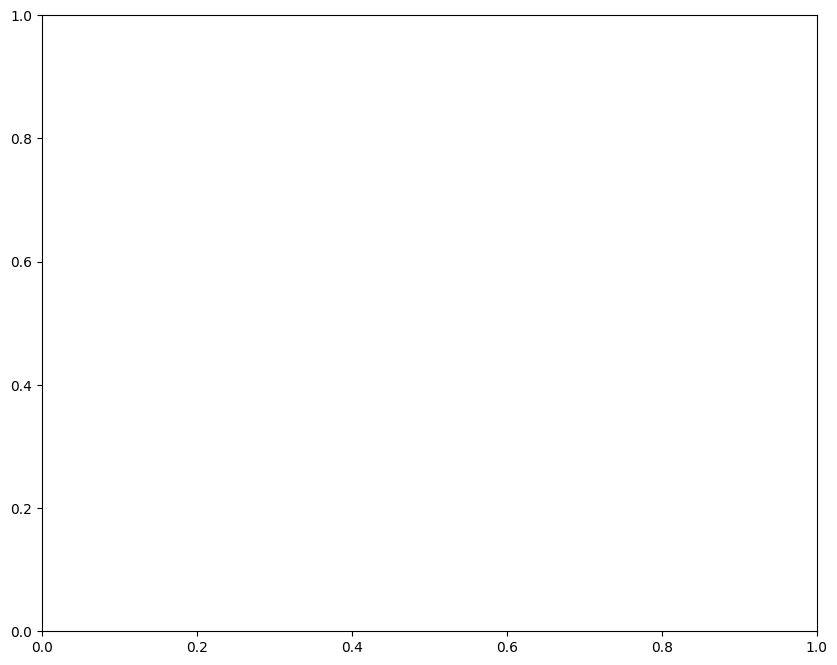

In [ ]:
fig_pdemo_decile , axe = plt.subplots(1,1, figsize=(10, 8) )  # canvas size

plt.hist(histograms['y_pred_non_partisan_prob'],
         density = False,                                       # counts (not normalized)
         bins    = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])   # bins=10 default

plt.ylabel('Counts')
plt.xlabel('Probability (democrat)')
#plt.grid(True)
plt.show()

fig_name = folder +'_'+'decile'+'_'+ date.today().strftime("%Y-%m-%d") + '.png'
fig_pdemo_decile.savefig( fig_name, dpi = 300, transparent=True)
# plt.close(fig_01_plot)

fig_pdemo_decile.savefig("output.jpg")
# doc.save( folder + 'report_' + district.upper() +'_'+ date.today().strftime("%Y-%m-%d") + '.docx')

In [ ]:
fig_name

'/content/g/MyDrive/COLFAX/2022-08_Boone_better_IN_update/_decile_2022-08-15.png'

In [ ]:
# ---------- results ----------
# Democrat is 1, non-democrat is 0
print('Prediction for NON-partisan')
print(pd.Series( y_pred_non_partisan ).value_counts() )
print('\n',end='')

print('Prediction for UNregistered')
print(pd.Series( y_unregistered_pred ).value_counts() )

Prediction for NON-partisan
0    2041
1    1056
dtype: int64

Prediction for UNregistered


NameError: ignored

In [ ]:
# Democrat is 1, non-democrat is 0
pd.Series(y_unregistered_pred).value_counts()

In [ ]:
pd.Series(y_non_partisan_pred , index= X4.index) .replace({1:'Democrat',0:'Republican'})

In [ ]:
census_sd01_reg[['LALVOTERID', 'Voters_StateVoterID']].loc[X4.index]

In [ ]:
pd.Series(y_non_partisan_pred_proba , index= X4.index).rename('Predicted_probability')

In [ ]:
# export REG NON-Partisan prediction
df_export1 =pd.concat([ census_sd38_reg[['LALVOTERID', 'Voters_StateVoterID']].loc[X4.index],
            pd.Series(y_non_partisan_pred , index=X4.index).replace({1:'Democrat' , 0:'Republican'}).rename('Predicted_party'),
            pd.Series(y_non_partisan_pred_proba , index=X4.index).rename('Predicted_probability')],
            axis = 1)

df_export1.to_excel(r'2021-12-29_prediction_SD38_REGistered.xlsx')
#files.download( df_export1 )   # pops-up location o save
del(df_export1)
#filename = '2021-12-15_prediction_SD29_REGistered.xlsx'

In [ ]:
# export UNreg prediction
df_export2 =pd.concat([ census_sd38_unreg[['Individual_Id']].loc[X2_unreg.dropna().index],
            pd.Series(y_unregistered_pred       , index=X2_unreg.dropna().index).replace({1:'Democrat' , 0:'Republican'}).rename('Predicted_party'),
            pd.Series(y_unregistered_pred_proba , index=X2_unreg.dropna().index).rename('Predicted_probability')],
            axis = 1)
df_export2.to_excel(r'2021-12-29_prediction_SD38_UNregistered.xlsx')
#files.download( df_export2 )   # pops-up location o save
del(df_export2)

In [ ]:
y_unregistered_pred       = model.predict      (scaler.transform(X2_unreg.dropna()))
y_unregistered_pred_proba = model.predict_proba(scaler.transform(X2_unreg.dropna()))[ : , 1 ]

In [ ]:
pd.Series(y_unregistered_pred).value_counts()

Luego de predecir ambos, hay que revisar que la razon entre los predichos democratas y republicanos sea razonable, seria mucho pensar que fuera 10% un caso, por ejemplo. Yo esperaria algo entre 40, 60.

Finalmente, tu tendras la predicción de los casos donde pudiste predecir, y aca hay que llevar esta información de vuelta a los datos originales, y entregar las bases de datos de los registrados y no registrados, con una columna nueva, en donde se prediga los non partisas y los unregistrados.

## 04 plot

In [ ]:
# def func_plot_roc ( y_test , y_pred ) :
print('ROC_AUC score: ', '{:.3f}'.format( roc_auc_score( y_test , y_pred_testing ) ) )

fpr, tpr, threshold = roc_curve( y_test , y_pred_testing  )


# canvas size
fig_01_plot , ax_01 = plt.subplots(1,1, figsize=(5, 5) )

fig_01_plot.patch.set_facecolor('lightgrey')    # to see the canvas size

plt.title('ROC curve', fontsize=18)
plt.plot( fpr , tpr , color='red', lw=1.5)
plt.plot([0, 1], ls="--", lw=1.5, color='dimgray')

ax_01.tick_params(labelsize=12)

plt.ylabel('True positive rate', fontsize=16)
ax_01.yaxis.set_major_locator( MultipleLocator(0.25) )

plt.xlabel('False positive rate', fontsize=16)
ax_01.xaxis.set_major_locator( MultipleLocator(0.25) )
ax_01.xaxis.set_minor_locator( MultipleLocator(5) )


plt.grid()
# grid(b=None, which='major', axis='both', **kwargs)
ax_01.grid(linestyle=':', linewidth='0.5', color='gray')

plt.legend(['Logistic regression','Random'], fontsize=12, loc ="lower right") 


# fig_01_plot.suptitle('Summary of the parameters utilized',x= 1.4, fontsize=12)
# plt.text(1.2, 1, 'Matrix: ', df_matrix.shape[1] )
# plt.text(1.2, 0.9, '             MedianEducationYears EstimatedIncomeAmount')

# print ('  '.join(list_columns_continuous) )   # if wanting to print all

### Print text in a windows

print('Matrix:        ', X7.shape[1], 'columns' )
print('Vector:        ', 'Party_democratic' )  #
print('Model :         Logistic Regression')
# print('n     :  ', f"{ df_matrix_2.shape[0]  :,d}", 'rows')


# current date and time
from datetime import datetime
datetime_str = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print("Date:          ", datetime_str)

# changing the rc parameters and plotting a line plot 
#plt.rcParams['figure.figsize'] = [2, 2] 

# put text before this
plt.show()
# fig_01_plot.savefig(r'/DW/MyDrive/Colab Notebooks/ROC_logreg.png', dpi = 300, transparent=True)
plt.close(fig_01_plot)

NameError: ignored

OLD SCI KIT LEARN

In [ ]:
%%script false

# ------------ renaming ------------
temp_col = X1

for col_encoded in X2 : 
    X2.rename(columns={col:  temp_col  +  ':_'  +  col_encoded }, inplace=True)   # parent_name  +  :_  +  encoded name  

# ONE-HOT encoding
most_frecuent = df_reg[  temp_col  ].value_counts(dropna=False).idxmax()             # find most frecuent
df_loop = pandas.get_dummies ( df_reg[  temp_col  ]).drop(columns=[most_frecuent] )  # encode dropping most frecuent

# RENAME encoded columns using the parent name
# {"old": "new", }   # change columns to strings because NaN was not str
df_loop.rename(columns=str,inplace=True)     # when a col name is a number or nan


# ------------ Get DUMMIES ------------

X2 = pd.get_dummies ( X1, drop_first=False ).copy()  # , drop_first=True 

# RENAME DUMMY COLUMN
#X2.rename(columns=str,inplace=True)     # when a col name is a number or nan
# temp_col   = 'Residence_Addresses_CensusBlockGroup' # IS THE PARENT COL NAME
#for col_encoded in X2 : 
#     X2.rename(columns={col:  temp_col  +  ':_'  +  col_encoded }, inplace=True)   # parent_name  +  :_  +  encoded name            

# joining numerical

# drop nan together
X3 = pd.concat([ X2 , y  ], axis=1)
X3.dropna(inplace=True)

# Sacamos los non-partisan
X4 = X3  [ ( X3[  'Democratic' ] == 0 ) & ( X3 [ 'Republican' ] == 0 ) ] .copy()

#Sacamos los Partisan, porque estos son los datos con que entrenaremos y testearemos el modelo
X5 = X3  [ ( X3[  'Democratic' ] == 1 ) | ( X3 [ 'Republican' ] == 1 ) ] .copy()

#y5 = X5[['Democratic', 'Non-Partisan', 'Other', 'Republican', 'Unknown']].copy()
y5 = X5[['Democratic', 'Republican']].copy()
# X5.drop(columns=['Democratic','Non-Partisan','Republican','Other','Unknown' ],errors='ignore', inplace=True )
X5.drop(columns=['Democratic','Republican'],errors='ignore', inplace=True )


# split
y2 = X4[['Democratic', 'Republican']].copy()  
#y2 = X4[['Democratic', 'Non-Partisan', 'Other', 'Republican', 'Unknown']].copy()  
#X4.drop(columns=['Democratic','Non-Partisan','Republican', 'Other','Unknown' ],errors='ignore', inplace=True )
X4.drop(columns=['Democratic','Republican'],errors='ignore', inplace=True )


# ------------ set MODEL  ------------
# Create linear regression object
model   = LogisticRegression()                                 # Unknown label type: 'continuous'
#model   = RidgeClassifierCV()                                   # Ridge classifier with built-in cross-validation.
#model   = LogisticRegression(penalty='l2', solver='lbfgs')     # classification with regularization
print('\033[1m','Sci-Kit learn MODEL:    ','\033[0m','\n',
      model , '\n\n', sep='',end='')

# ------------ set INPUT ------------
district      = 'pac'      # sd29
X_input_reg   = 'census_' + 'in_lwz' + '_reg'     # 'census_sd29_reg'   # manual
X_input_unreg = 'census_' + 'in_lwz' + '_unreg'   # 'census_sd29_unreg' # manual

# print inputs that were set
print('\033[1m','Matrix:    ','\033[0m',sep='')
print(X_input_reg ,'\t\t',sep='',end='')
exec('print({}.shape)'.format( X_input_reg  ))
print(X_input_unreg,'\t' ,sep='',end='')
exec('print({}.shape)'.format( X_input_unreg  ))

## set vector perhaps.

In [ ]:
%%time

###  versión con EXEC fue corregida por Carlos. Para no necesitar volver a escribir los input files.

#categorical get dummies
#X1 = census_sd01_reg[ categorical_features + categorical_features_reg_only ]
#X1 = pd.concat(             [ census_sd38_reg   [ categorical_features ],
#                              census_sd38_unreg [ categorical_features ]])
# X1 = pd.concat([ exec('({})'.format( X_input_reg ))  [ categorical_features ],
#                  exec('({})'.format( X_input_unreg )) [ categorical_features ]])
exec('X1 = pd.concat([{}[ categorical_features ],{}[categorical_features]]).copy()'
    .format( X_input_reg , X_input_unreg ))


# ------------ Get DUMMIES ------------
#X2 = pd.get_dummies ( X1, drop_first=True )  # , drop_first=True 

X2 = pd.get_dummies ( X1, drop_first=False ).copy()  # , drop_first=True 
#X2 = pd.get_dummies ( X1, X1.value_counts().index[0] )  # drop most frecuent

# RENAME DUMMY COLUMN
#X2.rename(columns=str,inplace=True)     # when a col name is a number or nan
# temp_col   = 'Residence_Addresses_CensusBlockGroup' # IS THE PARENT COL NAME
#for col_encoded in X2 : 
#     X2.rename(columns={col:  temp_col  +  ':_'  +  col_encoded }, inplace=True)   # parent_name  +  :_  +  encoded name            

# split
#X2_unreg    = X2.iloc[len  ( census_sd38_reg   ):].copy()
exec('X2_unreg = X2.iloc[ len({}): ].copy()'.format(X_input_reg))

#X2      = X2.iloc[:len ( census_sd38_reg   )].copy()
exec('X2       = X2.iloc[ :len({}) ].copy()'.format(X_input_reg))

# add numerical features
#X2_unreg    = X2_unreg.join( census_sd38_unreg [numeric_features])
exec('X2_unreg=X2_unreg.join({}[numeric_features]).copy()'.format(X_input_unreg))
exec('X2=X2.join({}[numeric_features]).copy()'.format(X_input_reg))

# vector get dummies
#y = pd.get_dummies         ( census_sd38_reg   ['Parties_Description'] )
exec('y=pd.get_dummies({}["Parties_Description"]).copy()'.format(X_input_reg))

# drop nan together
X3 = pd.concat([ X2 , y  ], axis=1)
X3.dropna(inplace=True)

# Sacamos los non-partisan
X4 = X3  [ ( X3[  'Democratic' ] == 0 ) & ( X3 [ 'Republican' ] == 0 ) ] .copy()

#Sacamos los Partisan, porque estos son los datos con que entrenaremos y testearemos el modelo
X5 = X3  [ ( X3[  'Democratic' ] == 1 ) | ( X3 [ 'Republican' ] == 1 ) ] .copy()

#y5 = X5[['Democratic', 'Non-Partisan', 'Other', 'Republican', 'Unknown']].copy()
y5 = X5[['Democratic', 'Republican']].copy()
# X5.drop(columns=['Democratic','Non-Partisan','Republican','Other','Unknown' ],errors='ignore', inplace=True )
X5.drop(columns=['Democratic','Republican'],errors='ignore', inplace=True )


# split
y2 = X4[['Democratic', 'Republican']].copy()  
#y2 = X4[['Democratic', 'Non-Partisan', 'Other', 'Republican', 'Unknown']].copy()  
#X4.drop(columns=['Democratic','Non-Partisan','Republican', 'Other','Unknown' ],errors='ignore', inplace=True )
X4.drop(columns=['Democratic','Republican'],errors='ignore', inplace=True )

CPU times: user 6.58 s, sys: 363 ms, total: 6.94 s
Wall time: 6.9 s


In [ ]:
%%time
# ---------- ORIGINAL BY CARLOS AND WORKING ---------- pero NO VECTORIZADO

#X1 = census_sd01_reg[ categorical_features + categorical_features_reg_only ] #categorical get dummies
X1          = pd.concat([census_in_lwz_reg  [ categorical_features ],
                         census_in_lwz_unreg[ categorical_features ]])

# ------------ Get DUMMIES ------------
X2          = pd.get_dummies ( X1, drop_first=True )        # drop_first=True 

X2          = X2.iloc[:len( census_in_lwz_reg ) ].copy()
X2_unreg    = X2.iloc[ len( census_in_lwz_reg ):].copy()

# joining numerical
X2          = X2      .join( census_in_lwz_reg   [numeric_features])
X2_unreg    = X2_unreg.join( census_in_lwz_unreg [numeric_features])

# vector get dummies
y           = pd.get_dummies ( census_in_lwz_reg ['Parties_Description'] )

CPU times: user 4.41 s, sys: 935 ms, total: 5.34 s
Wall time: 6.02 s


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(
    X8 ,                               # matrix
    y8['Democratic'],                  # vector
    test_size    = 0.33,               # test with 33%, train 77%
    random_state = 2020045)

# viejo
scaler        = StandardScaler()
scaler.fit(X_train)  
X_test_std    = scaler.transform( X_test )                      # TESTING is FIT only                           # TRAINING is FIT ...
X_train_std   = scaler.transform( X_train )                     # and TRANSFORM

# ------ MODEL SELECTIONS ------ Create linear regression object
model   = LogisticRegression()                                  # Unknown label type: 'continuous'
#model   = RidgeClassifierCV()                                   # Ridge classifier with built-in cross-validation.
#model   = LogisticRegression(penalty='l2', solver='lbfgs')     # classification with regularization

# Train the model using the training sets
model.fit( X_train_std , y_train )                              # Unknown label type: 'continuous'

# Make predictions using the testing set
y_pred_testing = model.predict( X_test_std )
#y_pred_prob   = model.predict_proba( X_test_std )[ : , 1 ]     # probabilidad de que sea uno
#yhat          = model.predict_proba( X_test_std )[ : , 1 ]

# print scores
func_model_evaluation2 ( y_test , y_pred_testing )

# ---------- PREDICTIONS ----------
# for the unreg, you only scale and predic using the already trained model.
# there is no split, testing or removing rows based on political party
y_non_partisan_pred = model.predict(scaler.transform(X4))
y_non_partisan_pred_proba = model.predict_proba(scaler.transform(X4))[ : , 1 ]

# for the UNreg
y_unregistered_pred = model.predict(scaler.transform( X2_unreg.dropna()) )
y_unregistered_pred_proba = model.predict_proba(scaler.transform( X2_unreg.dropna() ))[ : , 1 ]

In [ ]:
# ---------- results ----------
# Democrat is 1, non-democrat is 0
print('Prediction for NON-partisan')
print(pd.Series( y_non_partisan_pred ).value_counts() )
print('\n',end='')

print('Prediction for UNregistered')
print(pd.Series( y_unregistered_pred ).value_counts() )

In [ ]:
# Democrat is 1, non-democrat is 0
pd.Series(y_unregistered_pred).value_counts()

pd.Series(y_non_partisan_pred , index= X4.index) .replace({1:'Democrat',0:'Republican'})

census_sd01_reg[['LALVOTERID', 'Voters_StateVoterID']].loc[X4.index]

pd.Series(y_non_partisan_pred_proba , index= X4.index).rename('Predicted_probability')


# export NON-PARTISAN prediction
df_export1 =pd.concat([ census_sd38_reg[['LALVOTERID', 'Voters_StateVoterID']].loc[X4.index],
            pd.Series(y_non_partisan_pred , index=X4.index).replace({1:'Democrat' , 0:'Republican'}).rename('Predicted_party'),
            pd.Series(y_non_partisan_pred_proba , index=X4.index).rename('Predicted_probability')],
            axis = 1)

df_export1.to_excel(r'2021-12-29_prediction_SD38_REGistered.xlsx')
#files.download( df_export1 )   # pops-up location o save
del(df_export1)
#filename = '2021-12-15_prediction_SD29_REGistered.xlsx'


# export UNregistered prediction
df_export2 =pd.concat([ census_sd38_unreg[['Individual_Id']].loc[X2_unreg.dropna().index],
            pd.Series(y_unregistered_pred       , index=X2_unreg.dropna().index).replace({1:'Democrat' , 0:'Republican'}).rename('Predicted_party'),
            pd.Series(y_unregistered_pred_proba , index=X2_unreg.dropna().index).rename('Predicted_probability')],
            axis = 1)
df_export2.to_excel(r'2021-12-29_prediction_SD38_UNregistered.xlsx')
#files.download( df_export2 )   # pops-up location o save
del(df_export2)

In [ ]:
y_unregistered_pred       = model.predict      (scaler.transform( X2_unreg.dropna() ))
y_unregistered_pred_proba = model.predict_proba(scaler.transform( X2_unreg.dropna() ))[ : , 1 ]

In [ ]:
pd.Series(y_unregistered_pred).value_counts()

Luego de predecir ambos, hay que revisar que la razon entre los predichos democratas y republicanos sea razonable, seria mucho pensar que fuera 10% un caso, por ejemplo. Yo esperaria algo entre 40, 60.

Finalmente, tu tendras la predicción de los casos donde pudiste predecir, y aca hay que llevar esta información de vuelta a los datos originales, y entregar las bases de datos de los registrados y no registrados, con una columna nueva, en donde se prediga los non partisas y los unregistrados.

In [ ]:
# def func_plot_roc ( y_test , y_pred ) :
print('ROC_AUC score: ', '{:.3f}'.format( roc_auc_score( y_test , y_pred_testing ) ) )

fpr, tpr, threshold = roc_curve( y_test , y_pred_testing  )


# canvas size
fig_01_plot , ax_01 = plt.subplots(1,1, figsize=(5, 5) )

fig_01_plot.patch.set_facecolor('lightgrey')    # to see the canvas size

plt.title('ROC curve', fontsize=18)
plt.plot( fpr , tpr , color='red', lw=1.5)
plt.plot([0, 1], ls="--", lw=1.5, color='dimgray')

ax_01.tick_params(labelsize=12)

plt.ylabel('True positive rate', fontsize=16)
ax_01.yaxis.set_major_locator( MultipleLocator(0.25) )

plt.xlabel('False positive rate', fontsize=16)
ax_01.xaxis.set_major_locator( MultipleLocator(0.25) )
ax_01.xaxis.set_minor_locator( MultipleLocator(5) )


plt.grid()
# grid(b=None, which='major', axis='both', **kwargs)
ax_01.grid(linestyle=':', linewidth='0.5', color='gray')

plt.legend(['Logistic regression','Random'], fontsize=12, loc ="lower right") 


# fig_01_plot.suptitle('Summary of the parameters utilized',x= 1.4, fontsize=12)
# plt.text(1.2, 1, 'Matrix: ', df_matrix.shape[1] )
# plt.text(1.2, 0.9, '             MedianEducationYears EstimatedIncomeAmount')

# print ('  '.join(list_columns_continuous) )   # if wanting to print all

### Print text in a windows

print('Matrix:        ', X7.shape[1], 'columns' )
print('Vector:        ', 'Party_democratic' )  #
print('Model :         Logistic Regression')
# print('n     :  ', f"{ df_matrix_2.shape[0]  :,d}", 'rows')


# current date and time
from datetime import datetime
datetime_str = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print("Date:          ", datetime_str)

# changing the rc parameters and plotting a line plot 
#plt.rcParams['figure.figsize'] = [2, 2] 

# put text before this
plt.show()
# fig_01_plot.savefig(r'/DW/MyDrive/Colab Notebooks/ROC_logreg.png', dpi = 300, transparent=True)
plt.close(fig_01_plot)

ROC_AUC score:  0.565
Matrix:         81 columns
Vector:         Party_democratic
Model :         Logistic Regression
Date:           2022-08-08 05:20:02


evaluacion de SequentialFeatureSelector

In [ ]:
%%script false

# version ml
sfs1 = SFS(knn, 
           direction    =‘forward’, # ‘backward’}, default=’forward’
           k_features   =15, 
           forward      =True, 
           floating     =False, 
           verbose      =2,
           scoring      =’accuracy’,
           cv           =0)

sfs1 = sfs1.fit(X, y)

In [ ]:
%%time
# versión de sci kit
# datad X, y = load_iris(return_X_y=True)
kkn = KNeighborsClassifier(n_neighbors=10)                          # model to be used fro SFS
sfs = SequentialFeatureSelector(estimator               = kkn,
                                n_features_to_select    = 10,
                                scoring                 = 'accuracy',
                                direction               = 'forward' ) #Try 'backward')
sfs.fit( X5 , y5['Democratic'] )

In [ ]:
sfs.get_support().shape

In [ ]:
print("Top {} features selected by forward sequential selection:{}"\
      .format( 118 , list(X5.columns[sfs.get_support()])))

In [ ]:
# orgigal print
print("Top {} features selected by forward sequential selection:{}"\
      .format( 118 , list(X.columns[sfs.get_support()])))

OLD SCI KIT LEAR WITH L2

In [ ]:
%%script false
#------------------------------- FEATURE SELECTION --------------------------------
# OLD L2 

numeric_features = [
    'Voters_Age',                                                       # personal
    'Latitude', 'Longitude',                                            # location
    #'Home_Purchase_Price',                                              # home  -- too many nan
    #'EstimatedIncomeAmount'                                               
    ]   

categorical_features = [
    'Voters_Gender',                                                    # personal
    #'Zip',                                                             # location  21 in sd01
    #'Ethnic_Description',                                              # ethnicity 63in sd01
    'Broad_Ethnic_Groupings','Languages',                                       # lang 38
    'Religions_Description','ReligiousContributorInHome',               # religion
    'MaritalStatus_Description','PresenceOfChildrenCode',               # family
    'Education',                                                        # education
    'EstimatedIncome','Investor','Net_Worth',                           # money income12 
    'Home_Owner/Renter','EstHomeValue_bin',                             # house
    'Business_Owner',                                                   # work
    'Donates_to_Veterans_Causes','Veteran',                             # military
    'Interest_in_History_Military_in_Household',
    'Cat_Owner','Dog_Owner','Donates_to_Animal_Welfare',                # animals
    'Donates_to_Conservative_Causes','Donates_to_Liberal_Causes',       # political 
    ]

categorical_features_reg_only = [
    # 'Parties_Description',                                              # politics
    #'Household_Composition',
    # 'Precinct',                                                       # location 144
    'Gun_Owner', #'MilitaryStatus_Description',                           # military
    'Vote_Frequency',
    'General_2012_11_06','General_2016_11_08','General_2018_11_06',     # voting
    'General_2020_11_03',
    ]

In [ ]:
%%time
#categorical get dummies
X1 = census_sd01_reg[ categorical_features + categorical_features_reg_only ]
X2 = pd.get_dummies ( X1 )  # , drop_first=True
# joing numerical
X2 = X2.join( census_sd01_reg[numeric_features] )

# vector get dummies
y = pd.get_dummies ( census_sd01_reg['Parties_Description'] )

In [ ]:
# drop nan together
X3 = pd.concat([ X2 , y  ], axis=1)
X3.dropna(inplace=True)

#n split
y2 = X3[['Democratic', 'Non-Partisan', 'Other', 'Republican', 'Unknown']].copy()  
X3.drop(columns=['Democratic', 'Non-Partisan', 'Other', 'Republican', 'Unknown' ],errors='ignore', inplace=True )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X3,          # X
    y2['Democratic'],          # y
    test_size=0.2, random_state=42)

print("Shape of the complete data set:", X.shape)
print("Shape of the train data set:   ", X_train.shape)
print("Shape of the test data set:    ", X_test.shape)

In [ ]:
# viejo
scaler        = StandardScaler()
scaler.fit(X_test)
X_test_std    = scaler.transform( X_test )                          # testing  is FIT only
X_train_std   = scaler.transform( X_train )                         # training is FIT and TRANSFORM

# Create linear regression object
model         = LogisticRegression(penalty='l2', solver='lbfgs')    # classification with regularization

# Train the model using the training sets
model.fit( X_train_std , y_train )   # Unknown label type: 'continuous'

# Train the model using the training sets
y_pred        = model.predict( X_test_std )

# Make predictions using the testing set
y_pred        = model.predict( X_test_std )
y_pred_prob   = model.predict_proba( X_test_std )
yhat          = model.predict_proba( X_test_std )[ : , 1 ]

In [ ]:
## SCIKIT PIPELINE
X = census_sd01_reg[[ 'Voters_Gender', 'MaritalStatus_Description' ]]
y = census_sd01_reg['Parties_Description']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of the complete data set:", X.shape)
print("Shape of the train data set:   ", X_train.shape)
print("Shape of the test data set:    ", X_test.shape)

In [ ]:
transformer_name  = 'ohe_on_all_categorical_features'
transformer       = OneHotEncoder(sparse=False)
columns_to_encode = ['Voters_Gender', 'MaritalStatus_Description']

ohe_final = ColumnTransformer([
    (transformer_name, transformer, columns_to_encode)],  # (transformer_name, transformer, columns_to_encode)
    ) # remainder='passthrough'

ohe_final.fit(X);

In [ ]:
ohe_final.named_transformers_[transformer_name].categories_

In [ ]:
X_transformed = ohe_final.transform(X)
print('Shape of transformed data matrix: ', X_transformed.shape)

In [ ]:
ohe = OneHotEncoder(sparse=False) 

lr_pipe = Pipeline([('ohe', ohe),
                    ('scaler', StandardScaler()),
                    #('lr', LogisticRegression())
                    ('lr', LogisticRegression(penalty='l2', solver='lbfgs'))
                   ])

lr_pipe.fit(X_train, y_train);

y_pred = lr_pipe.predict( X_test )

In [ ]:
# func_model_evaluation2 ( y_test , y_pred  )

In [ ]:
%%script false	
ohe = OneHotEncoder(sparse=False)  # printing sparse matrices is dangerous
ohe.fit_transform( X )
ohe.categories_  # list of categories

# lr_pipe.fit(X_train, y_train);
#y_pred = lr_pipe.predict( X )

To TRAIN you fit and transform

To TEST and PREDICT to you only transform, you do not fit. 

NON-partisan pipe

as there are many steps, we are prone to do errors. For that we use pipelines

In [ ]:
# NUMERICAL preprocess with standard scaler
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# CATEGORICAL preprocess with hot-encoding it.
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#smt = SMOTE(random_state=42,ratio = 'minority')
lor = LogisticRegression(C = 50)

# Combine both numerical and categorical using the Column Transformer module
preprocessor = ColumnTransformer( transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Train
y = census_sd01_reg['party']
X = census_sd01_reg                 #.drop('not.fully.paid', axis = 1)
X_train , X_test , y_train , y_test = train_test_split(
    x ,
    y ,
    test_size=.33,
    random_state=2020045)

# clf.fit(X_train, y_train)
# clf = Pipeline([('preprocessor', preprocessor),('smt', smt), ('lor',lor)])
#ohe = OneHotEncoder()
# ohe.fit_transform(X[[    LIST COLS ]])


pipe = Pipeline([('transformer',  )         # list of (name, transformator) tuples
                 ('estimator', LogisticRegression(penalty='l2', solver='lbfgs')  )  # last object is an estimator

                ])

pipe.fit (X,y)

DEFINITION SCORES

In [ ]:

# FIT PARAMETERS

# default_model.coef_[0]    # NumPy array of regressor values. A slope b for each column in the matrix

coef_slope = pandas.DataFrame ( default_model.coef_[0] ,  columns = ['b'] )    # 'numpy.ndarray' with [[]] (so i need to [0]) to panda
print ('coef_slope.shape: \t', coef_slope.shape  )  # has 53 elemnts
# print ('elements in default_model.coef_ : \n', coef, '\n')  # has 53 elemnts
# print(default_model.coef_)
coef_intercept = default_model.intercept_[0]
print('coef_intercept: \t', '{:,.3f}'.format( coef_intercept ) )
print ('\n', end='')

# classification_report



# default_model.get_params()

del ( coef_slope , coef_intercept )

In [ ]:
# functions to evaluate model

def model_evaluation(model, X, y_true):
    y_pred = model.predict(X)
    scores = {}
    scores['accuracy'] = round(metrics.accuracy_score(y_true, y_pred), 4)
    scores['precision'] = round(metrics.precision_score(y_true, y_pred), 4)
    scores['recall'] = round(metrics.recall_score(y_true, y_pred), 4)
    probs = model.predict_proba(X).T[1]
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_true, probs)
    scores['area under precision-recall curve'] = round(metrics.auc(recalls, precisions), 4)
    return scores

def print_model_evaluation(model_name, scores):
    print('{} evaluation \n'.format(model_name))
    for metric, score in scores.items():
        print('Test {}: {}'.format(metric, score))

## PyCaret

CO: Ahora podemos aplicar pycaret, veamos como funcionaria directamente con las matrices solo con los datos. Hagamos una lista de todas las matrices primero para tener todo claro como funciona.
- X5 es la matriz con la información de registrados democratas o republicanos, y5 es la que tiene el vector objetivo
- X4 es la matriz con la información de los registrados non partizan. Deben ser predicho, y no tenemos forma de verificar este resultado, es solo predicho
- X2_unreg es los no registrados, para poder predecir acá hay que hacer un dropna

Pycaret trabaja con todos los datos dentro de la matrix, asi que a hacer un concat nomas

In [ ]:
#%%script false
# ----------------- running it twice it works.
%%time
#Vamos con la configuración basica. --- ENTER on the box
exp_clf101 = setup( 
    data        = pd.concat([ X8 , y8[['Democratic']] ], axis=1 ),
    target      = 'Democratic',
    session_id  = 123,
    profile     = True )            # profile true for EDA

,Description,Value
0,Session id,123
1,Target,Democratic
2,Target type,Binary
3,Original data shape,"(12404, 149)"
4,Transformed data shape,"(12404, 149)"
5,Transformed train set shape,"(8682, 149)"
6,Transformed test set shape,"(3722, 149)"
7,Numeric features,148
8,Preprocess,True
9,Imputation type,simple


Loading profile... Please Wait!
Profiler Failed. No output to show, continue with modeling.
CPU times: user 1.18 s, sys: 15.8 ms, total: 1.2 s
Wall time: 1.23 s


In [ ]:
#%%script false
%%time
exp1_clf102 = setup(
    data                        = pd.concat([ X8 , y8[['Democratic']] ], axis=1 ),
    target                      = 'Democratic',
    session_id                  = 123,
    #ignore_low_variance         = True,        # remove categorical features with statistically insignificant variances
    remove_outliers             = True,         # default: 0.05. Means the two 0.025 tails are dropped from training data
    feature_selection           = True,         # feature selection
    feature_selection_threshold =  0.85,        # 0.8 is default
    feature_selection_method    = 'boruta')

# https://pycaret.gitbook.io/docs/get-started/preprocessing/feature-selection#parameters

TypeError: ignored

In [ ]:
# -------------------- OPTIMIZATION --------------------
%%time
model_best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6945,0.7129,0.2692,0.6479,0.3800,0.2207,0.2584,2.1050
et,Extra Trees Classifier,0.6896,0.7014,0.2987,0.6107,0.4007,0.2233,0.2495,2.6140
lightgbm,Light Gradient Boosting Machine,0.6869,0.6959,0.3159,0.5938,0.4118,0.2252,0.2461,0.8540
gbc,Gradient Boosting Classifier,0.6783,0.6737,0.2212,0.6042,0.3235,0.1682,0.2050,3.4790
lda,Linear Discriminant Analysis,0.6725,0.6664,0.2702,0.5607,0.3639,0.1788,0.2005,0.8890
ridge,Ridge Classifier,0.6722,0.0000,0.2460,0.5666,0.3425,0.1675,0.1935,0.1450
ada,Ada Boost Classifier,0.6707,0.6619,0.2632,0.5583,0.3572,0.1725,0.1949,0.8540
dummy,Dummy Classifier,0.6522,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1570
lr,Logistic Regression,0.6516,0.4858,0.0000,0.0000,0.0000,-0.0011,-0.0093,0.6170
nb,Naive Bayes,0.6492,0.5551,0.0033,0.0935,0.0064,-0.0039,-0.0147,0.1630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

CPU times: user 12.5 s, sys: 2.44 s, total: 14.9 s
Wall time: 2min 28s


In [ ]:
# retrive parameter of the best model employed
print( model_best )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [ ]:
%%time
model_tuned = tune_model( model_best ,
                         optimize = 'Recall')  # cambiar a recall 'Recall' 'AUC'
#Para el dist 31 voy a optimizar el Precision, porque da muy bajo si optimizo el auc (auc 0.7056, prec 0.4531)
#tuned_model = tune_model(best_model, optimize = 'precision')

# extraer parametros
# exp1 = ClassificationExperiment()
# dir(exp1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6030,0.6639,0.6556,0.4510,0.5344,0.2085,0.2196
1,0.5857,0.6319,0.6159,0.4326,0.5082,0.1688,0.1767
2,0.5933,0.6252,0.5662,0.4351,0.4921,0.1626,0.1665
3,0.6083,0.6531,0.6291,0.4545,0.5278,0.2077,0.2157
4,0.6071,0.6543,0.6457,0.4545,0.5335,0.2115,0.2213
5,0.5749,0.6174,0.6026,0.4223,0.4966,0.1480,0.1550
6,0.5818,0.6368,0.6159,0.4296,0.5061,0.1630,0.1710
7,0.5933,0.6473,0.6258,0.4406,0.5171,0.1838,0.1923
8,0.6094,0.6427,0.6225,0.4552,0.5259,0.2072,0.2146


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


CPU times: user 8.66 s, sys: 2.44 s, total: 11.1 s
Wall time: 5min


In [ ]:
#%%time
# SERÍA SOBRE SOBRE-AJUSTAR, porque ahora lo entrenaríamos con todos los datos.
#model_final = finalize_model( tuned_xg ) final_tuned_xg

CO: Si uno finaliza el modelo, entrena usando todos los datos, por lo que no tiene sentido las metricas despues, son todas muy buenas.

In [ ]:
evaluate_model( model_best ) # model_best model_tuned model_final

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

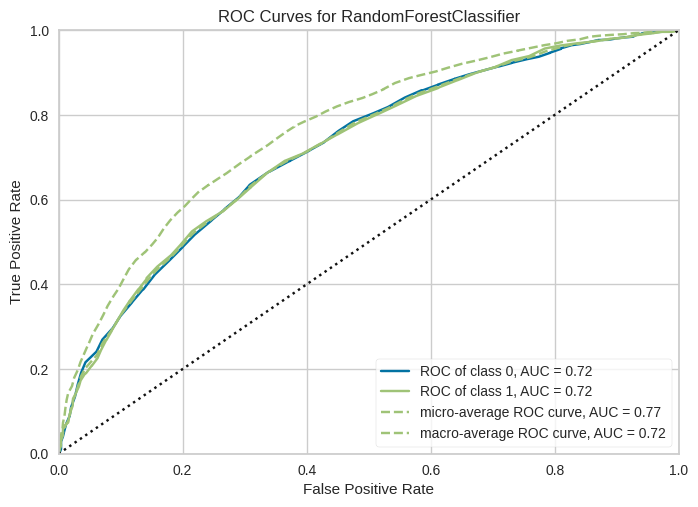

In [ ]:
plot_model( model_best, plot = 'auc')

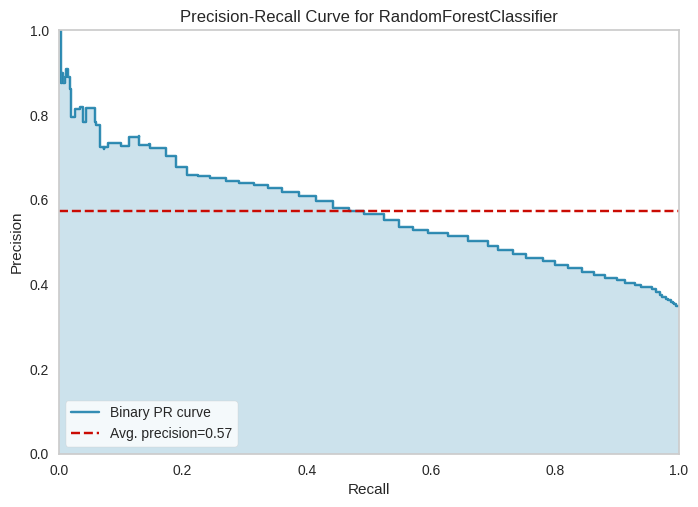

In [ ]:
plot_model(model_best, plot = 'pr')     # Precision-Recall Curve

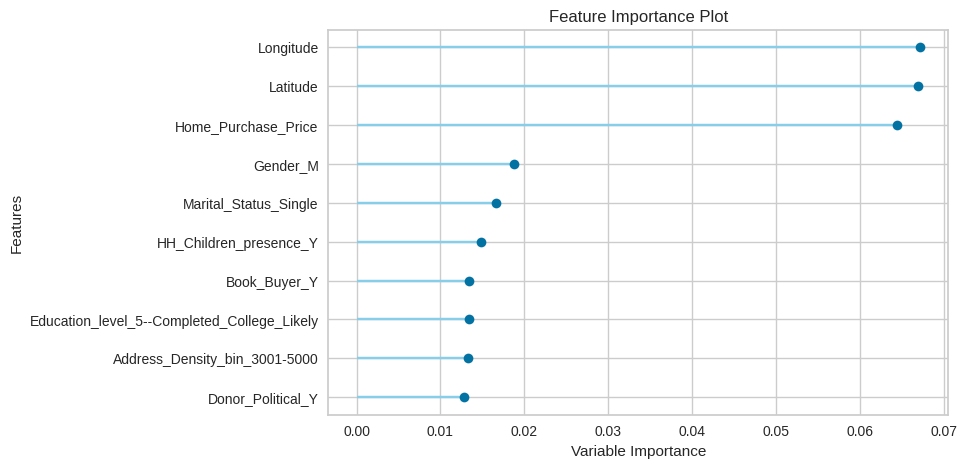

In [ ]:
plot_model(model_best, plot='feature')      # Feature Importance Plot

In [ ]:
#plot_model( model_best, plot = 'confusion_matrix')
# recall    = TP / (TP + FN)   Proportion of true positives that were identified correctly?
# precision = TP / (TP + FP)   Proportion of positive identifications was correct?

# EXPORT
lista de las columnas a exportar

In [ ]:
# column names present in both UNreg and REG X4 matrix
cols_export_in = [      'FirstName','MiddleName','LastName',
                        'City', 'Zip', 'County','Precinct','Latitude','Longitude',
                        'Gender','Ethnicity_broad','Religion','HH_Children_presence',
                        'Address_StreetName',                                               #'Address_HouseNumber','Address_ApartmentNum',
                        'Veteran',
                        'Home_Owner','Income_amount','Income_bin',
                        'Donor_Political'  ]


# column names present REG only X4 matrix
cols_export_in_reg =[   'LALVOTERID','Voters_StateVoterID','Union','Military_status',
                        'Voter_Frequency','Voter_Changed_Party','Voter_Active','Parties_Description',
                        'VotingPerformanceEvenYearGeneral','VotingPerformanceEvenYearPrimary',
                        'VotingPerformanceEvenYearGeneralAndPrimary','VotingPerformanceMinorElection',
                        'EarlyBallot_General_2020_11_03','EarlyBallot_Primary_2020_06_02','EarlyBallot_General_2018_11_06',   
                        'EarlyBallot_Primary_2018_05_08','Presidential_Primary_2020_06_02',  
                        'Presidential_Primary_2016_05_03','Presidential_Primary_2012_05_08']

# column names present UNreg only X4_unreg matrix
cols_export_in_unreg =[ 'Individual_ID' ]

# column names descriptions
dict_col_description = dict({
    'LALVOTERID' : 'id to pinpoint REG voters' ,
    'Individual_ID': 'id to pinpoint UNreg voters',
    'Source' : 'Dataset source and ' })                   


X4 hace match

y4_pred se hace sobre X4, y tiene 2 columnas extras: 'prediction_label', 'prediction_score'

In [ ]:
# ----------------------  REGISTERED NON-PARTISAN - PREDICT & EXPORT PREDICTION  -------------------------

print('-----   UN-REGISTERED   -----')

# predict NON-PARTISAN using model_best
y4_pred = predict_model( model_best , 
                         data = X4) [['prediction_label', 'prediction_score']]   # keeps only selected columns

# rename PREDICTION cols content
y4_pred = pd.concat([ y4_pred['prediction_label'].replace({1:'Democrat' , 0:'Republican'}).rename('Predicted_party'),
                      y4_pred.apply(lambda x: 1-x[1] if x[0]==0 else x[1], axis=1).rename('Predicted_probability_dem')], # 
                      axis=1)

# concatenate selected columns from X4 and y4_pred, matching index
exec('''df_export_reg = pd.concat([ {} [ {} + {} ].loc[X4.index],
                                y4_pred],
                                axis = 1)'''.format( name_matrix_reg, cols_export_in, cols_export_in_reg  )) # concat horizontally

# add new col with source
df_export_reg['Source'] = df_export_reg['Parties_Description'].copy()   

print('Exported a df with:  ' + str(len(df_export_reg.columns)) + ' columns', sep='',end='\n\n')
print(df_export_reg.columns.tolist(), sep='',end='' )



# ----------------------  UNREGISTERED - PREDICT & EXPORT PREDICTION  -------------------------

# predict UNregistered using model_best
y2_pred = predict_model( model_best, 
                         data = X4_unreg.dropna() ) [['prediction_label', 'prediction_score']]          # keeps only selected columns

# rename PREDICTION cols content
y2_pred = pd.concat([ y2_pred['prediction_label'].replace({1:'Democrat' , 0:'Republican'}).rename('Predicted_party'),
                      y2_pred.apply(lambda x: 1-x[1] if x[0]==0 else x[1], axis=1).rename('Predicted_probability_dem')],
                      axis=1)

# concatenate selected columns from X4 and y4_pred, matching index
exec('''df_export_unreg = pd.concat( [ {} [ {} + {} ].loc[ X4_unreg.dropna().index], 
                                y2_pred],
                                axis = 1)'''.format( name_matrix_unreg, cols_export_in, cols_export_in_unreg ))  # concat horizontally

# add new col with source
df_export_unreg['Source'] = df_export_unreg['Predicted_party']


# ----------------------  concat UNreg predicted + REG predicted   -------------------------

df_export = pd.concat([ df_export_unreg , df_export_reg], axis=0)  # concatenado verticalmente

df_export ['Source'] =  df_export  ['Source'].replace({
        'Republican'            :'REGISTERED_Republican',
        'Democratic'            :'REGISTERED_Democratic'})




#df_export.to_excel(   folder + date.today().strftime("%Y-%m-%d")+'_prediction_'+ district +'_reg+unreg.xlsx')
#files.download( df_export_reg )   # pops-up location o save

df_export.to_parquet( folder + date.today().strftime("%Y-%m-%d")+'_prediction_'+ district +'_reg+unreg.parquet',   # nombre del archivo
              compression='gzip') # None


#del( df_export_reg , df_export_unreg )

-----   UN-REGISTERED   -----


Exported a df with:  41 columns

['FirstName', 'MiddleName', 'LastName', 'City', 'Zip', 'County', 'Precinct', 'Latitude', 'Longitude', 'Gender', 'Ethnicity_broad', 'Religion', 'HH_Children_presence', 'Address_StreetName', 'Veteran', 'Home_Owner', 'Income_amount', 'Income_bin', 'Donor_Political', 'LALVOTERID', 'Voters_StateVoterID', 'Union', 'Military_status', 'Voter_Frequency', 'Voter_Changed_Party', 'Voter_Active', 'Parties_Description', 'VotingPerformanceEvenYearGeneral', 'VotingPerformanceEvenYearPrimary', 'VotingPerformanceEvenYearGeneralAndPrimary', 'VotingPerformanceMinorElection', 'EarlyBallot_General_2020_11_03', 'EarlyBallot_Primary_2020_06_02', 'EarlyBallot_General_2018_11_06', 'EarlyBallot_Primary_2018_05_08', 'Presidential_Primary_2020_06_02', 'Presidential_Primary_2016_05_03', 'Presidential_Primary_2012_05_08', 'Predicted_party', 'Predicted_probability_dem', 'Source']

In [ ]:
'Parties_Description' in X4.columns

False

In [ ]:
'Parties_Description' in census_in_lwz_reg.columns

True

In [ ]:
print('INPUTS:')
print('REG rows      : ', census_in_lwz_reg  .shape[0])
print('UNreg rows    : ', census_in_lwz_unreg.shape[0])
print ('\n', end='')						            # print single New line

print('OUTPUT:')
print('REG rows      : ', df_export_reg  .shape[0])
print('UNreg rows    : ', df_export_unreg.shape[0])
print('REG+UNreg rows: ', df_export      .shape[0])
print ('\n', end='')						            # print single New line

print('Exported a df with:  ' + str(len(df_export.columns)) + ' columns', sep='',end='\n\n')
print(df_export.columns.tolist(), sep='',end='' )

INPUTS:
REG rows      :  24076
UNreg rows    :  14296

OUTPUT:
REG rows      :  24076
UNreg rows    :  2845
REG+UNreg rows:  26921

Exported a df with:  41 columns

['FirstName', 'MiddleName', 'LastName', 'City', 'Zip', 'County', 'Precinct', 'Latitude', 'Longitude', 'Gender', 'Ethnicity_broad', 'Religion', 'HH_Children_presence', 'Address_StreetName', 'Veteran', 'Home_Owner', 'Income_amount', 'Income_bin', 'Donor_Political', 'Individual_ID', 'Predicted_party', 'Predicted_probability_dem', 'Source', 'LALVOTERID', 'Voters_StateVoterID', 'Union', 'Military_status', 'Voter_Frequency', 'Voter_Changed_Party', 'Voter_Active', 'VotingPerformanceEvenYearGeneral', 'VotingPerformanceEvenYearPrimary', 'VotingPerformanceEvenYearGeneralAndPrimary', 'VotingPerformanceMinorElection', 'EarlyBallot_General_2020_11_03', 'EarlyBallot_Primary_2020_06_02', 'EarlyBallot_General_2018_11_06', 'EarlyBallot_Primary_2018_05_08', 'Presidential_Primary_2020_06_02', 'Presidential_Primary_2016_05_03', 'Presidential_P

In [ ]:
df_export['Source'].value_counts(dropna=False)

REGISTERED_Republican    18121
Democratic                8273
Democrat                   527
Name: Source, dtype: int64

In [ ]:
# EXPORTING
df_export_unreg.to_excel  ( folder + date.today().strftime("%Y-%m-%d")+'_prediction_'+district+'_UNregistered.xlsx' )    # nombre del archivo
#files.download( df_export_unreg )   # pops-up location o save

df_export_unreg.to_parquet( folder + date.today().strftime("%Y-%m-%d")+'_prediction_'+district+'_UNregistered.parquet',  # nombre del archivo
              compression='gzip') 

del(df_export_unreg)



df_export_reg.to_excel(   folder + date.today().strftime("%Y-%m-%d")+'_prediction_'+ district +'_REGistered_NON-partisan.xlsx')
#files.download( df_export_reg )   # pops-up location o save

df_export_reg.to_parquet( folder + date.today().strftime("%Y-%m-%d")+'_prediction_'+ district +'_REGistered_NON-partisan.parquet',   # nombre del archivo
              compression='gzip') # None

del(df_export_reg)

Description for Exported col

To provide insight on the column for the platform user.

In [ ]:
dict_descritio exort:



## bar plot

In [ ]:
print(len(y2_pred))
print(len(y4_pred))
print(len(decile))

NameError: ignored

In [ ]:
pd.qcut(decile['Predicted_probability'],10)     # histogram spread over 10 bins (auto edges)

In [ ]:
decile = pd.concat([y2_pred , y4_pred], axis=0)         # stacked vertical
print(decile['Predicted_probability'] .value_counts() )

In [ ]:
decile.info

In [ ]:
# Make a random dataset:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

In [ ]:
print(list (range(18, 106, 1) ))

In [ ]:
# BIN for age is 1 year bin-width, for others is sqrt of n, rounded
#bins= [0,10,20,30,40,50,60,70,80,90]
 
plt.hist( y4_pred['Predicted_probability'] ,   histtype='barstacked', density = False, bins= 10, color='grey', alpha = 1 )

In [ ]:
# EstHomeValue
y4_pred['Predicted_probability_bin'] = pd.cut(  y4_pred['Predicted_probability'],
    bins    = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]  ,
    labels  = ['0 to 9.9%','10 to 19.9%', '20 to 29.9%','30 to 39.9%','40 to 49.9%',
               '50 to 59.9%','60 to 69.9%','70 to 79.9%','80 to 89.9%','90 to 100%'],
    right   = False,
    ordered = True )      # bins [1, 2, 3] indicate (1,2], (2,3], 


In [ ]:
y4_pred[['Predicted_probability_bin']].value_counts()

In [ ]:
ax = sns.countplot(data= y4_pred['Predicted_probability_bin'],
                   x='age_group')
ax.tick_params(axis='x', labelrotation=90)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()

## report

In [ ]:
# 1. Set up the PDF doc basics
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)

# 2. Layout the PDF doc contents
## Title
pdf.cell(40, 10, 'Daily S&P 500 prices report')
## Line breaks
pdf.ln(20)
## Image
pdf.image('chart.png')
## Line breaks
pdf.ln(20)
## Show table of historical data
### Transform the DataFrame to include index of Date
sp500_history_pdf = sp500_history.reset_index()
### Transform the Date column as str dtype
sp500_history_pdf['Date'] = sp500_history_pdf['Date'].astype(str)
### Round the numeric columns to 2 decimals
numeric_cols = sp500_history_pdf.select_dtypes(include='number').columns
sp500_history_pdf[numeric_cols] = sp500_history_pdf[numeric_cols].round(2)
### Use the function defined earlier to print the DataFrame as a table on the PDF 
output_df_to_pdf(pdf, sp500_history_pdf.tail(3))
## Line breaks
pdf.ln(20)
## Show table of historical summary data
sp500_history_summary_pdf = sp500_history_summary.reset_index()
numeric_cols = sp500_history_summary_pdf.select_dtypes(include='number').columns
sp500_history_summary_pdf[numeric_cols] = sp500_history_summary_pdf[numeric_cols].round(2)

output_df_to_pdf(pdf, sp500_history_summary_pdf)
# 3. Output the PDF file
pdf.output('fpdf_pdf_report.pdf', 'F')

**report** docx

If cells are re runned, they get written again.

In [ ]:
%%capture
!pip install python-docx
import docx
from docx import Document
from docx.shared import Inches      # resize pictures

In [ ]:
doc = Document(r'/content/g/MyDrive/COLFAX/py-template.docx')      # load file as template
doc.add_heading('Report COLFAX prediction', 0)                     # tis is already in the template
doc.add_paragraph( date.today().strftime("%Y-%m-%d") )


In [ ]:
doc.add_heading( district , level=1)
doc.add_paragraph( 'Columns loaded in the model:' )

list_1 = [str(element) for element in matrix_loaded_cols] # 01. convert each element into a string
list_2 = "\', \'".join(list_1) # 02. join them 
doc.add_paragraph( list_2, style='Coding' )

In [ ]:

list_1 = [str(element) for element in list_census_pairs] # 01. convert each element into a string
list_2 = ",".join(list_1) # 02. join them 
doc.add_paragraph( list_2 , style='Coding' )

In [ ]:
doc.add_picture( r'/content/g/MyDrive/COLFAX/2022-08_Boone_better_IN_update/_decile_2022-08-15.png',
                 width=Inches(5.0)) 

In [ ]:
doc.save( folder + 
         'report_' + district.upper() +'_'+ date.today().strftime("%Y-%m-%d") + '.docx')

In [ ]:

#document = Document()                           # create empty file
#document.add_picture('brand_logo.png', width = Inches(1))
    
doc.add_heading('Report COLFAX prediction', 0)      # no style with TITLE

p = doc.add_paragraph('A plain paragraph having some ')
p.add_run('bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

document.add_heading('Heading, level 1', level=1)

#document.add_picture('write-word-using-python.jpg', width=Inches(1.25))
folder = r'/content/g/MyDrive/COLFAX/2022-08_Boone_better_IN_update/'

document.add_page_break()

document.save('testing_report.docx')

# SHAPES

library to plot: https://jcutrer.com/python/learn-geopandas-plotting-usmaps

In [ ]:
%%capture
# MAP LIBRARIES
!pip install geopandas
import geopandas as gpd                             # load the shape file

In [ ]:
## ---------------------------------- IMPORT SHAPE DATA  --------------------------------------------
# ZIP with the 4 files: (shp prj dbf shx) and IDENTICAL namefile

## INDIANA 50 SENATE DISTRICTS
zip_shape = 'zip://' + folder +  '2021-10_senate_dist/SHAPE_Senate-adopted-oct-01-2021.zip'
#zip_shape = 'zip:///content/g/MyDrive/COLFAX/2021-10_senate_dist/SHAPE_Senate-proposed-sep-21-2021.zip'    # absolute path
gpd_districts_50 = gpd.read_file( zip_shape )                           # load SHAPE FILE as GeoDataFrame
gpd_districts_50 .drop(columns=['DISTRICTN','ID'], errors='ignore', inplace=True )

## INDIANA 5,321 PRECINCTS
zip_shape = 'zip://' + folder + '2021-10_senate_dist/SHAPE_Voting_Districts_2010_USCB_IN.zip'
gpd_precincts_in = gpd.read_file( zip_shape )  # load SHAPE FILE as GeoDataFrame   
gpd_precincts_in .drop(columns=['COUNTYFP10','VTDST10','GEOID10','VTDI10','NAMELSAD10',
                                'LSAD10','MTFCC10','FUNCSTAT10','ALAND10','AWATER10'], errors='ignore',inplace=True )
gpd_precincts_in['NAME10'] = gpd_precincts_in['NAME10'].apply(str)      # convert elements to srt

del( zip_shape )

gpd_precincts_in.head(3)        # display to check if working

,NAME10,geometry
0,CASS 1,"POLYGON ((469511.634 4325222.611, 469707.987 4..."
1,CASS 2,"POLYGON ((469535.646 4329451.331, 469855.421 4..."
2,CURRY 1,"POLYGON ((466031.136 4345188.963, 466102.235 4..."


In [ ]:
## ---------------------------------- IMPORT PREDICITIONS  --------------------------------------------

pred_in_lwz_reg = pd.read_parquet( folder + r'2023-05-19_prediction_in_lwz_REGistered_NON-partisan.parquet',
               engine='pyarrow')        # engine uses a c-library

pred_in_lwz_unreg = pd.read_parquet( folder + r'2023-05-19_prediction_in_lwz_UNregistered.parquet',
               engine='pyarrow')        # engine uses a c-library

In [ ]:
pred_in_lwz_reg.columns

Index(['FirstName', 'MiddleName', 'LastName', 'City', 'Zip', 'County',
       'Precinct', 'Gender', 'Ethnicity_broad', 'Religion',
       'HH_Children_presence', 'Address_StreetName', 'Veteran', 'Home_Owner',
       'Income_amount', 'Income_bin', 'Donor_Political', 'LALVOTERID',
       'Voters_StateVoterID', 'Union', 'Military_status', 'Voter_Frequency',
       'Voter_Changed_Party', 'Voter_Active',
       'VotingPerformanceEvenYearGeneral', 'VotingPerformanceEvenYearPrimary',
       'VotingPerformanceEvenYearGeneralAndPrimary',
       'VotingPerformanceMinorElection', 'EarlyBallot_General_2020_11_03',
       'EarlyBallot_Primary_2020_06_02', 'EarlyBallot_General_2018_11_06',
       'EarlyBallot_Primary_2018_05_08', 'Presidential_Primary_2020_06_02',
       'Presidential_Primary_2016_05_03', 'Presidential_Primary_2012_05_08',
       'Predicted_party', 'Predicted_probability_dem'],
      dtype='object')

In [ ]:
pred_in_lwz_unreg.columns

Index(['FirstName', 'MiddleName', 'LastName', 'City', 'Zip', 'County',
       'Precinct', 'Gender', 'Ethnicity_broad', 'Religion',
       'HH_Children_presence', 'Address_StreetName', 'Veteran', 'Home_Owner',
       'Income_amount', 'Income_bin', 'Donor_Political', 'Individual_ID',
       'Predicted_party', 'Predicted_probability_dem'],
      dtype='object')

In [ ]:
pred_in_lwz_unreg[['Income_bin']].value_counts(dropna=False) 

Income_bin
$100-$149K    596
u             464
over_$250K    368
$50-$74K      353
$75-$99K      353
$200-$249K    166
$175-$199K    152
$35-$49K      150
$150-$174K    117
$25-$34K       59
$15-$24K       37
$1-$14K        30
dtype: int64

PERO OJO ACÁ DEBERIA MOSTRAR A TODOS, NO SOLO A LOS NON PARTISAN

In [ ]:
## ---------------------------------- INCOME  --------------------------------------------

In [ ]:
pred_in_lwz_unreg['Income_bin'] = pred_in_lwz_unreg['Income_bin'].replace({
'$1-$14K': 7500, 
'$15-$24K': 20000,
'$25-$34K': 30000,
'$35-$49K': 42500,
'$50-$74K': 62000,
'$75-$99K':87500,
'$100-$149K': 125000,           
'$150-$174K':162500,
'$175-$199K':187500,
'$200-$249K':225000,
'over_$250K': 250000  })  # 'u':              

In [ ]:



# APPEND row at the end with income
df_senate_old_income = df_senate_old_income.append(pd.DataFrame(
    [[8500,20000,30000,42500,62500,87500,125000,137500,162500,187500,225000,300000
    ]], columns=df_senate_old_income.columns), ignore_index=True)

# col with SUM of each row
df_senate_old_income ['TOTAL_PEOPLE'] = df_senate_old_income.sum(axis=1)

display(df_senate_old_income.head(2))


%%script false 
# working for 1
#df['column'].round(decimals= 2 )            	# round display of data

i = 0
result0 = ( df_senate_old_income.iloc[ 0 ] * df_senate_old_income.iloc[ 50 ] ).sum() / df_senate_old_income.iloc[ 0 ]['TOTAL_PEOPLE']
result1 = ( df_senate_old_income.iloc[ 1 ] * df_senate_old_income.iloc[ 50 ] ).sum() / df_senate_old_income.iloc[ 1 ]['TOTAL_PEOPLE']
result2 = ( df_senate_old_income.iloc[ 2 ] * df_senate_old_income.iloc[ 50 ] ).sum() / df_senate_old_income.iloc[ 2 ]['TOTAL_PEOPLE']
print(result0, result1, result2)

print ( (df_senate_old_income.iloc[ 0 ] * df_senate_old_income.iloc[ 50 ]).sum() )
print ( df_senate_old_income.iloc[ 0 ]['TOTAL_PEOPLE'] )

print ( (df_senate_old_income.iloc[ 0 ] * df_senate_old_income.iloc[ 50 ]).sum() / df_senate_old_income.iloc[ 0 ]['TOTAL_PEOPLE'] )

df_senate_old_income.at[ 0 , 'INCOME_AVG'] = int( ( df_senate_old_income.iloc[ 0  ] *
                                                        df_senate_old_income.iloc[ 50 ]   ).sum() / 
                                                        df_senate_old_income.iloc[ 0  ]['TOTAL_PEOPLE'] )

print( df_senate_old_income.loc[ 0 , 'INCOME_AVG'] )
%%script false 

# loop
df_senate_old_income['INCOME_AVG'] = ''

for i in range(0,50) :
    df_senate_old_income.at[ i , 'INCOME_AVG'] = int( ( df_senate_old_income.iloc[ i  ] * df_senate_old_income.iloc[ 50 ]   ).sum() / df_senate_old_income.iloc[ i  ]['TOTAL_PEOPLE'] )
display(df_senate_old_income.head(2))

%%script false 
# LOAD JSON

# https://plotly.com/python/choropleth-maps/



counties["features"][0]

%%script false 


In [ ]:
# PLOT
fig = px.choropleth_mapbox(df,
                           geojson = counties,
                           locations='fips',
                           color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 10),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 39.7684, "lon": -86.1581},  # INDINAPOLIS
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

NameError: ignored

## old

In [ ]:
%%capture
# MAP LIBRARIES
!pip install geopandas
import geopandas as gpd                             # load the shape file
from shapely.geometry import Point                  # to create points objects like centroids
from shapely.geometry import Polygon                # to create polygon objects from list of coordinates
!pip install contextily                             # to load map overlay for geopandas
import contextily as ctx

In [ ]:
# # ------------------------------  SHAPE DATA  ----------------------------------------
# ZIP with the 4 files: (shp prj dbf shx) and IDENTICAL namefile

## INDIANA 50 SENATE DISTRICTS
zip_shape = 'zip:///content/g/MyDrive/COLFAX/2021-10_senate_dist/SHAPE_Senate-adopted-oct-01-2021.zip'
#zip_shape = 'zip:///content/g/MyDrive/COLFAX/2021-10_senate_dist/SHAPE_Senate-proposed-sep-21-2021.zip' 
gpd_districts_50 = gpd.read_file( zip_shape )                           # load SHAPE FILE as GeoDataFrame
gpd_districts_50 .drop(columns=['DISTRICTN','ID'], errors='ignore',inplace=True )

## FORT WAYNE 3 SENATE DISTRICTS
#zip_shape = 'zip:///content/g/MyDrive/COLFAX/2021-10_senate_dist/SHAPE_Fort_Wayne_District_DG.zip'
#gpd_districts_fw = gpd.read_file( zip_shape )  # load SHAPE FILE as GeoDataFrame   
#gpd_districts_fw .drop(columns=['DISTRICTN','ID'], errors='ignore',inplace=True )

## INDIANA 5,321 PRECINCTS
zip_shape = 'zip:///content/g/MyDrive/COLFAX/2021-10_senate_dist/SHAPE_Voting_Districts_2010_USCB_IN.zip'
gpd_precincts_in = gpd.read_file( zip_shape )  # load SHAPE FILE as GeoDataFrame   
gpd_precincts_in .drop(columns=['COUNTYFP10','VTDST10','GEOID10','VTDI10','NAMELSAD10',
                                'LSAD10','MTFCC10','FUNCSTAT10','ALAND10','AWATER10'], errors='ignore',inplace=True )
gpd_precincts_in['NAME10'] = gpd_precincts_in['NAME10'].apply(str)      # convert elements to srt

del( zip_shape )

gpd_precincts_in.head(3)        # display to check if working

,NAME10,geometry
0,CASS 1,"POLYGON ((469511.634 4325222.611, 469707.987 4..."
1,CASS 2,"POLYGON ((469535.646 4329451.331, 469855.421 4..."


In [ ]:
# CENTROID for labels and CRS to 3857

def centroid ( geopanda ) :
    print('CRS input:  ', geopanda .crs)   # initial CRS
    # print(geopanda['geometry'][0])
    # set CRS to EPSG:3857, used to render in Google Maps. In meters
    geopanda .to_crs(epsg=3857, inplace=True)   
    geopanda['centroid'] = geopanda['geometry'].centroid   # new col with centroid
    print('CRS output: ', geopanda .crs)   # CRS changed
    # print(geopanda['geometry'][0])
    print('\n', end='')
    # return geopanda

In [ ]:
centroid( gpd_districts_50 )
#centroid( gpd_districts_fw )
centroid( gpd_precincts_in )

CRS input:   EPSG:4269
CRS output:  EPSG:3857

CRS input:   EPSG:26916
CRS output:  EPSG:3857



In [ ]:
## FORT WAYNE 3 SENATE DISTRICTS
# reindex to make smaller areas above
gpd_districts_fw = gpd_districts_fw.reindex([1,0,2])  
gpd_districts_fw .head()  #display

NameError: ignored

In [ ]:
# MOVE CENTROID FOR LABELS: manually move it

# <class 'shapely.geometry.point.Point'>
# set [ row , column ] = Point(2.2, 4.2)
gpd_districts_50 .at[ 2,'centroid']= Point(-9720184.457930811 , 5104656.610463683) 
gpd_districts_50 .at[11,'centroid']= Point(-9552521.548886595 , 5098487.691406006) 
gpd_districts_50 .at[13,'centroid']= Point(-9455967.143413564 , 5064685.105496083) 
gpd_districts_50 .at[23,'centroid']= Point(-9664000.231341127 , 4818170.369986361) 
gpd_districts_50 .at[26,'centroid']= Point(-9465303.208192160 , 4843444.598494478) 
gpd_districts_50 .at[40,'centroid']= Point(-9566627.484561030 , 4750825.340417212) 
gpd_districts_50 .at[42,'centroid']= Point(-9497051.652969377 , 4693965.083513273) 
gpd_districts_50 .at[46,'centroid']= Point(-9582869.457837526 , 4615293.030758833) 
gpd_districts_50 .at[47,'centroid']= Point(-9665440.799685651 , 4613965.083513273)  

## MAPS

library to plot:   https://jcutrer.com/python/learn-geopandas-plotting-usmaps

## aggregated stuff

In [ ]:
%%script false 
# LOAD FILES with average per district

df_senate_old = pd.read_excel(r'/content/Gdr/MyDrive/Colfax_DG_CO_DW/2021-10_Districts/Old State Senate districts.xlsx')
df_senate_old.head()
#print(df_senate_old.columns)

df_senate_new = pd.read_excel(r'/content/Gdr/MyDrive/Colfax_DG_CO_DW/2021-10_Districts/Senate Districts for reports.xlsx')
# df_senate_new.head()

In [ ]:
%%script false 

# INCOME AVERAGE per district
# easer to handle data in a only-income df
income_col = [  
    '$1,000-$14,999 (Estimated Income Range)','$15,000-$24,999 (Estimated Income Range)',
    '$25,000-$34,999 (Estimated Income Range)','$35,000-$49,999 (Estimated Income Range)',
    '$50,000-$74,999 (Estimated Income Range)','$75,000-$99,999 (Estimated Income Range)',
    '$100,000-$124,999 (Estimated Income Range)','$125,000-$149,999 (Estimated Income Range)',
    '$150,000-$174,999 (Estimated Income Range)','$175,000-$199,999 (Estimated Income Range)',
    '$200,000-$249,999 (Estimated Income Range)','$250,000 and up (Estimated Income Range)'
    ] # 12 cols. Unknow was excludded

df_senate_old_income = df_senate_old[ income_col ].copy()   # new df with just income
df_senate_old_income.index.name = '#'                       # add name ton index column

# rename adding the average of the class
df_senate_old_income.rename(columns={
    '$1,000-$14,999 (Estimated Income Range)' :     8500,
    '$15,000-$24,999 (Estimated Income Range)':    20000,
    '$25,000-$34,999 (Estimated Income Range)':    30000,
    '$35,000-$49,999 (Estimated Income Range)':    42500,
    '$50,000-$74,999 (Estimated Income Range)':    62500,
    '$75,000-$99,999 (Estimated Income Range)':    87500,
    '$100,000-$124,999 (Estimated Income Range)': 125000,
    '$125,000-$149,999 (Estimated Income Range)': 137500,
    '$150,000-$174,999 (Estimated Income Range)': 162500,
    '$175,000-$199,999 (Estimated Income Range)': 187500,
    '$200,000-$249,999 (Estimated Income Range)': 225000,
    '$250,000 and up (Estimated Income Range)':   300000,
    }, inplace=True)     # rename col inplace

# APPEND row at the end with income
df_senate_old_income = df_senate_old_income.append(pd.DataFrame(
    [[8500,20000,30000,42500,62500,87500,125000,137500,162500,187500,225000,300000
    ]], columns=df_senate_old_income.columns), ignore_index=True)

# col with SUM of each row
df_senate_old_income ['TOTAL_PEOPLE'] = df_senate_old_income.sum(axis=1)

display(df_senate_old_income.head(2))
df_senate_old_income.to_csv(r'/GDRIVE/MyDrive/Colfax_DG_CO_DW/2021-10_Districts/income.csv', index = True, header=True)              # to include index remove index=False
# display(df_senate_old_income)

In [ ]:
%%script false 
# working for 1
#df['column'].round(decimals= 2 )            	# round display of data

i = 0
result0 = ( df_senate_old_income.iloc[ 0 ] * df_senate_old_income.iloc[ 50 ] ).sum() / df_senate_old_income.iloc[ 0 ]['TOTAL_PEOPLE']
result1 = ( df_senate_old_income.iloc[ 1 ] * df_senate_old_income.iloc[ 50 ] ).sum() / df_senate_old_income.iloc[ 1 ]['TOTAL_PEOPLE']
result2 = ( df_senate_old_income.iloc[ 2 ] * df_senate_old_income.iloc[ 50 ] ).sum() / df_senate_old_income.iloc[ 2 ]['TOTAL_PEOPLE']
print(result0, result1, result2)

print ( (df_senate_old_income.iloc[ 0 ] * df_senate_old_income.iloc[ 50 ]).sum() )
print ( df_senate_old_income.iloc[ 0 ]['TOTAL_PEOPLE'] )

print ( (df_senate_old_income.iloc[ 0 ] * df_senate_old_income.iloc[ 50 ]).sum() / df_senate_old_income.iloc[ 0 ]['TOTAL_PEOPLE'] )

df_senate_old_income.at[ 0 , 'INCOME_AVG'] = int( ( df_senate_old_income.iloc[ 0  ] *
                                                        df_senate_old_income.iloc[ 50 ]   ).sum() / 
                                                        df_senate_old_income.iloc[ 0  ]['TOTAL_PEOPLE'] )

print( df_senate_old_income.loc[ 0 , 'INCOME_AVG'] )

In [ ]:
%%script false 

# loop
df_senate_old_income['INCOME_AVG'] = ''

for i in range(0,50) :
    df_senate_old_income.at[ i , 'INCOME_AVG'] = int( ( df_senate_old_income.iloc[ i  ] * df_senate_old_income.iloc[ 50 ]   ).sum() / df_senate_old_income.iloc[ i  ]['TOTAL_PEOPLE'] )
display(df_senate_old_income.head(2))

In [ ]:
%%script false 

# ECUACION

districts['income_avg'] = ''

districts.at[ 0 ,'income_avg'] = df_senate_old.loc[ 0 ]['$1,000-$14,999 (Estimated Income Range)'] * (1000 * 14999/2)

# total = 
print ( df_senate_old.loc[ 0 ]['$1,000-$14,999 (Estimated Income Range)'] )
print ( districts.loc[ 0 ] )


In [ ]:
# APPEND row at the end with income from excel
income = pd.DataFrame( {'income':[
    93387,58214,59694,88687,95083,106612,80537,79012,83611,61551,92784,84010,
    77131,82441,79497,88279,71901,69852,71550,128268,77026,93576,84108,104653,
    57214,80599,71089,87630,124071,121810,125808,81975,67128,54182,73712,
    77308,96528,69716,69935,90121,87198,74246,79376,80506,78879,82390,72416,
    78002,81838,89251]})       

# APPEND col at the end with income
gpd_districts_50 = gpd_districts_50.join(income)
gpd_districts_50.head(2)

## IN_50 senate colored

In [ ]:
# PLOT # GeoDataFrame.plot()
fig, ax = plt.subplots(1, figsize = (12,12))  # single plot in subplot

# edges for color bar
vmin = gpd_districts_50['income'].min()
vmax = gpd_districts_50['income'].max()

#plot
gpd_districts_50.plot(ax=ax, cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax), 
               edgecolor = 'black', column = 'income',
               alpha =0.5, figsize = (8,8))  # usese unique ID to colormap

ax.set_title(   'INDIANA - senate districts\ncolored by income from census 2020',   fontsize=18)
ax.set_xlabel(  'Latitude',  fontsize=16)
ax.set_ylabel(  'Longitude', fontsize=16)

# after plotting the data, format the axis numbers
ax.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax.get_xticks()
ax.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# place text for districts
gpd_districts_50.apply(lambda x: ax.annotate(xy = x.geometry.centroid.coords[0],
                                             s= x.DISTRICT, ha='center', fontsize=8), axis=1)

# base map
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.20, location='lower right')  # SCALE BAR
ax.add_artist(scalebar) # must run together with scalebar
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # base map

# color bar
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
#cbar = fig.colorbar(sm , label='Income')
cbar = fig.colorbar(sm).set_label(label='Income',size=15,weight='bold')

plt.tight_layout() 
# plt.savefig('income.png', dpi=800)  # export
plt.show()

## CHOROPLETH

In [ ]:
%%script false 
# LOAD JSON

# https://plotly.com/python/choropleth-maps/

# load json from Gdrive
geo_states = json.load(open('/content/gdrive/MyDrive/Colab Notebooks/TDI_capstone/gz_2010_us_040_00_500k.json', 'r'))

# load JSON rom github
from urllib.request import urlopen
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

counties["features"][0]

NameError: ignored

In [ ]:
# load DF Unemployement in FIPS

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})
df.head()

In [ ]:
%%script false 
# PLOT
fig = px.choropleth_mapbox(df,
                           geojson = counties,
                           locations='fips',
                           color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 10),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 39.7684, "lon": -86.1581},  # INDINAPOLIS
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

CalledProcessError: ignored

## density plot


In [ ]:
#  scatter geo

import json
import plotly.graph_objects as go


df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

# input parameter
df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()  # plotly.graph_objects

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace( go.Scattergeo (
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

In [ ]:
# DENSITY MAPBOX

import plotly.express as px                 # not using it currently
fig = px.density_mapbox( gpd_districts_fw , lat='Latitude',lon='Longitude', z='EstimatedIncomeAmount',
                        center = dict(lat=41.0793, lon=85.1394 ),   # FORT WAYNE 41.0793° N, 85.1394° W
                        radius = 30,
                        zoom = 5,
                        hover_name = 'EstimatedIncomeAmount', 
                        mapbox_style = 'open-street-map', # mandatory but free
                        title= 'Fort Wayne: Population density colored by income')

fig.show()  

https://plotly.com/python/mapbox-layers/

In [ ]:
# scatter_mapbox

fig = px.scatter_mapbox( gpd_districts_fw , lat='Latitude', lon='Longitude', hover_name='EstimatedIncomeAmount', hover_data=['EstimatedIncomeAmount','Parties_Description'],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300, )
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()




# PRECINCTS

Fort Wayne metropolitan area consists ofcounties (FIPS): Allen (18003), Wells (18179), and Whitley (18183). Combined population of 419,453 as of 2011. 

Federal Information Processing System (FIPS) Codes are five-digit codes assigned to each U.S. county. 
All indiana cuanties starte with 18, so the 3 last digits specificy the county within indiana)# pl
List of FIPS:
https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013697



In [ ]:
# plot all Inidana PRECINCTS ove the fort wayne area

# OVERLAY
fig, ax = plt.subplots(1, figsize = (10,10))  # single plot in subplot

# 1ST LAYER
## processing FORT WAYNE census data

gpd_precincts_in.plot(ax = ax, color='grey', edgecolor = 'black',
               figsize = (14,14), alpha = 0.2) 	# ax2: second panel
ax.set_title ('INDIANA -- all precincts', fontsize=18)
ax.set_xlabel('Latitude', fontsize=16)
ax.set_ylabel('Longitude', fontsize=16)

# set area equal to panel 1
# ax.set_xlim([ -9500000 , -9450000 ])		# set limits
# ax.set_ylim([  5005000 ,  5039000 ])
# ax.set_aspect('equal', adjustable='box')

# 2ND LAYER (on top)
# gpd_districts_fw.plot(ax = ax, figsize = (14,14), color='None', edgecolor = ['blue','black','red'], linewidth=3, alpha=0.8 ) #

# after plotting the data, format the axis numbers
ax.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax.get_xticks()
ax.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# place text for districts
#gpd_precincts_in.apply(lambda x: ax.annotate(xy = x.geometry.centroid.coords[0],
#        s= x.NAME10, ha='center', fontsize=6), axis=1)

# SCALE BAR
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.25, location='lower right')  # SCALE BAR
ax.add_artist(scalebar) # must run together with scalebar

# base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  
#plt.savefig('income.pdf', dpi=1200, bbox_inches='tight', pad_inches = 0)  # export 
plt.tight_layout() 
plt.show()

In [ ]:
# print common end exclusive precincts
func_compare ( gpd_precincts_in['NAME10'] , census_wayne_reg['Precinct'])

## print precis looking for

In [ ]:
# have to plot lat -long
list_precincts_examine = ['373', 'OSSIAN E', '590', '690', 'NEW HAVEN 1', 'NEW HAVEN 3A', '505', '594', '675', 'NEW HAVEN 5E', '200', '294',
                          'JAMESTOWN 1', '596', '262', 'NEW HAVEN 4B', 'NEW HAVEN 4A', '212', 'NEW HAVEN 5C', '216', 'HUNTERTOWN C',
                          'NEW HAVEN 5A', '592', 'SMITH S', 'NEW HAVEN 1SJ', 'NEW HAVEN 5B', '692', '197'] # , 'nan' excluded

In [ ]:
# check dtype changed to str
# print( census_wayne_reg ['Precinct'].dtype   )             # not sure if working
print( census_wayne_reg ['Precinct'].value_counts() )
print(  '\n', end='' )
print( census_wayne_reg ['Precinct'].value_counts().index )
print(  '\n', end='' )
print( census_wayne_reg ['Precinct'][0:10])
print( '\'WASHINGTON F\'' in census_wayne_reg ['Precinct'] )
print( 'WASHINGTON F'     in census_wayne_reg ['Precinct'] )

In [ ]:
# converting to string or adding flanking quotes
census_wayne_reg ['Precinct']= census_wayne_reg ['Precinct'] .astype(str)   # convert data type -- move to content later
# census_wayne_reg ['Precinct']= census_wayne_reg ['Precinct'] .apply(str)    # alternative way
# census_wayne_reg.update('\'' + census_wayne_reg ['Precinct'].astype(str) + '\'')


In [ ]:
# check dtype changed to str
# print( census_wayne_reg ['Precinct'].dtype   )             # not sure if working
print( census_wayne_reg ['Precinct'].value_counts() )
print(  '\n', end='' )
print( census_wayne_reg ['Precinct'].value_counts().index )
print(  '\n', end='' )
print( census_wayne_reg ['Precinct'][0:10])
print( '\'DECATUR 1\'' in census_wayne_reg ['Precinct'] )
print( 'DECATUR 1'     in census_wayne_reg ['Precinct'] )

In [ ]:
print( list(enumerate(list_precincts_examine) ))
lists = list(enumerate(list_precincts_examine) )
print(lists[0][1])

In [ ]:
for i in enumerate(list_precincts_examine) :
        print(str(i[1]))

In [ ]:
print(i[0] , type(i[0]) )

In [ ]:

# intitilize GPD to store
gpd_precincts_examine =gpd.GeoDataFrame(data=None, geometry=None, crs=None)

for i in enumerate(list_precincts_examine) :
    # print(i[1] , type(i[1]) )
    # extract Lat Long for each precinct
    lat_point_list = census_wayne_reg['Latitude']  .loc[census_wayne_reg['Precinct'] == i[1] ].values.tolist()                      
    lon_point_list = census_wayne_reg['Longitude'] .loc[census_wayne_reg['Precinct'] == i[1] ].values.tolist()

    # convert list of Lat Long to polygon object
    polygon_geom = Polygon(zip( lon_point_list , lat_point_list ))
    polygon = gpd.GeoDataFrame(index=[ i ], crs='epsg:4326', geometry=[polygon_geom])       
    gpd_precincts_examine = gpd_precincts_examine.append(polygon)
print(polygon.geometry)

In [ ]:
# delete me n =1

# intitilize GPD to store
gpd_precincts_examine =gpd.GeoDataFrame(data=None, geometry=None, crs=None)
list_precincts_examine = ['373','590','690'] # 'OSSIAN E'

for i in enumerate(list_precincts_examine) :
    # extract Lat Long for each precinct
    print(i[1])
    lat_point_list = census_wayne_reg['Latitude']  .loc[census_wayne_reg['Precinct'] == i[1] ].values.tolist()                      
    lon_point_list = census_wayne_reg['Longitude'] .loc[census_wayne_reg['Precinct'] == i[1] ].values.tolist()

    # convert list of Lat Long to polygon object
    polygon_geom = Polygon( zip( lon_point_list , lat_point_list ))
    polygon = gpd.GeoDataFrame(index=[ i ], crs='epsg:4326', geometry=[polygon_geom])       
    gpd_precincts_examine = gpd_precincts_examine.append(polygon)

display(gpd_precincts_examine)

In [ ]:
display( lat_point_list = census_wayne_reg['Latitude']  .loc[census_wayne_reg['Precinct'] == 'NEW HAVEN 1'].values.tolist()    )

In [ ]:
'590' in census_wayne_reg['Precinct']

In [ ]:
census_wayne_reg['Precinct'].value_counts()

In [ ]:
# districts.iloc[41]['geometry']

CENSUS Fort Wayne 2020 statistics

In [ ]:
# CSV contains 117,857 total cells. 
# CITIES: 'FORT WAYNE CITY' (111,345) 'NaN' 'NEW HAVEN CITY','DECATUR CITY','COLUMBUS CITY','AUBURN CITY'

print( census_wayne_reg['City'].value_counts() )
#df_wayne_reg.drop(df_wayne_reg[df_wayne_reg['City'] != 'FORT WAYNE CITY'].index, errors='ignore', inplace = True)   # drop by condition

In [ ]:
# ONLY COMMON elements (136 precincts)
list_precincts_fw = ['575', '656', '306', '207', '211', '509', '654', '189', '210', '260', '292', '291', '663',
    '582', '270', '670', '516', '185', '169', '314', '315', '579', '318', '255', '316', '454',
    '577', '503', '679', '309', '669', '166', '519', '554', '184', '289', '307', '678', '364',
    '204', '459', '557', '411', '585', '175', '607', '205', '612', '658', '368', '565', '410',
    '319', '672', '418', '170', '195', '168', '156', '667', '662', '651', '583', '174', '178',
    '162', '188', '460', '608', '304', '652', '567', '209', '581', '674', '213', '518', '311',
    '172', '163', '183', '203', '682', '502', '297', '367', '415', '603', '158', '303', '180',
    '194', '610', '298', '671', '553', '504', '569', '218', '605', '313', '179', '677', '152',
    '660', '153', '217', '555', '578', '293', '290', '310', '322', '576', '665', '512', '653',
    '154', '214', '602', '151', '312', '186', '261', '366', '452', '457', '561', '296', '257',
    '456', '668', '327', '157', '177', '164']
print('list_precincts_fw  :         ',len(list_precincts_fw))

list_precincts_extra =['WASHINGTON F','WASHINGTON E', 'WAYNE D','580', '453', '455','458','WAYNE C',
    '461', 'PLEASANT B','PLEASANT C','MARION C', 'ADAMS G', 'ADAMS K','673','563','562', '359',
    '305','308','263','256','258','187','171','181','165', '10 NA', 'ADAMS B1','NH 5A','62 NA',
    '676', 'NH 5C','655','680','558', 'ADAMS K','354','570','150', 'WAYNE A', '364', '365', '369',
    '566','570','NH 1','NH 5B','WAYNE A', 'PLEASANT C', 'MARION C','326','324', '320','325','321',
    '323','ST JOE B1','ST JOE C','ST JOE G','ST JOE A','ST JOE E', '317','NH 5D','ADAMS A','NH 5E',
    'ADAMS F','NH 4D', 'NH 4C', 'NH 4B','NH 4A','ADAMS M', 'ADAMS B2','ST JOE TWP V1','176','ADAMS E']
print('list_precincts_fw + EXTRA :  ',len(list_precincts_fw + list_precincts_extra))

# narrow precincts in INDIANA precinct shape file
gpd_precincts_in_136 = gpd_precincts_in [ gpd_precincts_in['NAME10'].isin( list_precincts_fw + list_precincts_extra ) ].copy(deep=True) 
print('gpd_precincts_in_136:        ', len(gpd_precincts_in_136))

census_wayne_reg_136     = census_wayne_reg [ census_wayne_reg ['Precinct'].isin( list_precincts_fw + list_precincts_extra )].copy(deep=True) 
print('df_census_wayne_reg_136:     ', len(census_wayne_reg_136))
print('df_census_wayne_reg_136:     ', len( census_wayne_reg_136['Precinct'].value_counts()))

# geo_precincts_in_9.to_excel('geo_precincts_in_9.xls')

In [ ]:
# SIDE-BY-SIDE districts vs precincts in fort wayne
fig, (ax,ax2) = plt.subplots(ncols = 2, figsize = (16,16))  		# default 1 ncols

# 1ST LAYER
gpd_precincts_in_136.plot(ax = ax, cmap='Purples', edgecolor = 'black',
               figsize = (10,10), alpha = 0.2) 	# ax2: second panel
ax.set_title ('FORT WAYNE -- 136 precincts', fontsize=18)
ax.set_xlabel('Latitude', fontsize=16)
ax.set_ylabel('Longitude', fontsize=16)

# after plotting the data, format the axis numbers
ax.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax.get_xticks()
ax.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# place text for districts
gpd_precincts_in_136.apply(lambda x: ax.annotate(xy = x.geometry.centroid.coords[0],
        s= x.NAME10, ha='center', fontsize=8), axis=1)

# set area equal to panel 1
# minx, miny, maxx, maxy =  -9487923 , 5012659 , -9464413 , 5038796 # from gpd_precincts_in_136.total_bounds
minx, miny, maxx, maxy =    -9489000 , 5010000 , -9464000 , 5039000
ax.set_xlim(minx, maxx)		# set limits
ax.set_ylim(miny, maxy)

# SCALE BAR
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.25, location='lower right')  # SCALE BAR
ax.add_artist(scalebar) # must run together with scalebar

# base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  

# 2ND LAYER (on top)
gpd_districts_fw.plot(ax = ax2, figsize = (10,10),
                    cmap='jet', edgecolor = 'black',linewidth=2, alpha=0.2 ) #
ax2.set_title ('FORT WAYNE -- DG new districts', fontsize=18)
ax2.set_xlabel('Latitude', fontsize=16)
# x2.set_ylabel('Longitude', fontsize=16) to hae it only once

# after plotting the data, format the axis numbers. Copy of first panel
ax2.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax2.get_xticks()
ax2.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# set area equal to panel 1
minx, miny, maxx, maxy =    -9489000 , 5010000 , -9464000 , 5039000
ax2.set_xlim(minx, maxx)		# set limits
ax2.set_ylim(miny, maxy)

# SCALE BAR
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.20, location='lower right')  # SCALE BAR
ax2.add_artist(scalebar) # must run together with scalebar

# base map
ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron)  

plt.show()

In [ ]:
# OVERLAY districts vs precincts in fort wayne
fig, ax = plt.subplots(1, figsize = (12,12))  # single plot in subplot
# 1ST LAYER
gpd_precincts_in_136.plot(ax = ax, cmap='Purples', edgecolor = 'black',
               figsize = (14,14), alpha = 0.2) 	# ax2: second panel
ax.set_title ('FORT WAYNE -- 136 precincts', fontsize=18)
ax.set_xlabel('Latitude', fontsize=16)
ax.set_ylabel('Longitude', fontsize=16)

# 2ND LAYER (on top)
gpd_districts_fw.plot(ax = ax, figsize = (14,14),
                    color='None', edgecolor = ['blue','black','red'], linewidth=3, alpha=0.8 ) #

# after plotting the data, format the axis numbers
ax.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax.get_xticks()
ax.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax.get_yticks()
ax.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# place text for districts
gpd_precincts_in_136.apply(lambda x: ax.annotate(xy = x.geometry.centroid.coords[0],
        s= x.NAME10, ha='center', fontsize=8), axis=1)

# set area equal to panel 1
# minx, miny, maxx, maxy =  -9487923 , 5012659 , -9464413 , 5038796 # from gpd_precincts_in_136.total_bounds
minx, miny, maxx, maxy =    -9489000 , 5010000 , -9464000 , 5039000
ax.set_xlim(minx, maxx)		# set limits
ax.set_ylim(miny, maxy)

# SCALE BAR
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.20, location='lower right')  # SCALE BAR
ax.add_artist(scalebar) # must run together with scalebar

# base map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  

plt.show()

In [ ]:
Image('data zone.png')  # display DG image

## census statistics

add statisticss to bee plotted in the gpd_precincts_in_136

In [ ]:
# DISPLAY THE 2 
display( gpd_precincts_in_136     .head(2) )
display( census_wayne_reg_136  .head(2) )

In [ ]:
# STRING REPLACEMENT to remove '$' from income 
#using \D matches any non-decimal digit.
census_wayne_reg_136['EstimatedIncomeAmount'].replace(to_replace=r'\$', value='', regex=True, inplace=True)
census_wayne_reg_136['EstimatedIncomeAmount'].astype('float')

In [ ]:
print(census_wayne_reg_136 .columns)
display(census_wayne_reg_136 .head(2))

In [ ]:
# aggregarted by party -- wil not run with get dummies as col is splited
census_wayne_reg_stats = census_wayne_reg_136 .groupby(['Parties_Description']).agg(['mean', 'count']).round(2)
census_wayne_reg_stats.columns = [ ' '.join(str(i) for i in col) for col in census_wayne_reg_stats.columns]
display( census_wayne_reg_stats )

get dummies for the categorical cols

In [ ]:
census_wayne_reg_136['Broad_Ethnic_Groupings'].value_counts()

In [ ]:
census_wayne_reg_136['Broad_Ethnic_Groupings'].value_counts()
census_wayne_reg_136['Broad_Ethnic_Groupings_white'] = census_wayne_reg_136['Broad_Ethnic_Groupings'].copy(deep=True) 
census_wayne_reg_136['Broad_Ethnic_Groupings_white'].replace({   
    'European'                  :'white',
    'Likely African-American'   :'not_white',
    'Hispanic and Portuguese'   :'not_white',
    'East and South Asian'      :'not_white',
    'Other'                     :'not_white'}, inplace=True)

In [ ]:
census_wayne_reg_dummies  = pd.get_dummies ( census_wayne_reg_136 [[  'Broad_Ethnic_Groupings_white' ]])

display( census_wayne_reg_dummies .head(2) )

for some categorical

In [ ]:
census_wayne_reg_dummies  = pd.get_dummies ( census_wayne_reg_136 [[  'Parties_Description', 'Voters_Gender' ]])
#census_wayne_reg_dummies.drop(columns=[ 'Parties_Description_Other', 'Parties_Description_Unknown' ], errors='ignore', inplace=True )
display( census_wayne_reg_dummies .head(2) )

In [ ]:
census_wayne_reg_dummies  = pd.get_dummies ( census_wayne_reg_136 [[  'Parties_Description', 'Voters_Gender' ]])
#census_wayne_reg_dummies.drop(columns=[ 'Parties_Description_Other', 'Parties_Description_Unknown' ], errors='ignore', inplace=True )
display( census_wayne_reg_dummies .head(2) )

In [ ]:
census_wayne_reg_136 = pd.merge(left  = census_wayne_reg_136, left_index=True,
                            right = census_wayne_reg_dummies, right_index=True,
                            how = 'inner')

display(census_wayne_reg_136 .head(2))

In [ ]:
# aggregarted by precinct (set as index)
census_wayne_reg_stats = census_wayne_reg_136 .groupby(['Precinct']).agg(['mean']).round(2)
census_wayne_reg_stats.columns = [ '_'.join(str(i) for i in col) for col in census_wayne_reg_stats.columns]
display( census_wayne_reg_stats .head(4))

In [ ]:
census_wayne_reg_stats['demo_over_rep'] = census_wayne_reg_stats['Parties_Description_Democratic_mean'] / census_wayne_reg_stats['Parties_Description_Republican_mean']

In [ ]:
display( census_wayne_reg_stats .head(4))

In [ ]:
# merge gpd_precincts_in_136 & df_wayne_reg_stats

# gpd_precincts_in_136.set_index('NAME10') # set precincts as index for merging
gpd_precincts_in_136.set_index('NAME10', inplace=True)   # set precincts as index for merging

In [ ]:
merged = pd.merge(left  = gpd_precincts_in_136, left_index=True,
                  right = df_census_wayne_reg_stats  , right_index=True,
                  how = 'inner')

In [ ]:
display( merged .head(3))

In [ ]:
merged.columns
display(merged .head())
print( merged['geometry'].isnull().sum() )
print( merged['Voters_Age_mean'].isnull().sum() )

In [ ]:
merged.reset_index(inplace=True)                            # move index to colum, so we can plot
merged = merged.rename(columns = {'index':'precincts'})     # rename it 
merged.dropna(inplace=True)
# merged.drop(columns=[ 'level_0', 'COUNTYFP10' ], errors='ignore', inplace=True )

In [ ]:
display(merged .head(3))

In [ ]:
# it had inff -- probably from 0:0
merged['demo_over_rep'].replace(to_replace= np.inf, value=np.nan,  inplace=True)  # then do the dropna()
merged['demo_over_rep'].dropna(inplace=True)  
print( merged['demo_over_rep'] .min())
print( merged['demo_over_rep'] .max())

In [ ]:
# OVERLAY districts vs precincts in fort wayne --- COLORED
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, figsize = (40,10))  # single plot in subplot

# -------------------- PANEL 1 --------------------

# edges for color bar
vmin = merged['Voters_Age_mean'].min()
vmax = merged['Voters_Age_mean'].max()

# 1ST LAYER precincts colored
merged.plot(ax = ax1, cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax),  edgecolor = 'black',   # ADD COLUMN HERE
               column ='Voters_Age_mean', figsize = (10,10), alpha = 0.2) 	# ax2: second panel
ax1.set_title ('FORT WAYNE -- precincts colored by age', fontsize=18)
ax1.set_xlabel('Latitude', fontsize=16)
ax1.set_ylabel('Longitude', fontsize=16)

# color bar
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,ax=ax1, shrink=0.82 )
cbar .set_label(label='Voters_Age_mean', size=16 )       # colorbar(orientation='horizontal')
# cbar .ax1 .tick_params(labelsize=10)

# 2ND LAYER (on top) DISTRICTS
gpd_districts_fw .plot(ax = ax1, figsize = (14,14), color='None', edgecolor = ['blue','black','red'], linewidth=3, alpha=0.8 ) #

# after plotting the data, format the axis numbers
ax1.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax1.get_xticks()
ax1.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax1.get_yticks()
ax1.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# place text for districts
merged.apply(lambda x: ax1.annotate(xy = x.geometry.centroid.coords[0],
        s= x.precincts, ha='center', fontsize=8), axis=1)

# set area equal to panel 1
# minx, miny, maxx, maxy =  -9487923 , 5012659 , -9464413 , 5038796 # from gpd_precincts_in_136.total_bounds
minx, miny, maxx, maxy =    -9489000 , 5010000 , -9464000 , 5039000
ax1.set_xlim(minx, maxx)		# set limits
ax1.set_ylim(miny, maxy)

# SCALE BAR
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.25, location='lower right')  # SCALE BAR
ax1.add_artist(scalebar) # must run together with scalebar

# base map
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)  

# -------------------- PANEL 2 --------------------

# edges for color bar
vmin = merged['Vote_Frequency_mean'].min()
vmax = merged['Vote_Frequency_mean'].max()

# 1ST LAYER precincts colored
merged.plot(ax = ax2, cmap='Purples',norm=plt.Normalize(vmin=vmin, vmax=vmax),  edgecolor = 'black',   # ADD COLUMN HERE
               column ='Vote_Frequency_mean', figsize = (10,10), alpha = 0.2) 	# ax2: second panel
ax2.set_title ('FORT WAYNE -- precincts colored by voting frecuency', fontsize=18)
ax2.set_xlabel('Latitude', fontsize=16)
ax2.set_ylabel('Longitude', fontsize=16)

# color bar
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,ax=ax2, shrink=0.82 )
cbar .set_label(label='Vote_Frequency_mean', size=16 )       # colorbar(orientation='horizontal')
# cbar .ax2 .tick_params(labelsize=10)

# 2ND LAYER (on top) DISTRICTS
gpd_districts_fw .plot(ax = ax2, figsize = (14,14), color='None', edgecolor = ['blue','black','red'], linewidth=3, alpha=0.8 ) #

# after plotting the data, format the axis numbers
ax2.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax2.get_xticks()
ax2.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# place text for districts
merged.apply(lambda x: ax2.annotate(xy = x.geometry.centroid.coords[0],
        s= x.precincts, ha='center', fontsize=8), axis=1)

# set area equal to panel 1
# minx, miny, maxx, maxy =  -9487923 , 5012659 , -9464413 , 5038796 # from gpd_precincts_in_136.total_bounds
minx, miny, maxx, maxy =    -9489000 , 5010000 , -9464000 , 5039000
ax2.set_xlim(minx, maxx)		# set limits
ax2.set_ylim(miny, maxy)

# SCALE BAR
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.25, location='lower right')  # SCALE BAR
ax2.add_artist(scalebar) # must run together with scalebar

# base map
ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron) 

# -------------------- PANEL 3 --------------------

# edges for color bar
vmin = merged['ISPSA_mean'].min()
vmax = merged['ISPSA_mean'].max()

# 1ST LAYER precincts colored
merged.plot(ax = ax3, cmap='Purples',norm=plt.Normalize(vmin=vmin, vmax=vmax),  edgecolor = 'black',   # ADD COLUMN HERE
               column ='ISPSA_mean', figsize = (10,10), alpha = 0.2) 	# ax2: second panel
ax3.set_title ('FORT WAYNE -- precincts colored by ISPSA_mean', fontsize=18)
ax3.set_xlabel('Latitude', fontsize=16)
ax3.set_ylabel('Longitude', fontsize=16)

# color bar
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,ax=ax3, shrink=0.82 )
cbar .set_label(label='ISPSA_mean', size=16 )       # colorbar(orientation='horizontal')
# cbar .ax3 .tick_params(labelsize=10)

# 2ND LAYER (on top) DISTRICTS
gpd_districts_fw .plot(ax = ax3, figsize = (14,14), color='None', edgecolor = ['blue','black','red'], linewidth=3, alpha=0.8 ) #

# after plotting the data, format the axis numbers
ax3.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax3.get_xticks()
ax3.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax3.get_yticks()
ax3.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# place text for districts
merged.apply(lambda x: ax3.annotate(xy = x.geometry.centroid.coords[0],
        s= x.precincts, ha='center', fontsize=8), axis=1)

# set area equal to panel 1
# minx, miny, maxx, maxy =  -9487923 , 5012659 , -9464413 , 5038796 # from gpd_precincts_in_136.total_bounds
minx, miny, maxx, maxy =    -9489000 , 5010000 , -9464000 , 5039000
ax3.set_xlim(minx, maxx)		# set limits
ax3.set_ylim(miny, maxy)

# SCALE BAR
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.25, location='lower right')  # SCALE BAR
ax3.add_artist(scalebar) # must run together with scalebar

# base map
ctx.add_basemap(ax3, source=ctx.providers.CartoDB.Positron) 

# -------------------- PANEL 4 --------------------

# edges for color bar
vmin = merged['demo_over_rep'].min()
vmax = 2 #merged['demo_over_rep'].max()  # set to 3

# 1ST LAYER precincts colored
merged.plot(ax = ax4, cmap='Purples',norm=plt.Normalize(vmin=vmin, vmax=vmax),  edgecolor = 'black',   # ADD COLUMN HERE
               column ='demo_over_rep', figsize = (10,10), alpha = 0.2) 	# ax2: second panel
ax4.set_title ('FORT WAYNE -- precincts colored by ratio demo_over_rep', fontsize=18)
ax4.set_xlabel('Latitude', fontsize=16)
ax4.set_ylabel('Longitude', fontsize=16)

# color bar
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,ax=ax4, shrink=0.82 )
cbar .set_label(label='demo_over_rep', size=16 )       # colorbar(orientation='horizontal')
# cbar .ax4 .tick_params(labelsize=10)

# 2ND LAYER (on top) DISTRICTS
gpd_districts_fw .plot(ax = ax4, figsize = (14,14), color='None', edgecolor = ['blue','black','red'], linewidth=3, alpha=0.8 ) #

# after plotting the data, format the axis numbers
ax4.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax4.get_xticks()
ax4.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax4.get_yticks()
ax4.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# place text for districts
merged.apply(lambda x: ax4.annotate(xy = x.geometry.centroid.coords[0],
        s= x.precincts, ha='center', fontsize=8), axis=1)

# set area equal to panel 1
# minx, miny, maxx, maxy =  -9487923 , 5012659 , -9464413 , 5038796 # from gpd_precincts_in_136.total_bounds
minx, miny, maxx, maxy =    -9489000 , 5010000 , -9464000 , 5039000
ax4.set_xlim(minx, maxx)		# set limits
ax4.set_ylim(miny, maxy)

# SCALE BAR
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.25, location='lower right')  # SCALE BAR
ax4.add_artist(scalebar) # must run together with scalebar

# base map
ctx.add_basemap(ax4, source=ctx.providers.CartoDB.Positron) 

# -------------------- end --------------------

plt.savefig('layout_precincts.png', dpi=400)  # export
plt.savefig('layout_precincts.pdf')  # export
plt.show()

In [ ]:
# 2nd version of the plot

# OVERLAY districts vs precincts in fort wayne --- COLORED
fig, (ax1, ax2, ax3, ax4 ) = plt.subplots(ncols=4, figsize = (30,10))  # single plot in subplot

# ---------------------------------------- PANEL 1 ----------------------------------------

vmin = merged['Vote_Frequency_mean'].min()
vmax = merged['Vote_Frequency_mean'].max()

# 1ST LAYER precincts colored
merged.plot(ax = ax1, color='None',  edgecolor = 'black',   # ADD COLUMN HERE
               figsize = (10,10), alpha = 0.2) 	# ax2: second panel
ax1.set_title ('FORT WAYNE -- precincts reference', fontsize=18)
ax1.set_xlabel('Latitude', fontsize=16)
ax1.set_ylabel('Longitude', fontsize=16)

# color bar
sm = plt.cm.ScalarMappable(cmap='coolwarm_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm , ax=ax1, shrink=0.82,  alpha=0 )
# cbar .set_label(label='demo_over_rep', size=16 )       # colorbar(orientation='horizontal')
# cbar .ax3 .tick_params(labelsize=10)

# 2ND LAYER (on top) DISTRICTS
gpd_districts_fw .plot(ax = ax1, figsize = (10,10), color='None',
                       edgecolor = ['black','yellow','green'], linewidth=3, alpha=0.6 ) #

# after plotting the data, format the axis numbers
ax1.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax1.get_xticks()
ax1.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax1.get_yticks()
ax1.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# place text for districts
merged.apply(lambda x: ax1.annotate(xy = x.geometry.centroid.coords[0],
        s= x.precincts, ha='center', fontsize= 8), axis=1)

# set area equal to panel 1
# minx, miny, maxx, maxy =  -9487923 , 5012659 , -9464413 , 5038796 # from gpd_precincts_in_136.total_bounds
minx, miny, maxx, maxy =    -9489000 , 5010000 , -9464000 , 5039000
ax1.set_xlim(minx, maxx)		# set limits
ax1.set_ylim(miny, maxy)

# SCALE BAR
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.2, location='lower right', frameon=False)  # SCALE BAR
ax1.add_artist(scalebar) # must run together with scalebar

# base map
ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron)  

# ---------------------------------------- PANEL 2 ----------------------------------------

# edges for color bar
vmin = merged['Vote_Frequency_mean'].min()
vmax = merged['Vote_Frequency_mean'].max()

# 1ST LAYER precincts colored
merged.plot(ax = ax2, cmap='Purples',norm=plt.Normalize(vmin=vmin, vmax=vmax),  
            linewidth=0.5, edgecolor = 'black',   # ADD COLUMN HERE
            column ='Vote_Frequency_mean', figsize = (10,10), alpha = 0.6) 	# ax2: second panel
ax2.set_title ('FORT WAYNE -- precincts colored by voting frecuency', fontsize=18)
ax2.set_xlabel('Latitude', fontsize=16)
ax2.set_ylabel('Longitude', fontsize=16)

# color bar
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,ax=ax2, shrink=0.82 )
cbar .set_label(label='Vote_Frequency_mean', size=16 )       # colorbar(orientation='horizontal')
# cbar .ax2 .tick_params(labelsize=10)

# 2ND LAYER (on top) DISTRICTS
gpd_districts_fw .plot(ax = ax2, figsize = (10,10),
                       color='None', edgecolor = ['blue','black','red'], linewidth=3, alpha=0.8 ) #

# after plotting the data, format the axis numbers
ax2.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax2.get_xticks()
ax2.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# place text for districts
merged.apply(lambda x: ax2.annotate(xy = x.geometry.centroid.coords[0],
        s= x.precincts, ha='center', fontsize= 6), axis=1)

# set area equal to panel 1
# minx, miny, maxx, maxy =  -9487923 , 5012659 , -9464413 , 5038796 # from gpd_precincts_in_136.total_bounds
minx, miny, maxx, maxy =    -9489000 , 5010000 , -9464000 , 5039000
ax2.set_xlim(minx, maxx)		# set limits
ax2.set_ylim(miny, maxy)

# SCALE BAR
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.2, location='lower right', frameon=False)  # SCALE BAR
ax2.add_artist(scalebar) # must run together with scalebar

# base map
ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron) 


# ---------------------------------------- PANEL 3 ----------------------------------------

# edges for color bar
vmin = merged['demo_over_rep'].min()
vmax = 1 #merged['demo_over_rep'].max()  # set to 3

# 1ST LAYER precincts colored
merged.plot(ax = ax3, cmap='coolwarm_r' ,norm=plt.Normalize(vmin=vmin, vmax=vmax),  
            linewidth=0.5, edgecolor = 'black',   # ADD COLUMN HERE
            column ='demo_over_rep', figsize = (10,10), alpha = 0.6) 	# ax2: second panel
ax3.set_title ('FORT WAYNE -- precincts colored by ratio demo_over_rep', fontsize=18)
ax3.set_xlabel('Latitude', fontsize=16)
ax3.set_ylabel('Longitude', fontsize=16)

# color bar
sm = plt.cm.ScalarMappable(cmap='coolwarm_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,ax=ax3, shrink=0.82 )
cbar .set_label(label='demo_over_rep', size=16 )       # colorbar(orientation='horizontal')
# cbar .ax3 .tick_params(labelsize=10)

# 2ND LAYER (on top) DISTRICTS
gpd_districts_fw .plot(ax = ax3, figsize = (14,14), color='None',
                       edgecolor = ['black','magenta','cyan'], linewidth=3, alpha=1 ) #lime

# after plotting the data, format the axis numbers
ax3.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax3.get_xticks()
ax3.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax3.get_yticks()
ax3.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# place text for districts
merged.apply(lambda x: ax3.annotate(xy = x.geometry.centroid.coords[0],
        s= x.precincts, ha='center', fontsize= 6), axis=1)

# set area equal to panel 1
# minx, miny, maxx, maxy =  -9487923 , 5012659 , -9464413 , 5038796 # from gpd_precincts_in_136.total_bounds
minx, miny, maxx, maxy =    -9489000 , 5010000 , -9464000 , 5039000
ax3.set_xlim(minx, maxx)		# set limits
ax3.set_ylim(miny, maxy)

# SCALE BAR
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.2, location='lower right', frameon=False)  # SCALE BAR
ax3.add_artist(scalebar) # must run together with scalebar

# base map
ctx.add_basemap(ax3, source=ctx.providers.CartoDB.Positron) 


# ---------------------------------------- PANEL 4 ----------------------------------------

# edges for color bar
vmin = 0 #merged['Broad Ethnic Groupings_white_not_white'].min()
vmax = 1 #merged['Broad Ethnic Groupings_white_not_white'].max()  # set to 3

# 1ST LAYER precincts colored
merged.plot(ax = ax4, cmap='coolwarm_r' ,norm=plt.Normalize(vmin=vmin, vmax=vmax),  
            linewidth=0.5, edgecolor = 'black',   # ADD COLUMN HERE
            column ='Broad_Ethnic_Groupings_white_not_white', figsize = (10,10), alpha = 0.6) 	# ax2: second panel
ax4.set_title ('FORT WAYNE -- precincts colored by ratio demo_over_rep', fontsize=18)
ax4.set_xlabel('Latitude', fontsize=16)
ax4.set_ylabel('Longitude', fontsize=16)

# color bar
sm = plt.cm.ScalarMappable(cmap='coolwarm_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax4, shrink=0.82 )
cbar .set_label(label='non-white', size=16 )       # colorbar(orientation='horizontal')
# cbar .ax4 .tick_params(labelsize=10)

# 2ND LAYER (on top) DISTRICTS
gpd_districts_fw .plot(ax = ax4, figsize = (14,14), color='None',
                       edgecolor = ['black','magenta','cyan'], linewidth=3, alpha=1 ) #lime

# after plotting the data, format the axis numbers
ax3.ticklabel_format(useOffset=False, style='plain')  # plian avoids scientific notation
current_values = ax4.get_xticks()
ax3.set_xticklabels(['{:,.0f}'.format(z) for z in current_values])
current_values = ax4.get_yticks()
ax3.set_yticklabels(['{:,.0f}'.format(z) for z in current_values])

# place text for districts
merged.apply(lambda x: ax4.annotate(xy = x.geometry.centroid.coords[0],
        s= x.precincts, ha='center', fontsize= 6), axis=1)

# set area equal to panel 1
# minx, miny, maxx, maxy =  -9487923 , 5012659 , -9464413 , 5038796 # from gpd_precincts_in_136.total_bounds
minx, miny, maxx, maxy =    -9489000 , 5010000 , -9464000 , 5039000
ax4.set_xlim(minx, maxx)		# set limits
ax4.set_ylim(miny, maxy)

# SCALE BAR
scalebar = ScaleBar(dx=1, units="m", length_fraction=0.2, location='lower right', frameon=False)  # SCALE BAR
ax4.add_artist(scalebar) # must run together with scalebar

# base map
ctx.add_basemap(ax4, source=ctx.providers.CartoDB.Positron) 

# -------------------- end --------------------
#plt.savefig('layout_precincts.png', dpi=400)  # exportdemo_over_rep
#plt.savefig('layout_precincts.pdf')  # export
plt.show()

In [ ]:
merged.columns

## end